# Arinthi - M-Ighty EWS Use Case.

Arinti : https://arinti.ai - Wouter Baetens

M-Igthy : http://www.m-ighty.com/



EWS stands for Early warning score (info: https://en.wikipedia.org/wiki/Early_warning_score)

#### Data:

Dataset : 20200124_ews_observations.csv, anonimized EWS patient data from the Royal Papworth Hospital (https://royalpapworth.nhs.uk/).

###### Column Legend:

PatientId: Unique identifier for the patient

ObservationDate: Date of the observation

EwsProcedure: Which EWS procedure has been used (> in your dataset, this will normally always be NEWS2.0)

EWS_Total: Total EWS score

SBP: Systolic Blood Pressure

SBP_Score: Contribution of SBP parameter to total EWS score

LOC: Level Of Consciousness

LOC_Score: Contribution of LOC parameter to total EWS score

SpO2: Peripheral capillary oxygen saturation (the amount of oxygen in the blood)

SpO2_Score: Contribution of SpO2 parameter to total EWS score

Add_O2: Is the patient receiving additional oxygen or not

Add_O2_Score: Contribution of Add_O2 parameter to total EWS score

HR: Heartrate

HR_Score: Contribution of HR parameter to total EWS score

RR: Respiratory Rate

RR_Score: Contribution of RR parameter to total EWS score

TEMP: Patient body temperature

TEMP_Score: Contribution of TEMP parameter to total EWS score

###### References

[1] Jason Brownlee : << Introduction to Time Series Forecasting With Python
                    How to Prepare Data and Develop Models to Predict the Future >>
                 2020, ed. v1.9



## Variables studied

Load dataset:

In [1]:
import pandas as pd
import numpy as np

#df = pd.read_csv('20200124_ews_observations.csv', dtype={'SpO2_Score': np.float32})
df = pd.read_csv('20200124_ews_observations.csv', low_memory=False)

In [2]:
df.T

0                            1       \
PatientId                                 29                           30   
ObservationDate  2019-05-01 13:27:50.0000000  2019-05-01 15:27:44.0000000   
EwsProcedure                           NEWS2                        NEWS2   
EWS_Total                                  0                            3   
SBP                                      143                          NaN   
SBP_Score                                  0                          NaN   
LOC                                    ALERT                        ALERT   
LOC_Score                                  0                            0   
SpO2                                      96                           94   
SpO2_Score                                 0                            1   
Add_O2                                 False                        False   
Add_O2_Score                               0                            0   
HR                                        80                           83   
HR_Score                                   0                            0   
RR                                        18                           16   
RR_Score                                   0                            0   
TEMP                                    36.6                         36.5   
TEMP_Score                                 0                            0   

                                      2                            3       \
PatientId                                 31                           32   
ObservationDate  2019-05-01 15:54:27.0000000  2019-05-01 16:07:27.0000000   
EwsProcedure                           NEWS2                        NEWS2   
EWS_Total                                  1                            0   
SBP                                      117                          NaN   
SBP_Score                                  0                          NaN   
LOC                                    ALERT                        ALERT   
LOC_Score                                  0                            0   
SpO2                                      95                           98   
SpO2_Score                                 1                            0   
Add_O2                                 False                        False   
Add_O2_Score                               0                            0   
HR                                        75                           85   
HR_Score                                   0                            0   
RR                                        14                           19   
RR_Score                                   0                            0   
TEMP                                    37.3                         37.2   
TEMP_Score                                 0                            0   

                                      4                            5       \
PatientId                                 33                           32   
ObservationDate  2019-05-01 17:03:16.0000000  2019-05-01 18:02:29.0000000   
EwsProcedure                           NEWS2                        NEWS2   
EWS_Total                                  0                            0   
SBP                                      135                          NaN   
SBP_Score                                  0                          NaN   
LOC                                    ALERT                        ALERT   
LOC_Score                                  0                            0   
SpO2                                      97                           96   
SpO2_Score                                 0                            0   
Add_O2                                 False                        False   
Add_O2_Score                               0                            0   
HR                                        89                           82   
HR_Score                        

In [3]:
df.shape

(171736, 18)

We have 171736 rows, 17 features and 1 target (EWS_Total).

In [4]:
df.describe(include='all').T

count  unique                          top    freq  \
PatientId        171736     NaN                          NaN     NaN   
ObservationDate  171736  170783  2019-11-26 06:03:48.0000000       3   
EwsProcedure     171736       1                        NEWS2  171736   
EWS_Total        171736     NaN                          NaN     NaN   
SBP              160949     NaN                          NaN     NaN   
SBP_Score        160949     NaN                          NaN     NaN   
LOC              171736       5                        ALERT  171079   
LOC_Score        171736     NaN                          NaN     NaN   
SpO2             171734     NaN                          NaN     NaN   
SpO2_Score       171734     NaN                          NaN     NaN   
Add_O2           171734       2                        False  135977   
Add_O2_Score     171734     NaN                          NaN     NaN   
HR               171736     NaN                          NaN     NaN   
HR_Score         171736     NaN                          NaN     NaN   
RR               171736     NaN                          NaN     NaN   
RR_Score         171736     NaN                          NaN     NaN   
TEMP             171736     NaN                          NaN     NaN   
TEMP_Score       171736     NaN                          NaN     NaN   

                      mean       std  min   25%   50%   75%    max  
PatientId          5174.34   3613.34   29  2263  4764  7549  20532  
ObservationDate        NaN       NaN  NaN   NaN   NaN   NaN    NaN  
EwsProcedure           NaN       NaN  NaN   NaN   NaN   NaN    NaN  
EWS_Total          1.92954   1.89039    0     0     1     3     19  
SBP                120.689   19.5999    0   107   119   133    234  
SBP_Score         0.499096  0.813013    0     0     0     1      3  
LOC                    NaN       NaN  NaN   NaN   NaN   NaN    NaN  
LOC_Score        0.0114769  0.185201    0     0     0     0      3  
SpO2               95.9474   3.77799    0    95    96    98    100  
SpO2_Score        0.355928  0.690071    0     0     0     1      3  
Add_O2                 NaN       NaN  NaN   NaN   NaN   NaN    NaN  
Add_O2_Score      0.416423   0.81206    0     0     0     0      2  
HR                 79.7589   17.4675   20    67    78    90    252  
HR_Score          0.320253  0.600285    0     0     0     1      3  
RR                 17.2631   3.36497    0    16    17    19    116  
RR_Score          0.245167  0.693101    0     0     0     0      3  
TEMP               36.6428  0.525958    3  36.3  36.6  36.9     50  
TEMP_Score       0.0836284  0.284159    0     0     0     0      3

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171736 entries, 0 to 171735
Data columns (total 18 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   PatientId        171736 non-null  int64  
 1   ObservationDate  171736 non-null  object 
 2   EwsProcedure     171736 non-null  object 
 3   EWS_Total        171736 non-null  int64  
 4   SBP              160949 non-null  float64
 5   SBP_Score        160949 non-null  float64
 6   LOC              171736 non-null  object 
 7   LOC_Score        171736 non-null  int64  
 8   SpO2             171734 non-null  float64
 9   SpO2_Score       171734 non-null  float64
 10  Add_O2           171734 non-null  object 
 11  Add_O2_Score     171734 non-null  float64
 12  HR               171736 non-null  int64  
 13  HR_Score         171736 non-null  int64  
 14  RR               171736 non-null  int64  
 15  RR_Score         171736 non-null  int64  
 16  TEMP             171736 non-null  floa

In [6]:
df.columns

Index(['PatientId', 'ObservationDate', 'EwsProcedure', 'EWS_Total', 'SBP',
       'SBP_Score', 'LOC', 'LOC_Score', 'SpO2', 'SpO2_Score', 'Add_O2',
       'Add_O2_Score', 'HR', 'HR_Score', 'RR', 'RR_Score', 'TEMP',
       'TEMP_Score'],
      dtype='object')

In [7]:
df.dtypes

PatientId            int64
ObservationDate     object
EwsProcedure        object
EWS_Total            int64
SBP                float64
SBP_Score          float64
LOC                 object
LOC_Score            int64
SpO2               float64
SpO2_Score         float64
Add_O2              object
Add_O2_Score       float64
HR                   int64
HR_Score             int64
RR                   int64
RR_Score             int64
TEMP               float64
TEMP_Score           int64
dtype: object

In [8]:
df.index

RangeIndex(start=0, stop=171736, step=1)

In [9]:
df.isnull().sum(axis = 0)

PatientId              0
ObservationDate        0
EwsProcedure           0
EWS_Total              0
SBP                10787
SBP_Score          10787
LOC                    0
LOC_Score              0
SpO2                   2
SpO2_Score             2
Add_O2                 2
Add_O2_Score           2
HR                     0
HR_Score               0
RR                     0
RR_Score               0
TEMP                   0
TEMP_Score             0
dtype: int64

In [10]:
df.duplicated().any()

True

In [11]:
DuplicateRowsDF = df[df.duplicated()]
DuplicateRowsDF

PatientId              ObservationDate EwsProcedure  EWS_Total    SBP  \
151            52  2019-05-03 18:46:40.0000000        NEWS2          1    NaN   
10734         942  2019-05-30 13:40:41.0000000        NEWS2          2  159.0   
17533        1365  2019-06-11 18:51:39.0000000        NEWS2          0  136.0   
17534        1241  2019-06-11 18:51:44.0000000        NEWS2          2  129.0   
17535        1146  2019-06-11 18:51:53.0000000        NEWS2          3  124.0   
17539        1519  2019-06-11 18:56:10.0000000        NEWS2          6  104.0   
17542        1494  2019-06-11 18:57:04.0000000        NEWS2          8  120.0   
17546        1376  2019-06-11 18:59:02.0000000        NEWS2          4   98.0   
17550        1023  2019-06-11 19:00:40.0000000        NEWS2          4  105.0   
101007       6798  2019-10-05 23:10:48.0000000        NEWS2          3  114.0   
101008       6798  2019-10-05 23:10:57.0000000        NEWS2          3  114.0   
137877       8697  2019-11-16 01:42:27.0000000        NEWS2          1  123.0   
157779       9473  2019-12-12 15:54:21.0000000        NEWS2          2  149.0   
157852       9577  2019-12-12 17:54:48.0000000        NEWS2          6  133.0   

        SBP_Score    LOC  LOC_Score  SpO2  SpO2_Score Add_O2  Add_O2_Score  \
151           NaN  ALERT          0  97.0         0.0  False           0.0   
10734         0.0  ALERT          0  98.0         0.0   True           2.0   
17533         0.0  ALERT          0  97.0         0.0  False           0.0   
17534         0.0  ALERT          0  89.0         0.0   True           2.0   
17535         0.0  ALERT          0  91.0         3.0  False           0.0   
17539         1.0  ALERT          0  24.0         3.0   True           2.0   
17542         0.0  ALERT          0  85.0         3.0   True           2.0   
17546         2.0  ALERT          0  92.0         2.0  False           0.0   
17550         1.0  ALERT          0  96.0         0.0   True           2.0   
101007        0.0  ALERT          0  92.0         2.0  False           0.0   
101008        0.0  ALERT          0  93.0         2.0  False           0.0   
137877        0.0  ALERT          0  94.0         1.0  False           0.0   
157779        0.0  ALERT          0  98.0         0.0  False           0.0   
157852        0.0  ALERT          0  95.0         1.0   True           2.0   

        HR  HR_Score  RR  RR_Score  TEMP  TEMP_Score  
151     84         0  17         0  37.7           0  
10734   79         0  18         0  38.0           0  
17533   86         0  17         0  36.5           0  
17534   84         0  17         0  37.3           0  
17535   80         0  19         0  37.8           0  
17539   66         0  12         0  36.8           0  
17542   84         0  25         3  36.6           0  
17546   61         0  18         0  36.4           0  
17550   94         1  16         0  36.8           0  
101007  96         1  15         0  37.3           0  
101008  96         1  15         0  37.3           0  
137877  68         0  16         0  37.1           0  
157779  72         0  22         2  36.8           0  
157852  84         0  27         3  37.8           0

In [12]:
df[df.duplicated() == True]

PatientId              ObservationDate EwsProcedure  EWS_Total    SBP  \
151            52  2019-05-03 18:46:40.0000000        NEWS2          1    NaN   
10734         942  2019-05-30 13:40:41.0000000        NEWS2          2  159.0   
17533        1365  2019-06-11 18:51:39.0000000        NEWS2          0  136.0   
17534        1241  2019-06-11 18:51:44.0000000        NEWS2          2  129.0   
17535        1146  2019-06-11 18:51:53.0000000        NEWS2          3  124.0   
17539        1519  2019-06-11 18:56:10.0000000        NEWS2          6  104.0   
17542        1494  2019-06-11 18:57:04.0000000        NEWS2          8  120.0   
17546        1376  2019-06-11 18:59:02.0000000        NEWS2          4   98.0   
17550        1023  2019-06-11 19:00:40.0000000        NEWS2          4  105.0   
101007       6798  2019-10-05 23:10:48.0000000        NEWS2          3  114.0   
101008       6798  2019-10-05 23:10:57.0000000        NEWS2          3  114.0   
137877       8697  2019-11-16 01:42:27.0000000        NEWS2          1  123.0   
157779       9473  2019-12-12 15:54:21.0000000        NEWS2          2  149.0   
157852       9577  2019-12-12 17:54:48.0000000        NEWS2          6  133.0   

        SBP_Score    LOC  LOC_Score  SpO2  SpO2_Score Add_O2  Add_O2_Score  \
151           NaN  ALERT          0  97.0         0.0  False           0.0   
10734         0.0  ALERT          0  98.0         0.0   True           2.0   
17533         0.0  ALERT          0  97.0         0.0  False           0.0   
17534         0.0  ALERT          0  89.0         0.0   True           2.0   
17535         0.0  ALERT          0  91.0         3.0  False           0.0   
17539         1.0  ALERT          0  24.0         3.0   True           2.0   
17542         0.0  ALERT          0  85.0         3.0   True           2.0   
17546         2.0  ALERT          0  92.0         2.0  False           0.0   
17550         1.0  ALERT          0  96.0         0.0   True           2.0   
101007        0.0  ALERT          0  92.0         2.0  False           0.0   
101008        0.0  ALERT          0  93.0         2.0  False           0.0   
137877        0.0  ALERT          0  94.0         1.0  False           0.0   
157779        0.0  ALERT          0  98.0         0.0  False           0.0   
157852        0.0  ALERT          0  95.0         1.0   True           2.0   

        HR  HR_Score  RR  RR_Score  TEMP  TEMP_Score  
151     84         0  17         0  37.7           0  
10734   79         0  18         0  38.0           0  
17533   86         0  17         0  36.5           0  
17534   84         0  17         0  37.3           0  
17535   80         0  19         0  37.8           0  
17539   66         0  12         0  36.8           0  
17542   84         0  25         3  36.6           0  
17546   61         0  18         0  36.4           0  
17550   94         1  16         0  36.8           0  
101007  96         1  15         0  37.3           0  
101008  96         1  15         0  37.3           0  
137877  68         0  16         0  37.1           0  
157779  72         0  22         2  36.8           0  
157852  84         0  27         3  37.8           0

In [13]:
df[df.duplicated() == True].count()

PatientId          14
ObservationDate    14
EwsProcedure       14
EWS_Total          14
SBP                13
SBP_Score          13
LOC                14
LOC_Score          14
SpO2               14
SpO2_Score         14
Add_O2             14
Add_O2_Score       14
HR                 14
HR_Score           14
RR                 14
RR_Score           14
TEMP               14
TEMP_Score         14
dtype: int64

In [14]:
def UniqueValues(df):
    # Print the number of unique values of each column, only printing those that have less than 100 unique values

    col = df.columns.tolist()  # Redo this list because columns dropped
    NbrSamples = len(df)

    for c in col:
        s = sorted(set(df[c]))
        #s = set(df[c])
        count = len(s)
        if count == NbrSamples:
            print(f"\n {c} \n\nPossible Index: {count} unique values")
        elif count < 100:
            print(f"\n {c}: {s}")
        else:
            print(f"\n {c}: {count} unique values")



In [15]:
UniqueValues(df)


 PatientId: 10136 unique values

 ObservationDate: 170783 unique values

 EwsProcedure: ['NEWS2']

 EWS_Total: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19]

 SBP: 10964 unique values

 SBP_Score: 10791 unique values

 LOC: ['ALERT', 'NEW_CONFUSION', 'PAIN', 'UNRESPONSIVE', 'VOICE']

 LOC_Score: [0, 3]

 SpO2: [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan, nan, 7.0, 9.0, 10.0, 12.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 28.0, 32.0, 36.0, 40.0, 46.0, 50.0, 56.0, 60.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]

 SpO2_Score: [0.0, 1.0, 2.0, 3.0, nan, nan]

 Add_O2: [False, True, nan]

 Add_O2_Score: [0.0, nan, 2.0, nan]

 HR: 180 unique values

 HR_Score: [0, 1, 2, 3]

 RR: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 3

In [16]:
# Hart Rate
# see https://www.webmd.com/heart-disease/heart-failure/watching-rate-monitor#3)
# Maximum hart rate seems to depend on age. We do not have the patient age in the dataset !

HR = set(df['HR'])
print(len(HR))
HR

180


{20,
 22,
 23,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 186,
 187,
 188,
 189,
 190,
 191,
 192,
 194,
 196,
 198,
 199,
 200,
 208,
 210,
 239,
 252

In [17]:
# Count nbr of occurences of same patient (rows per patient)

NbrPatients = df.groupby(['PatientId'])['PatientId'].count().sort_values(ascending=False)

print(NbrPatients[NbrPatients == 1].count())
print(NbrPatients[NbrPatients == 2].count())

print(NbrPatients[NbrPatients < 10].count())
print(NbrPatients[NbrPatients < 100].count())

1662
905
6254
9897


In [18]:
df[df.Add_O2.isnull() == True]

PatientId              ObservationDate EwsProcedure  EWS_Total    SBP  \
73869       4709  2019-08-29 15:44:39.0000000        NEWS2          1  133.0   
74294       5294  2019-08-30 07:37:17.0000000        NEWS2          5   80.0   

       SBP_Score    LOC  LOC_Score  SpO2  SpO2_Score Add_O2  Add_O2_Score  HR  \
73869        0.0  ALERT          0   NaN         NaN    NaN           NaN  80   
74294        2.0  ALERT          0   NaN         NaN    NaN           NaN  85   

       HR_Score  RR  RR_Score  TEMP  TEMP_Score  
73869         0  18         1  36.3           0  
74294         0  85         3  37.5           0

In [19]:
df.Add_O2.dtype

dtype('O')

In [20]:
type(df.Add_O2)

pandas.core.series.Series

In [21]:
print(df[df.PatientId == 4709].count())
print(df[df.PatientId == 5294].count())

PatientId          138
ObservationDate    138
EwsProcedure       138
EWS_Total          138
SBP                135
SBP_Score          135
LOC                138
LOC_Score          138
SpO2               137
SpO2_Score         137
Add_O2             137
Add_O2_Score       137
HR                 138
HR_Score           138
RR                 138
RR_Score           138
TEMP               138
TEMP_Score         138
dtype: int64
PatientId          2
ObservationDate    2
EwsProcedure       2
EWS_Total          2
SBP                2
SBP_Score          2
LOC                2
LOC_Score          2
SpO2               1
SpO2_Score         1
Add_O2             1
Add_O2_Score       1
HR                 2
HR_Score           2
RR                 2
RR_Score           2
TEMP               2
TEMP_Score         2
dtype: int64


###### from https://en.wikipedia.org/wiki/Early_warning_score :


Score	3	2	1	0	1	2	3

Respiratory rate (breaths/min)	>35	31-35	21-30	9-20			<7

SpO2 (%)	<85	85-89	90-92	>92

Temperature (C)		>38.9	38-38.9	36-37.9	35-35.9	34-34.9	<34

Systolic BP (mmHg)		>199		100-199	80-99	70-79	<70

Heart rate (bpm)	>129	110-129	100-109	50-99	40-49	30-39	<30

AVPU				Alert	Verbal	Pain	Unresponsive

In [22]:
# Check occurence of extreme values:
# see https://en.wikipedia.org/wiki/Clinical_death

display (df[(df.TEMP < 20.0) | (df.TEMP > 45.0)].count() )
display(df[(df.TEMP < 20.0) | (df.TEMP > 45.0)])

PatientId          9
ObservationDate    9
EwsProcedure       9
EWS_Total          9
SBP                9
SBP_Score          9
LOC                9
LOC_Score          9
SpO2               9
SpO2_Score         9
Add_O2             9
Add_O2_Score       9
HR                 9
HR_Score           9
RR                 9
RR_Score           9
TEMP               9
TEMP_Score         9
dtype: int64

PatientId              ObservationDate EwsProcedure  EWS_Total    SBP  \
20440        1757  2019-06-16 13:30:33.0000000        NEWS2          5   93.0   
24017        1797  2019-06-21 09:46:40.0000000        NEWS2          9   99.0   
24451        1823  2019-06-21 20:13:06.0000000        NEWS2          4  157.0   
42378        3290  2019-07-15 20:39:40.0000000        NEWS2          3  150.0   
43313        3335  2019-07-17 04:49:21.0000000        NEWS2          3  150.0   
49041        3620  2019-07-24 10:06:52.0000000        NEWS2          5  103.0   
77165        2257  2019-09-03 13:43:35.0000000        NEWS2          5  102.0   
101414       6291  2019-10-06 13:28:00.0000000        NEWS2          4  135.0   
102610       6930  2019-10-08 01:01:08.0000000        NEWS2          3  127.0   

        SBP_Score    LOC  LOC_Score  SpO2  SpO2_Score Add_O2  Add_O2_Score  \
20440         2.0  ALERT          0  97.0         0.0  False           0.0   
24017         2.0  ALERT          0  95.0         2.0   True           2.0   
24451         0.0  ALERT          0  98.0         0.0  False           0.0   
42378         0.0  ALERT          0  97.0         0.0  False           0.0   
43313         0.0  ALERT          0  96.0         0.0  False           0.0   
49041         1.0  ALERT          0  99.0         0.0   True           2.0   
77165         1.0  ALERT          0  98.0         0.0  False           0.0   
101414        0.0  ALERT          0  98.0         0.0  False           0.0   
102610        0.0  ALERT          0  97.0         0.0  False           0.0   

         HR  HR_Score  RR  RR_Score  TEMP  TEMP_Score  
20440    53         0  18         0   6.8           3  
24017    71         0  15         0   6.5           3  
24451   100         1  17         0   3.2           3  
42378    81         0  16         0   3.0           3  
43313    60         0  19         0   6.1           3  
49041    83         0  19         0  50.0           2  
77165    93         1  18         0   3.1           3  
101414   97         1  19         0   8.3           3  
102610   89         0  16         0   3.6           3

In [23]:
# Check occurence of extreme values:

display (df[(df.HR < 30) | (df.HR > 200)].count() )
display(df[(df.HR < 30) | (df.HR > 200)])

PatientId          26
ObservationDate    26
EwsProcedure       26
EWS_Total          26
SBP                26
SBP_Score          26
LOC                26
LOC_Score          26
SpO2               26
SpO2_Score         26
Add_O2             26
Add_O2_Score       26
HR                 26
HR_Score           26
RR                 26
RR_Score           26
TEMP               26
TEMP_Score         26
dtype: int64

PatientId              ObservationDate EwsProcedure  EWS_Total    SBP  \
4982          266  2019-05-18 14:51:17.0000000        NEWS2          5   99.0   
8091          672  2019-05-24 21:59:02.0000000        NEWS2          7  105.0   
13765        1242  2019-06-06 01:02:54.0000000        NEWS2          4  121.0   
13833        1242  2019-06-06 04:58:39.0000000        NEWS2          4  152.0   
13835        1242  2019-06-06 04:59:00.0000000        NEWS2          3  152.0   
61780        4430  2019-08-12 07:14:57.0000000        NEWS2          5  103.0   
62089        4572  2019-08-12 15:31:18.0000000        NEWS2          6   78.0   
74057        1261  2019-08-29 21:19:37.0000000        NEWS2          5   93.0   
75410        1261  2019-08-31 19:32:34.0000000        NEWS2          6   90.0   
78759        5583  2019-09-05 16:47:39.0000000        NEWS2          4  166.0   
88028        6161  2019-09-18 13:40:23.0000000        NEWS2          4  108.0   
93469        1261  2019-09-25 19:30:04.0000000        NEWS2          5   94.0   
95807        1261  2019-09-28 20:17:47.0000000        NEWS2          6   89.0   
102793       7025  2019-10-08 06:50:22.0000000        NEWS2          4  139.0   
103780       7074  2019-10-09 11:05:10.0000000        NEWS2          4  116.0   
118602       7903  2019-10-27 15:56:11.0000000        NEWS2          3  115.0   
128574       8342  2019-11-08 11:35:54.0000000        NEWS2          6  133.0   
129148       8289  2019-11-09 01:59:32.0000000        NEWS2          3  145.0   
133071       8619  2019-11-13 18:05:18.0000000        NEWS2          3  168.0   
134572        900  2019-11-15 11:30:42.0000000        NEWS2          7  142.0   
146065       1278  2019-11-28 16:09:31.0000000        NEWS2          7   90.0   
146935       1278  2019-11-29 15:33:41.0000000        NEWS2          5   92.0   
146937       1278  2019-11-29 15:35:02.0000000        NEWS2          5   92.0   
156164       9246  2019-12-10 18:08:54.0000000        NEWS2          9   92.0   
161253       9898  2019-12-17 11:14:01.0000000        NEWS2          7  108.0   
171561      20503  2020-01-02 01:28:25.0000000        NEWS2          6   87.0   

        SBP_Score    LOC  LOC_Score   SpO2  SpO2_Score Add_O2  Add_O2_Score  \
4982          2.0  ALERT          0   97.0         0.0  False           0.0   
8091          1.0  ALERT          0   91.0         3.0  False           0.0   
13765         0.0  ALERT          0   95.0         1.0  False           0.0   
13833         0.0  ALERT          0   96.0         0.0  False           0.0   
13835         0.0  ALERT          0   96.0         0.0  False           0.0   
61780         1.0  ALERT          0   97.0         0.0  False           0.0   
62089         3.0  ALERT          0  100.0         0.0  False           0.0   
74057         2.0  ALERT          0   97.0         0.0  False           0.0   
75410         3.0  ALERT          0   96.0         0.0  False           0.0   
78759         0.0  ALERT          0   95.0         1.0  False           0.0   
88028         1.0  ALERT          0  100.0         0.0  False           0.0   
93469         2.0  ALERT          0   97.0         0.0  False           0.0   
95807         3.0  ALERT          0   96.0         0.0  False           0.0   
102793        0.0  ALERT          0   98.0         0.0  False           0.0   
103780        0.0  ALERT          0   95.0         1.0  False           0.0   
118602        0.0  ALERT          0  100.0         0.0  False           0.0   
128574        0.0  ALERT          0   94.0         1.0  False           0.0   
129148        0.0  ALERT          0   98.0         0.0  False           0.0   
133071        0.0  ALERT          0   98.0         0.0  False           0.0   
134572        0.0  ALERT          0   90.0         3.0  False           0.0   
146065        3.0  ALERT          0   99.0         0.0  False           0.0   
146935        2.0  ALERT          0  100.0         0.0  False           0.0   
146

#### Observations

- There are 14 duplicate rows

- 4 Columns have type "object": 'ObservationDate', 'EwsProcedure', 'LOC' and 'Add_O2'

- Columns 'SBP' and 'SBP_Score' have 10787 NaN values

- Columns 'SpO2', 'SpO2_Score', 'Add_O2' and 'Add_O2_Score' have 2 NaN values

- Column 'EwsProcedure' has only 1 value: 'NEWS2'
 
- Column 'EWS_Total' has 20 values (0-19)

- Column 'LOC' has 5 values :  {'ALERT', 'NEW_CONFUSION', 'UNRESPONSIVE', 'VOICE', 'PAIN'}

- Column 'LOC_Score' has 2 values: {0, 3}

- Column 'SpO2_Score' has 5 values: {0.0, 1.0, 2.0, 3.0, nan, nan}  -- nan is shown twice ???

- Column 'Add_O2' has 3 values: {False, True, nan}

- Column 'Add_O2_Score' has 3 values: {0.0, nan, 2.0, nan} -- nan is shown twice ???

- Column 'HR_Score', 'RR_Score' and 'TEMP_Score' have 4 values: {0, 1, 2, 3}

- Column 'TEMP' shows values 3.2, 3.0, 3.1, 6.8, 6.5, 6.1, 8.3, 3.6,  24.4, 27.8, 33.0, 33.9, 34.2, 34.3, 34.4, 34.5, 34.6, 34.7, 34.8, 34.9, 50.0.
  The temperatures 3.2, 3.0, 3.1, 6.8, 6.5, 6.1, 8.3, 3.6, 50.0 occur once. Assume these are faulty measurements.
          Is that possible (assuming temperature in Celsius/Centigrade scale)?
          Does the dataset include dead people? apparantly not
          
- Column 'HR' shows values 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 194, 196, 198, 199, 200, 208, 210, 239, 252
          Is that possible?
          
- Columns SBP_Score, LOC_Score, SpO2_Score, Add_O2_Score, HR_Score, RR_Score, TEMP_Score are categories derived from base data.

- Out of the 10136 patients 9897 have less than 100 records, 6254 have less than 10 records


#### Convert some data columns and cleanup

In [24]:
# Convert 'ObservationDate' column to datetime format:
df.ObservationDate = pd.to_datetime(df.ObservationDate)

In [25]:
# remove column 'EwsProcedure', as it has only 1 value:

df = df.drop(columns=['EwsProcedure'])

In [26]:
# remove duplicate rows:
df.drop_duplicates()

PatientId     ObservationDate  EWS_Total    SBP  SBP_Score    LOC  \
0              29 2019-05-01 13:27:50          0  143.0        0.0  ALERT   
1              30 2019-05-01 15:27:44          3    NaN        NaN  ALERT   
2              31 2019-05-01 15:54:27          1  117.0        0.0  ALERT   
3              32 2019-05-01 16:07:27          0    NaN        NaN  ALERT   
4              33 2019-05-01 17:03:16          0  135.0        0.0  ALERT   
...           ...                 ...        ...    ...        ...    ...   
171731      20278 2020-01-02 08:57:05          3   88.0        3.0  ALERT   
171732      20480 2020-01-02 08:58:46          3   83.0        3.0  ALERT   
171733       2499 2020-01-02 09:03:14          0  118.0        0.0  ALERT   
171734      20527 2020-01-02 09:03:20          0  129.0        0.0  ALERT   
171735       4853 2020-01-02 09:03:56          1  133.0        0.0  ALERT   

        LOC_Score   SpO2  SpO2_Score Add_O2  Add_O2_Score  HR  HR_Score  RR  \
0               0   96.0         0.0  False           0.0  80         0  18   
1               0   94.0         1.0  False           0.0  83         0  16   
2               0   95.0         1.0  False           0.0  75         0  14   
3               0   98.0         0.0  False           0.0  85         0  19   
4               0   97.0         0.0  False           0.0  89         0  14   
...           ...    ...         ...    ...           ...  ..       ...  ..   
171731          0  100.0         0.0  False           0.0  72         0  14   
171732          0   92.0         0.0  False           0.0  79         0  18   
171733          0   98.0         0.0  False           0.0  82         0  20   
171734          0   98.0         0.0  False           0.0  70         0  16   
171735          0   98.0         0.0  False           0.0  84         0  15   

        RR_Score  TEMP  TEMP_Score  
0              0  36.6           0  
1              0  36.5           0  
2              0  37.3           0  
3              0  37.2           0  
4              0  36.1           0  
...          ...   ...         ...  
171731         0  36.1           0  
171732         0  36.8           0  
171733         0  36.2           0  
171734         0  36.5           0  
171735         0  35.9           1  

[171722 rows x 17 columns]

In [27]:
# Remove records with faulty temperature readings:

df.drop(df[(df.TEMP < 20.0) | (df.TEMP > 45.0)].index, inplace=True)

In [28]:
# Remove records with NULL values:

df = df.dropna(how='any')

In [29]:
df.shape

(160938, 17)

In [30]:
# Vectorize 'LOC' column
df['LOC'].replace(to_replace=['ALERT', 'NEW_CONFUSION', 'UNRESPONSIVE', 'VOICE', 'PAIN'], value=[1, 2, 3, 4, 5], inplace=True)

In [31]:
df.dtypes

PatientId                   int64
ObservationDate    datetime64[ns]
EWS_Total                   int64
SBP                       float64
SBP_Score                 float64
LOC                         int64
LOC_Score                   int64
SpO2                      float64
SpO2_Score                float64
Add_O2                     object
Add_O2_Score              float64
HR                          int64
HR_Score                    int64
RR                          int64
RR_Score                    int64
TEMP                      float64
TEMP_Score                  int64
dtype: object

In [32]:
# Vectorize 'Add_O2' column
df['Add_O2'].replace(to_replace=[False, True], value=[0, 1], inplace=True)

In [33]:
df.dtypes

PatientId                   int64
ObservationDate    datetime64[ns]
EWS_Total                   int64
SBP                       float64
SBP_Score                 float64
LOC                         int64
LOC_Score                   int64
SpO2                      float64
SpO2_Score                float64
Add_O2                      int64
Add_O2_Score              float64
HR                          int64
HR_Score                    int64
RR                          int64
RR_Score                    int64
TEMP                      float64
TEMP_Score                  int64
dtype: object

In [34]:
#re-index rows:
df = df.reindex()

In [35]:
df.shape

(160938, 17)

In [36]:
df.T

0                    2       \
PatientId                         29                   31   
ObservationDate  2019-05-01 13:27:50  2019-05-01 15:54:27   
EWS_Total                          0                    1   
SBP                              143                  117   
SBP_Score                          0                    0   
LOC                                1                    1   
LOC_Score                          0                    0   
SpO2                              96                   95   
SpO2_Score                         0                    1   
Add_O2                             0                    0   
Add_O2_Score                       0                    0   
HR                                80                   75   
HR_Score                           0                    0   
RR                                18                   14   
RR_Score                           0                    0   
TEMP                            36.6                 37.3   
TEMP_Score                         0                    0   

                              4                    8       \
PatientId                         33                   32   
ObservationDate  2019-05-01 17:03:16  2019-05-01 21:08:05   
EWS_Total                          0                    0   
SBP                              135                  125   
SBP_Score                          0                    0   
LOC                                1                    1   
LOC_Score                          0                    0   
SpO2                              97                   97   
SpO2_Score                         0                    0   
Add_O2                             0                    0   
Add_O2_Score                       0                    0   
HR                                89                   87   
HR_Score                           0                    0   
RR                                14                   14   
RR_Score                           0                    0   
TEMP                            36.1                 37.1   
TEMP_Score                         0                    0   

                              10                   11      \
PatientId                         34                   32   
ObservationDate  2019-05-01 21:13:21  2019-05-01 23:12:50   
EWS_Total                          1                    0   
SBP                              117                  114   
SBP_Score                          0                    0   
LOC                                1                    1   
LOC_Score                          0                    0   
SpO2                              95                   96   
SpO2_Score                         1                    0   
Add_O2                             0                    0   
Add_O2_Score                       0                    0   
HR                                64                   77   
HR_Score                           0                    0   
RR                                13                   17   
RR_Score                           0                    0   
TEMP                            36.6                 37.2   
TEMP_Score                         0                    0   

                              12                   13      \
PatientId                         37                   35   
ObservationDate  2019-05-02 00:28:57  2019-05-02 00:41:07   
EWS_Total                          0                    2   
SBP                              140                  123   
SBP_Score                          0                    0   
LOC                                1                    1   
LOC_Score                          0                    0   
SpO2                              98                   94   
SpO2_Score                         0                    1   
Add_O2                             0                    0   
Add_O2_Score                       0                    0   
H

In [37]:
df.dtypes

PatientId                   int64
ObservationDate    datetime64[ns]
EWS_Total                   int64
SBP                       float64
SBP_Score                 float64
LOC                         int64
LOC_Score                   int64
SpO2                      float64
SpO2_Score                float64
Add_O2                      int64
Add_O2_Score              float64
HR                          int64
HR_Score                    int64
RR                          int64
RR_Score                    int64
TEMP                      float64
TEMP_Score                  int64
dtype: object

In [38]:
UniqueValues(df)


 PatientId: 10055 unique values

 ObservationDate: 160102 unique values

 EWS_Total: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 19]

 SBP: 177 unique values

 SBP_Score: [0.0, 1.0, 2.0, 3.0]

 LOC: [1, 2, 3, 4, 5]

 LOC_Score: [0, 3]

 SpO2: [0.0, 1.0, 2.0, 4.0, 5.0, 7.0, 9.0, 10.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 28.0, 32.0, 40.0, 50.0, 56.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0]

 SpO2_Score: [0.0, 1.0, 2.0, 3.0]

 Add_O2: [0, 1]

 Add_O2_Score: [0.0, 2.0]

 HR: 179 unique values

 HR_Score: [0, 1, 2, 3]

 RR: [0, 1, 2, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 42, 43, 44, 45, 46, 49, 50, 52, 53, 55, 56, 58, 60, 61, 66, 67, 71, 72, 74, 77, 78, 79, 80, 83, 84, 85, 87, 88, 89, 

In [39]:
df.describe(include='all').T

/usr/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count  unique                 top freq               first  \
PatientId        160938     NaN                 NaT  NaN                 NaT   
ObservationDate  160938  160102 2019-11-26 06:03:48    3 2019-05-01 13:27:50   
EWS_Total        160938     NaN                 NaT  NaN                 NaT   
SBP              160938     NaN                 NaT  NaN                 NaT   
SBP_Score        160938     NaN                 NaT  NaN                 NaT   
LOC              160938     NaN                 NaT  NaN                 NaT   
LOC_Score        160938     NaN                 NaT  NaN                 NaT   
SpO2             160938     NaN                 NaT  NaN                 NaT   
SpO2_Score       160938     NaN                 NaT  NaN                 NaT   
Add_O2           160938     NaN                 NaT  NaN                 NaT   
Add_O2_Score     160938     NaN                 NaT  NaN                 NaT   
HR               160938     NaN                 NaT  NaN                 NaT   
HR_Score         160938     NaN                 NaT  NaN                 NaT   
RR               160938     NaN                 NaT  NaN                 NaT   
RR_Score         160938     NaN                 NaT  NaN                 NaT   
TEMP             160938     NaN                 NaT  NaN                 NaT   
TEMP_Score       160938     NaN                 NaT  NaN                 NaT   

                               last       mean        std   min   25%   50%  \
PatientId                       NaT    5189.15     3612.1    29  2302  4772   
ObservationDate 2020-01-02 09:03:56        NaN        NaN   NaN   NaN   NaN   
EWS_Total                       NaT    1.89251    1.85945     0     0     1   
SBP                             NaT    120.689    19.5995     0   107   119   
SBP_Score                       NaT    0.49908   0.813008     0     0     0   
LOC                             NaT    1.00465  0.0887459     1     1     1   
LOC_Score                       NaT  0.0107557   0.179309     0     0     0   
SpO2                            NaT    95.9773    3.67409     0    95    96   
SpO2_Score                      NaT   0.349414   0.682544     0     0     0   
Add_O2                          NaT   0.200021   0.400017     0     0     0   
Add_O2_Score                    NaT   0.400042   0.800034     0     0     0   
HR                              NaT    79.6004    17.2671    20    67    78   
HR_Score                        NaT   0.313332   0.591443     0     0     0   
RR                              NaT    17.2335     3.3119     0    16    17   
RR_Score                        NaT   0.236408   0.680973     0     0     0   
TEMP                            NaT    36.6411   0.475164  24.4  36.3  36.6   
TEMP_Score                      NaT  0.0831562   0.282812     0     0     0   

                  75%    max  
PatientId        7560  20532  
ObservationDate   NaN    NaN  
EWS_Total           3     19  
SBP               133    234  
SBP_Score           1      3  
LOC                 1      5  
LOC_Score           0      3  
SpO2               98    100  
SpO2_Score          1      3  
Add_O2              0      1  
Add_O2_Score        0      2  
HR                 90    252  
HR_Score            1      3  
RR                 19    116  
RR_Score            0      3  
TEMP             36.9     42  
TEMP_Score          0      3

### Relationship between variables

##### Base Data

In [40]:
PatientData = df[['PatientId', 'ObservationDate', 'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']]

EWS = df[['EWS_Total']]

In [41]:
display(PatientData)
display(EWS)
print(PatientData.shape, EWS.shape)

PatientId     ObservationDate    SBP  LOC   SpO2  Add_O2  HR  RR  TEMP
0              29 2019-05-01 13:27:50  143.0    1   96.0       0  80  18  36.6
2              31 2019-05-01 15:54:27  117.0    1   95.0       0  75  14  37.3
4              33 2019-05-01 17:03:16  135.0    1   97.0       0  89  14  36.1
8              32 2019-05-01 21:08:05  125.0    1   97.0       0  87  14  37.1
10             34 2019-05-01 21:13:21  117.0    1   95.0       0  64  13  36.6
...           ...                 ...    ...  ...    ...     ...  ..  ..   ...
171731      20278 2020-01-02 08:57:05   88.0    1  100.0       0  72  14  36.1
171732      20480 2020-01-02 08:58:46   83.0    1   92.0       0  79  18  36.8
171733       2499 2020-01-02 09:03:14  118.0    1   98.0       0  82  20  36.2
171734      20527 2020-01-02 09:03:20  129.0    1   98.0       0  70  16  36.5
171735       4853 2020-01-02 09:03:56  133.0    1   98.0       0  84  15  35.9

[160938 rows x 9 columns]

EWS_Total
0               0
2               1
4               0
8               0
10              1
...           ...
171731          3
171732          3
171733          0
171734          0
171735          1

[160938 rows x 1 columns]

(160938, 9) (160938, 1)


##### Display Data correlation

array([[<AxesSubplot:xlabel='PatientId', ylabel='PatientId'>,
        <AxesSubplot:xlabel='SBP', ylabel='PatientId'>,
        <AxesSubplot:xlabel='LOC', ylabel='PatientId'>,
        <AxesSubplot:xlabel='SpO2', ylabel='PatientId'>,
        <AxesSubplot:xlabel='Add_O2', ylabel='PatientId'>,
        <AxesSubplot:xlabel='HR', ylabel='PatientId'>,
        <AxesSubplot:xlabel='RR', ylabel='PatientId'>,
        <AxesSubplot:xlabel='TEMP', ylabel='PatientId'>],
       [<AxesSubplot:xlabel='PatientId', ylabel='SBP'>,
        <AxesSubplot:xlabel='SBP', ylabel='SBP'>,
        <AxesSubplot:xlabel='LOC', ylabel='SBP'>,
        <AxesSubplot:xlabel='SpO2', ylabel='SBP'>,
        <AxesSubplot:xlabel='Add_O2', ylabel='SBP'>,
        <AxesSubplot:xlabel='HR', ylabel='SBP'>,
        <AxesSubplot:xlabel='RR', ylabel='SBP'>,
        <AxesSubplot:xlabel='TEMP', ylabel='SBP'>],
       [<AxesSubplot:xlabel='PatientId', ylabel='LOC'>,
        <AxesSubplot:xlabel='SBP', ylabel='LOC'>,
        <AxesSubplot:xlabe

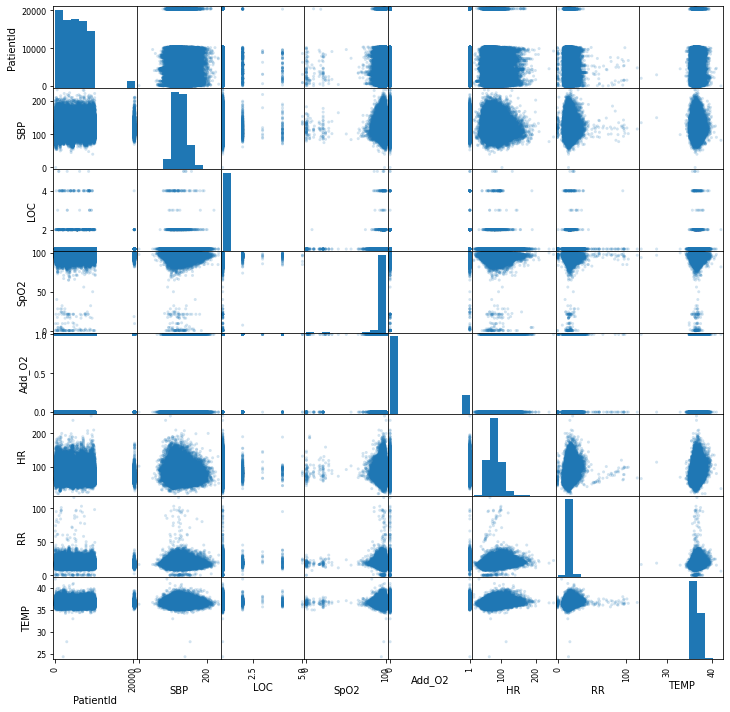

In [42]:
pd.plotting.scatter_matrix(PatientData, alpha=0.2, figsize=(12,12))

In [43]:
PatientData.corr()

PatientId       SBP       LOC      SpO2    Add_O2        HR  \
PatientId   1.000000  0.008991  0.008168  0.026212 -0.014531 -0.058004   
SBP         0.008991  1.000000 -0.008473  0.007329 -0.048249 -0.059983   
LOC         0.008168 -0.008473  1.000000 -0.006517  0.028562  0.017920   
SpO2        0.026212  0.007329 -0.006517  1.000000 -0.159311 -0.126267   
Add_O2     -0.014531 -0.048249  0.028562 -0.159311  1.000000  0.220988   
HR         -0.058004 -0.059983  0.017920 -0.126267  0.220988  1.000000   
RR         -0.029244 -0.006355  0.033108 -0.107789  0.202400  0.274545   
TEMP        0.009569 -0.018519  0.023682 -0.074098  0.143127  0.267787   

                 RR      TEMP  
PatientId -0.029244  0.009569  
SBP       -0.006355 -0.018519  
LOC        0.033108  0.023682  
SpO2      -0.107789 -0.074098  
Add_O2     0.202400  0.143127  
HR         0.274545  0.267787  
RR         1.000000  0.174443  
TEMP       0.174443  1.000000

In [44]:
DataSubset = df[['SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']]
DataSubset.shape

(160938, 7)

array([[<AxesSubplot:xlabel='SBP', ylabel='SBP'>,
        <AxesSubplot:xlabel='LOC', ylabel='SBP'>,
        <AxesSubplot:xlabel='SpO2', ylabel='SBP'>,
        <AxesSubplot:xlabel='Add_O2', ylabel='SBP'>,
        <AxesSubplot:xlabel='HR', ylabel='SBP'>,
        <AxesSubplot:xlabel='RR', ylabel='SBP'>,
        <AxesSubplot:xlabel='TEMP', ylabel='SBP'>],
       [<AxesSubplot:xlabel='SBP', ylabel='LOC'>,
        <AxesSubplot:xlabel='LOC', ylabel='LOC'>,
        <AxesSubplot:xlabel='SpO2', ylabel='LOC'>,
        <AxesSubplot:xlabel='Add_O2', ylabel='LOC'>,
        <AxesSubplot:xlabel='HR', ylabel='LOC'>,
        <AxesSubplot:xlabel='RR', ylabel='LOC'>,
        <AxesSubplot:xlabel='TEMP', ylabel='LOC'>],
       [<AxesSubplot:xlabel='SBP', ylabel='SpO2'>,
        <AxesSubplot:xlabel='LOC', ylabel='SpO2'>,
        <AxesSubplot:xlabel='SpO2', ylabel='SpO2'>,
        <AxesSubplot:xlabel='Add_O2', ylabel='SpO2'>,
        <AxesSubplot:xlabel='HR', ylabel='SpO2'>,
        <AxesSubplot:xlabel='RR', 

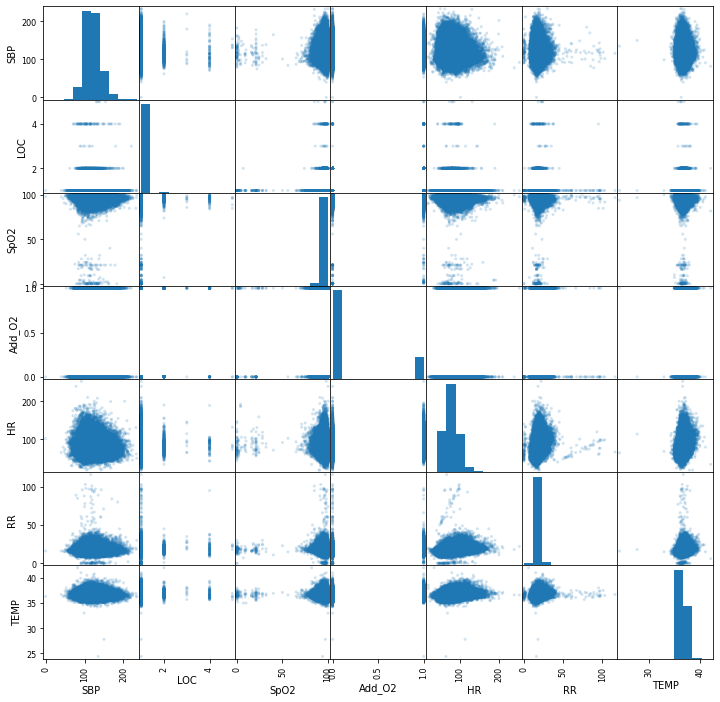

In [45]:
pd.plotting.scatter_matrix(DataSubset, alpha=0.2, figsize=(12,12))

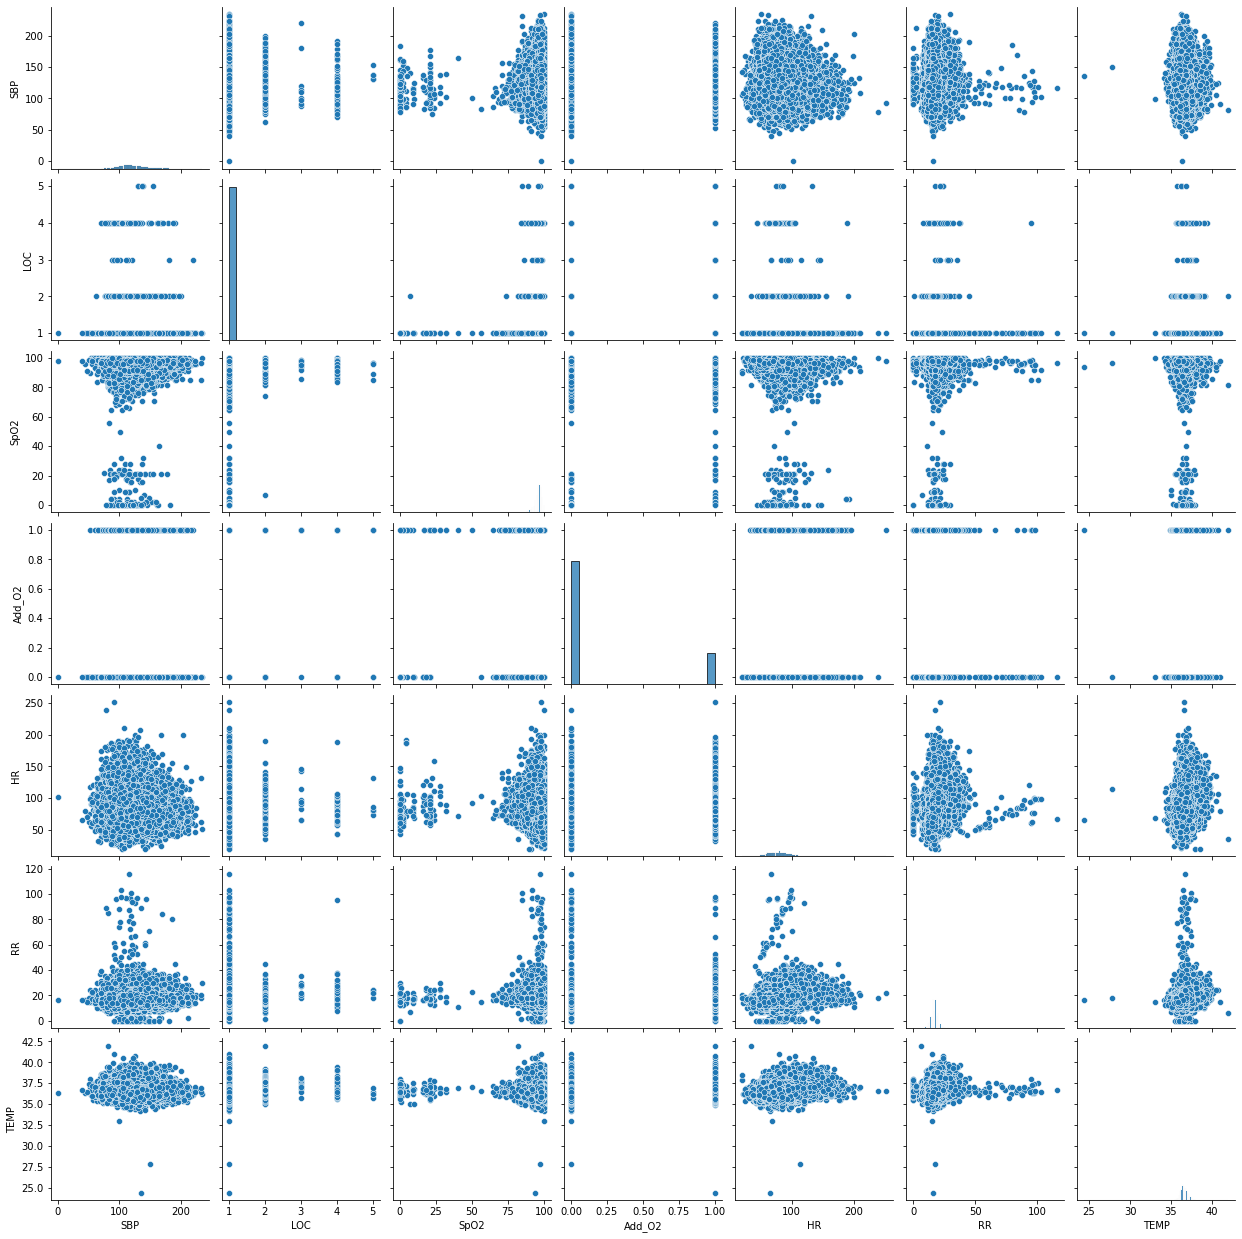

In [46]:
import seaborn as sns

sns.pairplot(DataSubset, diag_kind="hist")

In [47]:
DataSubset.corr()

SBP       LOC      SpO2    Add_O2        HR        RR      TEMP
SBP     1.000000 -0.008473  0.007329 -0.048249 -0.059983 -0.006355 -0.018519
LOC    -0.008473  1.000000 -0.006517  0.028562  0.017920  0.033108  0.023682
SpO2    0.007329 -0.006517  1.000000 -0.159311 -0.126267 -0.107789 -0.074098
Add_O2 -0.048249  0.028562 -0.159311  1.000000  0.220988  0.202400  0.143127
HR     -0.059983  0.017920 -0.126267  0.220988  1.000000  0.274545  0.267787
RR     -0.006355  0.033108 -0.107789  0.202400  0.274545  1.000000  0.174443
TEMP   -0.018519  0.023682 -0.074098  0.143127  0.267787  0.174443  1.000000

Data correlation between de base data is very low.

Check correlation between base data and target EWS value:

In [48]:
DataSubsetWithEWS = df[['SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP', 'EWS_Total']]

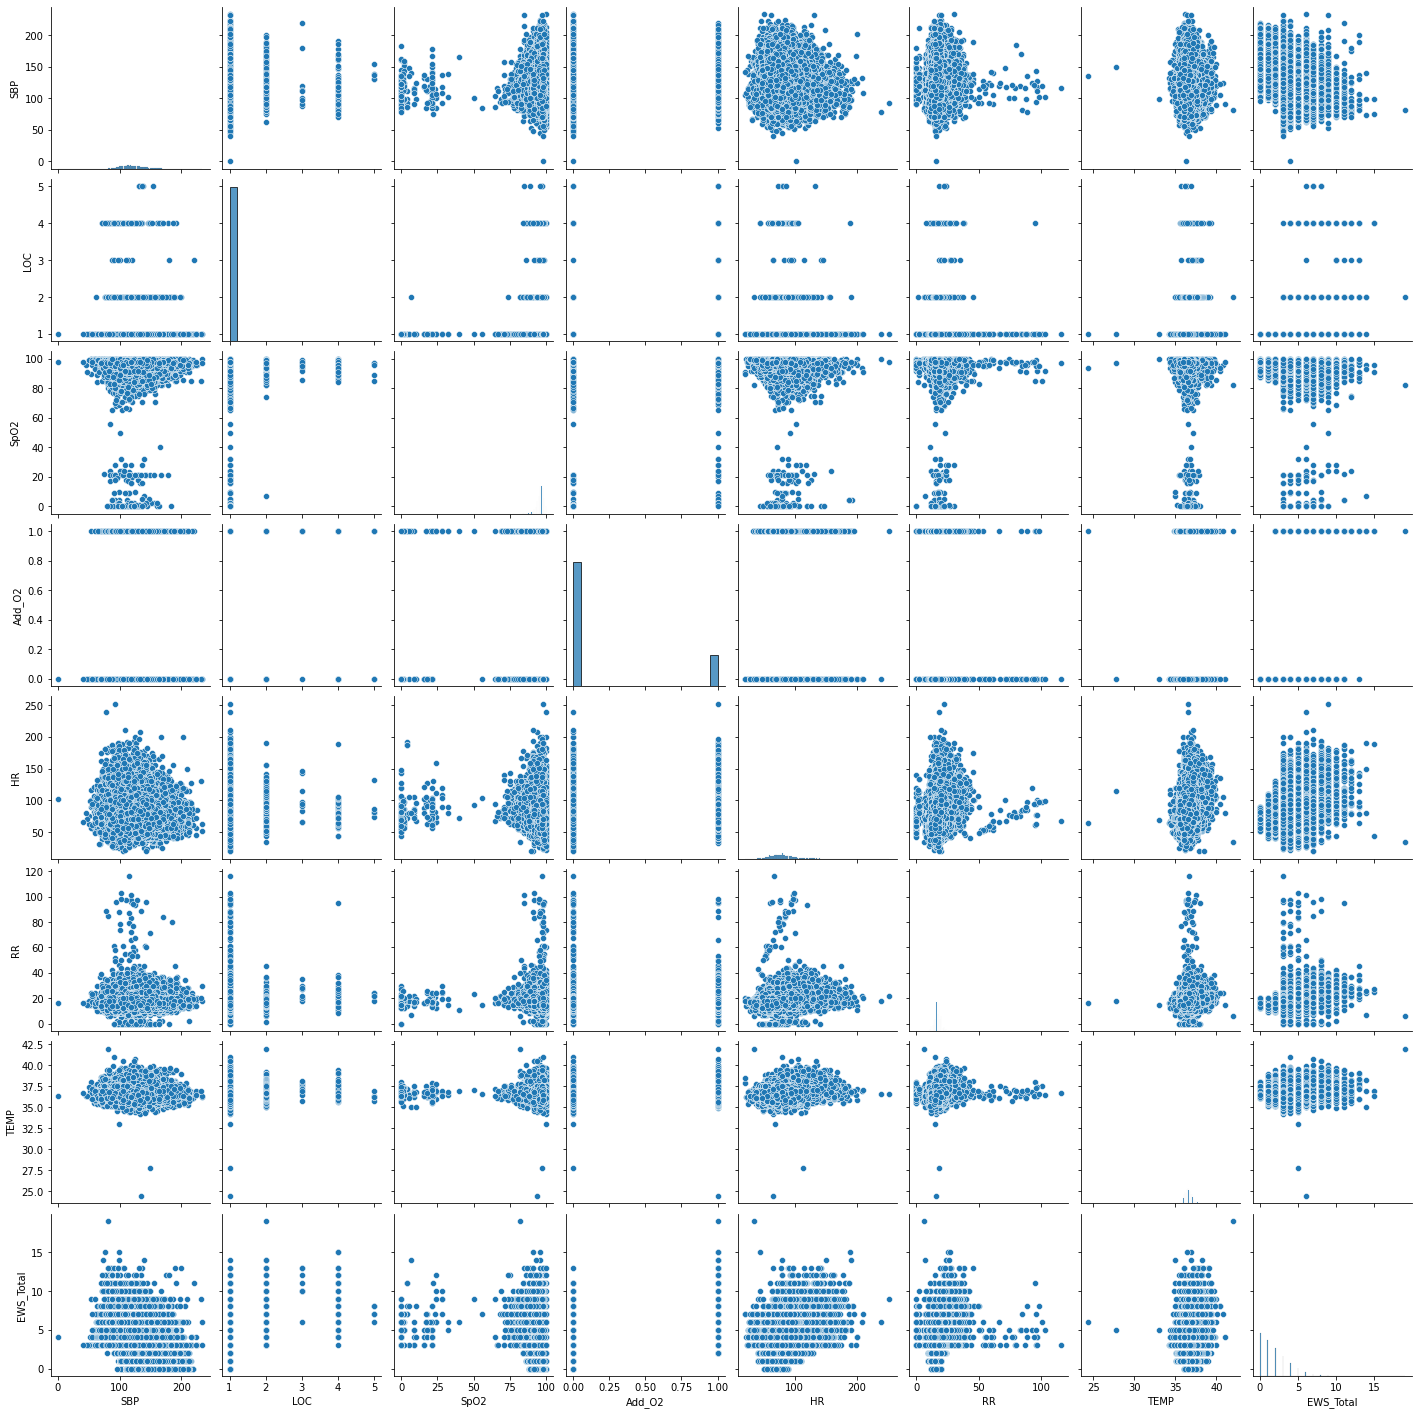

In [49]:
sns.pairplot(DataSubsetWithEWS, diag_kind="hist")

In [50]:
DataSubsetWithEWS.corr()

SBP       LOC      SpO2    Add_O2        HR        RR  \
SBP        1.000000 -0.008473  0.007329 -0.048249 -0.059983 -0.006355   
LOC       -0.008473  1.000000 -0.006517  0.028562  0.017920  0.033108   
SpO2       0.007329 -0.006517  1.000000 -0.159311 -0.126267 -0.107789   
Add_O2    -0.048249  0.028562 -0.159311  1.000000  0.220988  0.202400   
HR        -0.059983  0.017920 -0.126267  0.220988  1.000000  0.274545   
RR        -0.006355  0.033108 -0.107789  0.202400  0.274545  1.000000   
TEMP      -0.018519  0.023682 -0.074098  0.143127  0.267787  0.174443   
EWS_Total -0.351368  0.132524 -0.272373  0.615690  0.419069  0.387121   

               TEMP  EWS_Total  
SBP       -0.018519  -0.351368  
LOC        0.023682   0.132524  
SpO2      -0.074098  -0.272373  
Add_O2     0.143127   0.615690  
HR         0.267787   0.419069  
RR         0.174443   0.387121  
TEMP       1.000000   0.131000  
EWS_Total  0.131000   1.000000

Correlation between the base data and the target EWS value is average to low:

- Add_O2:  61,5%
- HR:      41,9%
- RR:      38,7%
- SBP:    -35,1%
- Sp02:   -27,2%
- LOC:     13,2%
- TEMP:    13,1%

## Modelling the data

### Multilinear regression

Since we have multiple variables, try multilinear.

#### Using the sklearn module

##### Normalize the Data

In [51]:
import sklearn
import sklearn.preprocessing
from sklearn_pandas import DataFrameMapper

DFmapper = DataFrameMapper([
                              (['SBP'], sklearn.preprocessing.StandardScaler()),
                              (['LOC'], sklearn.preprocessing.StandardScaler()),
                              (['SpO2'], sklearn.preprocessing.StandardScaler()),
                              (['Add_O2'], sklearn.preprocessing.StandardScaler()),
                              (['HR'], sklearn.preprocessing.StandardScaler()),
                              (['RR'], sklearn.preprocessing.StandardScaler()),
                              (['TEMP'], sklearn.preprocessing.StandardScaler())
                           ])

PreProcessedData = np.round(DFmapper.fit_transform(DataSubset), 5)
PreProcessedData

array([[ 1.13837, -0.05244,  0.00618, ...,  0.02314,  0.23143, -0.08649],
       [-0.1882 , -0.05244, -0.26599, ..., -0.26643, -0.97634,  1.38669],
       [ 0.73019, -0.05244,  0.27836, ...,  0.54437, -0.97634, -1.13876],
       ...,
       [-0.13718, -0.05244,  0.55054, ...,  0.13897,  0.83531, -0.92831],
       [ 0.42406, -0.05244,  0.55054, ..., -0.55599, -0.37246, -0.29694],
       [ 0.62815, -0.05244,  0.55054, ...,  0.2548 , -0.6744 , -1.55967]])

##### Split the dataset

X_train, y_train: subset of variables to train the regression model
X_test, y_test: remaining subset of data to verify the model

In [52]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(PreProcessedData, EWS, random_state=41, test_size=0.2)

print(X_train, X_test, y_train, y_test)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

[[-0.39229 -0.05244 -3.53212 ...  1.23933  0.83531  0.12396]
 [-1.8209  -0.05244  0.55054 ...  0.02314  0.53337 -0.92831]
 [ 0.37304 -0.05244  0.00618 ... -0.72973  1.4392  -0.29694]
 ...
 [-0.85149 -0.05244 -0.53817 ...  0.89185 -0.07051 -0.29694]
 [ 0.11793 -0.05244 -0.53817 ...  0.08106  0.53337  0.54487]
 [-0.59638 -0.05244  0.27836 ... -1.83009 -0.37246 -0.5074 ]] [[-1.05557 -0.05244 -1.08253 ... -0.20851  0.23143  1.59714]
 [ 0.21997 -0.05244 -0.81035 ... -1.30887  1.13725  2.01805]
 [ 0.9853  -0.05244  1.09489 ... -0.09268  0.23143  0.33442]
 ...
 [ 0.01589 -0.05244  0.00618 ...  0.54437  0.23143 -0.5074 ]
 [-0.59638 -0.05244  0.55054 ... -0.96139  0.53337  0.33442]
 [-0.59638 -0.05244 -0.26599 ...  0.02314  2.34502 -0.08649]]         EWS_Total
120941          6
154780          3
84059           2
111882          0
100677          0
...           ...
57536           2
114331          7
65904           5
141067          1
37447           2

[128750 rows x 1 columns]         EWS_T

#####  Load and fit the model

1. Import LinearRegression from sklearn
2. Create a regressor variable and instantiate your LinearRegression class.
3. Train the model with X_train and y_train
4. Display the score of the model with X_train and y_train.
5. Use the predict method of the model on the test dataset (X_test).
6. Display the score of the model with X_test and y_test.

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

LinRegTrain = LinearRegression().fit(X_train, y_train)
print("Score Training set = ", LinRegTrain.score(X_train, y_train))
print("Score Test set = ", LinRegTrain.score(X_test, y_test))
print(LinRegTrain.coef_, LinRegTrain.coef_.shape)
#theta = list(LinRegTrain.coef_)
theta = list(np.concatenate(LinRegTrain.coef_))
print("Theta = ", theta, len(theta))
theta.insert(0, LinRegTrain.intercept_)
#theta = np.array(theta, dtype=object)
theta = np.array(theta)
theta = theta.reshape(len(theta),1) 
print("Theta = ", theta, theta.shape)

Score Training set =  0.6367128083157966
Score Test set =  0.6281824755688746
[[-0.58124196  0.1922781  -0.27166485  0.90895326  0.4250486   0.39768115
  -0.1055404 ]] (1, 7)
Theta =  [-0.5812419633681822, 0.19227810098090437, -0.27166485157086223, 0.9089532577448111, 0.425048598550258, 0.39768115244713353, -0.105540396416482] 7
Theta =  [[array([1.89361495])]
 [-0.5812419633681822]
 [0.19227810098090437]
 [-0.27166485157086223]
 [0.9089532577448111]
 [0.425048598550258]
 [0.39768115244713353]
 [-0.105540396416482]] (8, 1)


/usr/lib/python3.6/site-packages/ipykernel_launcher.py:14: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  


In [54]:
y_pred_train = LinRegTrain.predict(X_train)

display(np.round(y_pred_train), y_train)

y_pred = LinRegTrain.predict(X_test)
print("Score Prediction = ", LinRegTrain.score(X_test, y_pred))

RMSEtrain = np.sqrt(np.sum(np.square(y_pred_train - y_train)))
RMSEtest = np.sqrt(np.sum(np.square(y_pred - y_test)))

print("Root Mean Square Error :\n Train = ", RMSEtrain, "\n Test = ", RMSEtest)

RMSEtrainRounded = np.sqrt(np.sum(np.square(np.round(y_pred_train) - y_train)))
RMSEtestRounded = np.sqrt(np.sum(np.square(np.round(y_pred) - y_test)))

print("Root Mean Square Error on rounded values :\n Train = ", RMSEtrainRounded, "\n Test = ", RMSEtestRounded)

array([[6.],
       [3.],
       [2.],
       ...,
       [5.],
       [2.],
       [1.]])

EWS_Total
120941          6
154780          3
84059           2
111882          0
100677          0
...           ...
57536           2
114331          7
65904           5
141067          1
37447           2

[128750 rows x 1 columns]

Score Prediction =  1.0
Root Mean Square Error :
 Train =  EWS_Total    402.352352
dtype: float64 
 Test =  EWS_Total    202.991692
dtype: float64
Root Mean Square Error on rounded values :
 Train =  EWS_Total    415.149371
dtype: float64 
 Test =  EWS_Total    209.864242
dtype: float64


In [55]:
import numpy as np

def AddOnes(Arr):
    # Add a column of 1's on the right of an array
    
    Help = np.ones((Arr.shape[0], 1))
    X = np.concatenate((Arr, Help), axis=1)
    return(X)

def MSE(X, y, theta):
    #print(X.shape, y.shape, theta.shape)
    m = X.shape[0]
    #help1 = np.matmul(AddOnes(X),theta)
    help1 = np.matmul(X, theta)
    #help2 = np.subtract( help1, y.reshape(len(y),1) ) # y is a vector, convert to 1-dim array
    help2 = help1 - y
    #print(X.shape, y.shape, theta.shape, help1.shape, help2.shape)
    
    return(1/(2*m) * sum(help2**2) )

In [56]:
y_pred = LinRegTrain.predict(X_test)
print("Score prediction = ", LinRegTrain.score(X_test, y_pred))

print("MSE = ", MSE(AddOnes(X_test), y_pred, theta) )

Score prediction =  1.0
MSE =  [array([6.39149089])]


###### Accuracy analysis: 

In [57]:
y_pred_train == y_train

EWS_Total
120941      False
154780      False
84059       False
111882      False
100677      False
...           ...
57536       False
114331      False
65904       False
141067      False
37447       False

[128750 rows x 1 columns]

In [58]:
def MatchScore(Predictions, Actual):
    # List number of accurate, 1 off, 2 off, etc predicted EWS values
    
    Difference = np.abs(Predictions - Actual)
    #print(Difference)    
    Unique, Counts = np.unique(Difference, return_counts=True)
    
    return( dict(zip(Unique, Counts)) )
    

###### Rounding

In [59]:
#print(y_pred_train.shape, y_train.shape)
#print(y_pred_train.dtype, y_train.dtypes)

TrainScore = MatchScore(np.round(y_pred_train), y_train.to_numpy())
print(TrainScore)

#print(y_pred.shape, y_test.shape)

TestScore = MatchScore(np.round(y_pred), y_test.to_numpy())
print(TestScore)

{0.0: 44838, 1.0: 64438, 2.0: 15711, 3.0: 2763, 4.0: 723, 5.0: 187, 6.0: 64, 7.0: 15, 8.0: 8, 9.0: 1, 10.0: 1, 15.0: 1}
{0.0: 11135, 1.0: 16056, 2.0: 4011, 3.0: 701, 4.0: 202, 5.0: 58, 6.0: 21, 7.0: 4}


In [60]:
#Percentages:
print("Train - Fraction Accurate = ", (TrainScore[0.0])/ y_pred_train.shape[0])
print("Train - Fraction Accurate or 1 off = ", (TrainScore[0.0] + TrainScore[1.0])/ y_pred_train.shape[0])
print("Train - Fraction Accurate or max 2 off = ", (TrainScore[0.0] + TrainScore[1.0] + TrainScore[2.0])/ y_pred_train.shape[0])
print("Test - Fraction Accurate = ", (TestScore[0.0])/ y_test.shape[0])
print("Test - Fraction Accurate or 1 off = ", (TestScore[0.0] + TestScore[1.0])/y_test.shape[0])
print("Test - Fraction Accurate or max 2 off = ", (TestScore[0.0] + TestScore[1.0] + TestScore[2.0])/y_test.shape[0])

Train - Fraction Accurate =  0.34825631067961166
Train - Fraction Accurate or 1 off =  0.8487456310679612
Train - Fraction Accurate or max 2 off =  0.9707728155339805
Test - Fraction Accurate =  0.3459363738039021
Test - Fraction Accurate or 1 off =  0.8447558096184914
Test - Fraction Accurate or max 2 off =  0.9693674661364484


##### Ceiling:

In [61]:
TrainScore2 = MatchScore(np.ceil(y_pred_train), y_train.to_numpy())
print(TrainScore2)

TestScore2 = MatchScore(np.ceil(y_pred), y_test.to_numpy())
print(TestScore2)

{0.0: 35303, 1.0: 63989, 2.0: 26336, 3.0: 2538, 4.0: 395, 5.0: 126, 6.0: 35, 7.0: 17, 8.0: 5, 9.0: 4, 11.0: 1, 14.0: 1}
{0.0: 8678, 1.0: 15989, 2.0: 6692, 3.0: 670, 4.0: 105, 5.0: 39, 6.0: 12, 7.0: 3}


In [62]:
#Percentages:
print("Train - Fraction Accurate = ", (TrainScore2[0.0])/ y_pred_train.shape[0])
print("Train - Fraction Accurate or 1 off = ", (TrainScore2[0.0] + TrainScore2[1.0])/ y_pred_train.shape[0])
print("Train - Fraction Accurate or max 2 off = ", (TrainScore2[0.0] + TrainScore2[1.0] + TrainScore2[2.0])/ y_pred_train.shape[0])
print("Test - Fraction Accurate = ", (TestScore2[0.0])/ y_test.shape[0])
print("Test - Fraction Accurate or 1 off = ", (TestScore2[0.0] + TestScore2[1.0])/y_test.shape[0])
print("Test - Fraction Accurate or max 2 off = ", (TestScore2[0.0] + TestScore2[1.0] + TestScore2[2.0])/y_test.shape[0])

Train - Fraction Accurate =  0.27419805825242716
Train - Fraction Accurate or 1 off =  0.7712
Train - Fraction Accurate or max 2 off =  0.9757514563106796
Test - Fraction Accurate =  0.2696035789735305
Test - Fraction Accurate or 1 off =  0.7663414937243693
Test - Fraction Accurate or max 2 off =  0.9742450602709084


##### Flooring:

In [63]:
TrainScore3 = MatchScore(np.floor(y_pred_train), y_train.to_numpy())
print(TrainScore3)

TestScore3 = MatchScore(np.floor(y_pred), y_test.to_numpy())
print(TestScore3)

{0.0: 48558, 1.0: 56694, 2.0: 16657, 3.0: 4988, 4.0: 1351, 5.0: 367, 6.0: 95, 7.0: 23, 8.0: 13, 9.0: 2, 10.0: 1, 15.0: 1}
{0.0: 12216, 1.0: 14095, 2.0: 4103, 3.0: 1289, 4.0: 352, 5.0: 95, 6.0: 28, 7.0: 8, 8.0: 2}


In [64]:
#Percentages:
print("Train - Fraction Accurate = ", (TrainScore3[0.0])/ y_pred_train.shape[0])
print("Train - Fraction Accurate or 1 off = ", (TrainScore3[0.0] + TrainScore3[1.0])/ y_pred_train.shape[0])
print("Train - Fraction Accurate or max 2 off = ", (TrainScore3[0.0] + TrainScore3[1.0] + TrainScore3[2.0])/ y_pred_train.shape[0])
print("Test - Fraction Accurate = ", (TestScore3[0.0])/ y_test.shape[0])
print("Test - Fraction Accurate or 1 off = ", (TestScore3[0.0] + TestScore3[1.0])/y_test.shape[0])
print("Test - Fraction Accurate or max 2 off = ", (TestScore3[0.0] + TestScore3[1.0] + TestScore3[2.0])/y_test.shape[0])

Train - Fraction Accurate =  0.3771495145631068
Train - Fraction Accurate or 1 off =  0.8174912621359224
Train - Fraction Accurate or max 2 off =  0.9468660194174757
Test - Fraction Accurate =  0.37952031813098047
Test - Fraction Accurate or 1 off =  0.8174164284826644
Test - Fraction Accurate or max 2 off =  0.9448862930284578


#### Conclusion Multilinear regression

Base data : 'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP'

Target value: EWS_Total

When rounding the predicted value to get the EWS (int) value the:

      - Accurate predictions are approx. 35%

      - With the EWS score 1 different included we get approx. 85%
      
      - With the EWS score 1 or 2 different included we get approx. 97%
            
Multilinear regression seems close but needs improvements to be really good.

Since EWS values are calculated from Base data, this calculation of actual data is better than regression.

### Modelling time series

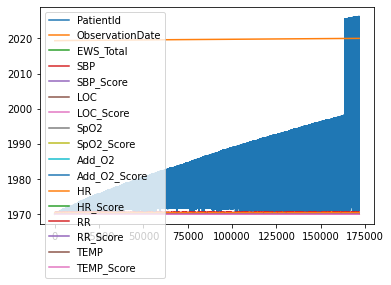

In [65]:
import matplotlib.pyplot as plt

df.plot()
plt.show()

ObservationDate  EWS_Total
0      2019-05-01 13:27:50          0
2      2019-05-01 15:54:27          1
4      2019-05-01 17:03:16          0
8      2019-05-01 21:08:05          0
10     2019-05-01 21:13:21          1
...                    ...        ...
171731 2020-01-02 08:57:05          3
171732 2020-01-02 08:58:46          3
171733 2020-01-02 09:03:14          0
171734 2020-01-02 09:03:20          0
171735 2020-01-02 09:03:56          1

[160938 rows x 2 columns]

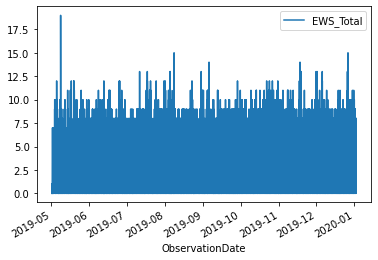

In [66]:
TimeSeries = df[['ObservationDate', 'EWS_Total']]
display(TimeSeries)
TimeSeries = TimeSeries.set_index('ObservationDate')
TimeSeries.plot()
plt.show()

<AxesSubplot:title={'center':'EWS'}, xlabel='ObservationDate'>

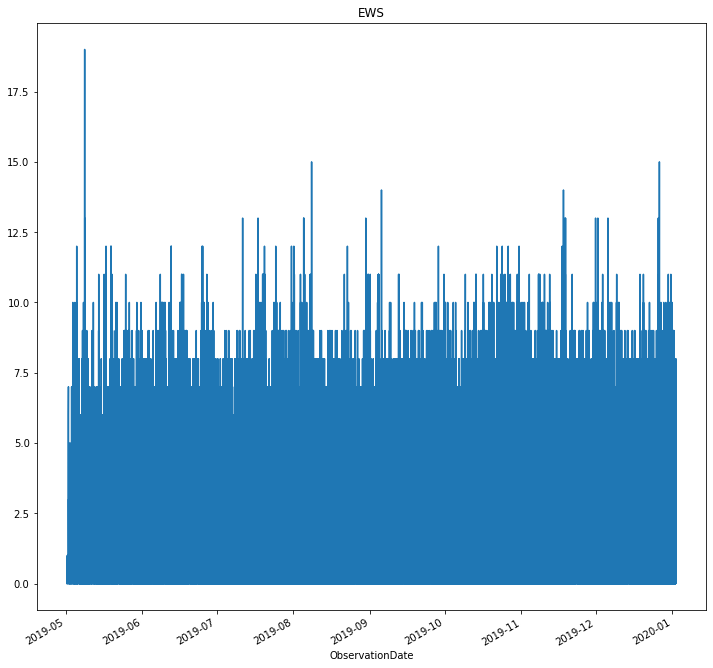

In [67]:
TimeSeries['EWS_Total'].plot(title = "EWS", figsize=(12,12))

In [68]:
PatientData = df[['PatientId', 'ObservationDate', 'SBP', 'LOC', 'SpO2', 'Add_O2', 'HR', 'RR', 'TEMP']]

EWS = df[['EWS_Total']]

In [69]:
print(NbrPatients[NbrPatients > 100].count())
print(NbrPatients[NbrPatients > 200].count())
print(NbrPatients[NbrPatients > 300].count())
print(NbrPatients[NbrPatients > 400].count())

235
33
8
3


##### Plot timeseries of individual patients in one plot

In [70]:
PatientTimeSeries = NbrPatients[NbrPatients > 200]
display(PatientTimeSeries)

PatientId
1743    643
5797    441
1261    441
630     356
1841    351
1199    310
3080    305
6995    305
1092    284
523     278
1285    276
1068    274
1753    270
1257    268
4672    264
3553    257
362     252
5447    250
1835    243
6764    236
2193    229
6755    225
4764    222
5678    220
3174    218
3433    218
1474    217
1664    215
4614    209
1278    206
7777    206
2602    205
3540    203
Name: PatientId, dtype: int64

PatientId     ObservationDate  EWS_Total    SBP  SBP_Score  LOC  \
45337        3540 2019-07-19 13:43:32          0  146.0        0.0    1   
45406        3540 2019-07-19 15:27:33          1  143.0        0.0    1   
45466        3540 2019-07-19 17:14:41          1  142.0        0.0    1   
45622        3540 2019-07-19 20:32:11          0  144.0        0.0    1   
45716        3540 2019-07-20 00:32:43          0  118.0        0.0    1   
...           ...                 ...        ...    ...        ...  ...   
114822       3540 2019-10-22 19:22:50          0  119.0        0.0    1   
115061       3540 2019-10-23 05:10:47          0  122.0        0.0    1   
115452       3540 2019-10-23 14:50:15          0  126.0        0.0    1   
115861       3540 2019-10-24 05:03:05          0  131.0        0.0    1   
116097       3540 2019-10-24 10:30:52          0  135.0        0.0    1   

        LOC_Score   SpO2  SpO2_Score  Add_O2  Add_O2_Score  HR  HR_Score  RR  \
45337           0   98.0         0.0       0           0.0  83         0  20   
45406           0   97.0         0.0       0           0.0  83         0  10   
45466           0   97.0         0.0       0           0.0  88         0  11   
45622           0   98.0         0.0       0           0.0  89         0  16   
45716           0   96.0         0.0       0           0.0  81         0  16   
...           ...    ...         ...     ...           ...  ..       ...  ..   
114822          0   96.0         0.0       0           0.0  79         0  16   
115061          0   96.0         0.0       0           0.0  81         0  15   
115452          0  100.0         0.0       0           0.0  80         0  16   
115861          0   96.0         0.0       0           0.0  82         0  15   
116097          0   97.0         0.0       0           0.0  86         0  16   

        RR_Score  TEMP  TEMP_Score  
45337          0  36.2           0  
45406          1  36.4           0  
45466          1  36.5           0  
45622          0  36.6           0  
45716          0  36.7           0  
...          ...   ...         ...  
114822         0  36.5           0  
115061         0  36.2           0  
115452         0  36.6           0  
115861         0  36.4           0  
116097         0  37.3           0  

[194 rows x 17 columns]

ObservationDate  EWS_Total
45337  2019-07-19 13:43:32          0
45406  2019-07-19 15:27:33          1
45466  2019-07-19 17:14:41          1
45622  2019-07-19 20:32:11          0
45716  2019-07-20 00:32:43          0
...                    ...        ...
114822 2019-10-22 19:22:50          0
115061 2019-10-23 05:10:47          0
115452 2019-10-23 14:50:15          0
115861 2019-10-24 05:03:05          0
116097 2019-10-24 10:30:52          0

[194 rows x 2 columns]

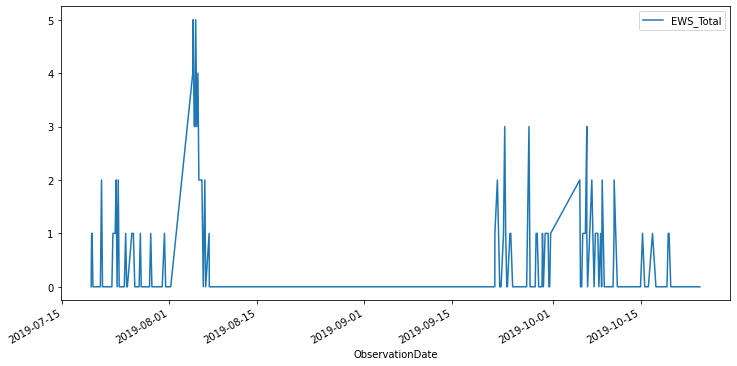

In [71]:
OnePatient = df[df.PatientId == 3540]
display(OnePatient)
OnePatient = OnePatient[['ObservationDate', 'EWS_Total']]
display(OnePatient)
OnePatient = OnePatient.set_index('ObservationDate')
OnePatient.plot(figsize=(12,6))
plt.show()

##### Select subset of patients with sufficient date-time features

[362, 523, 630, 1068, 1092, 1199, 1257, 1261, 1278, 1285, 1474, 1664, 1743, 1753, 1835, 1841, 2193, 2602, 3080, 3174, 3433, 3540, 3553, 4614, 4672, 4764, 5447, 5678, 5797, 6755, 6764, 6995, 7777]


/usr/lib64/python3.6/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


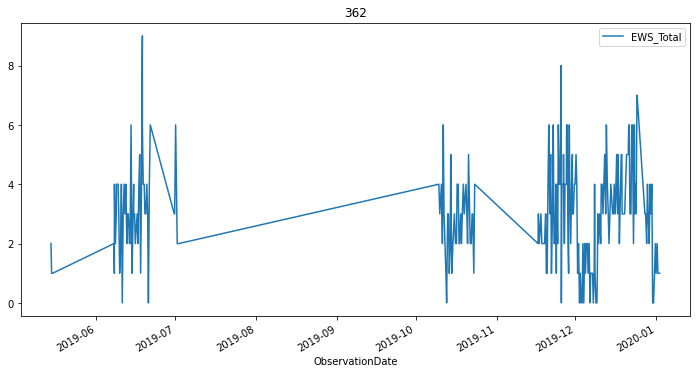

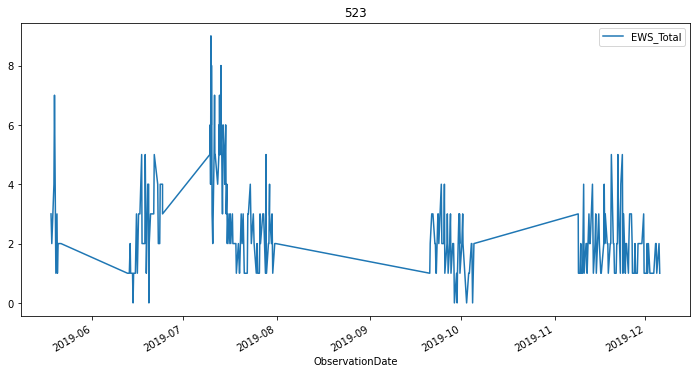

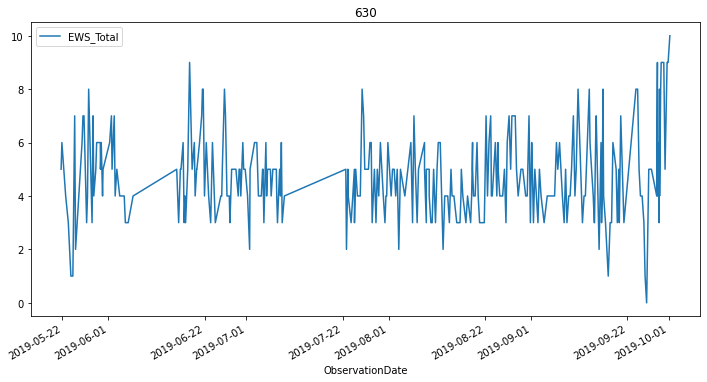

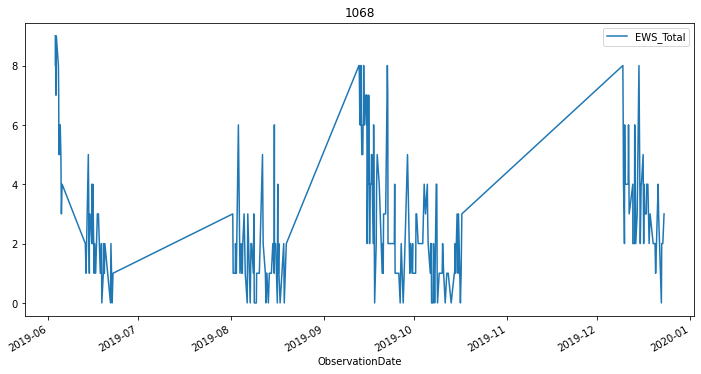

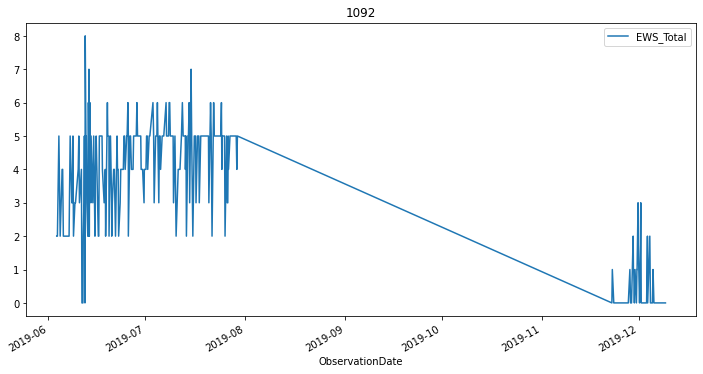

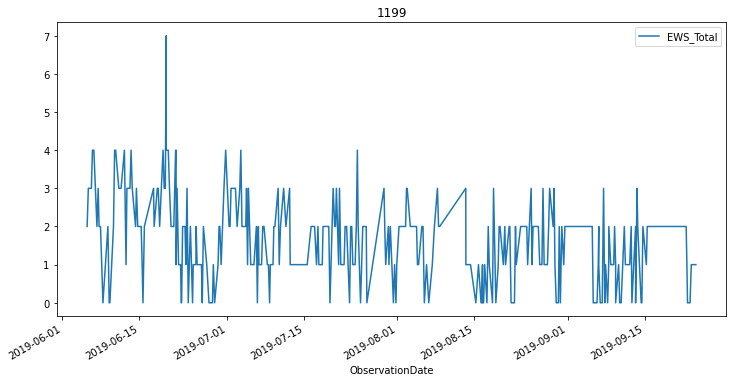

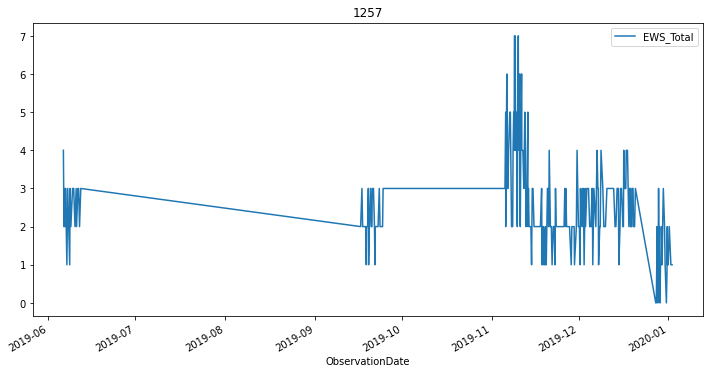

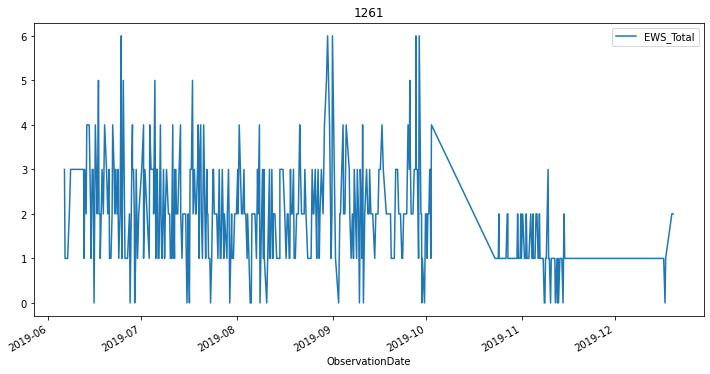

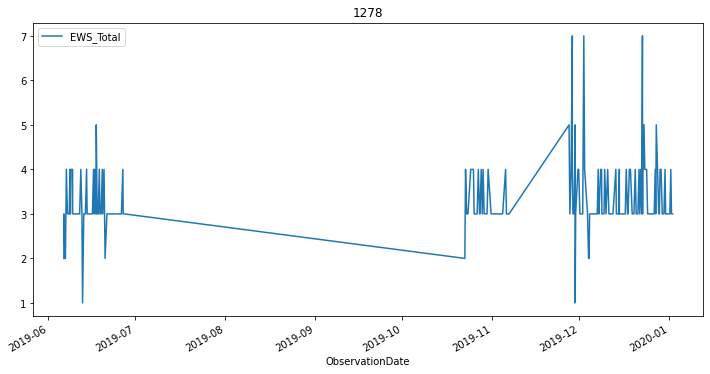

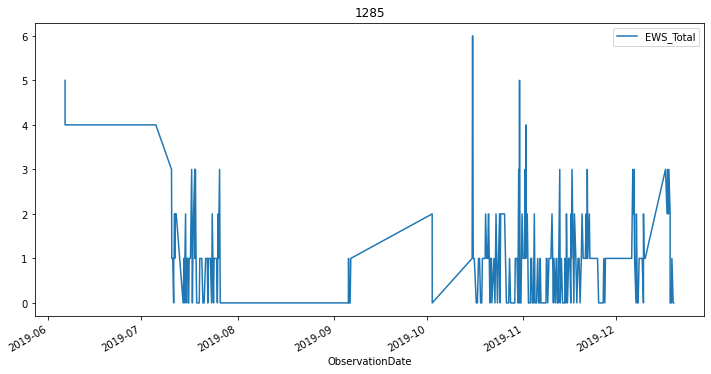

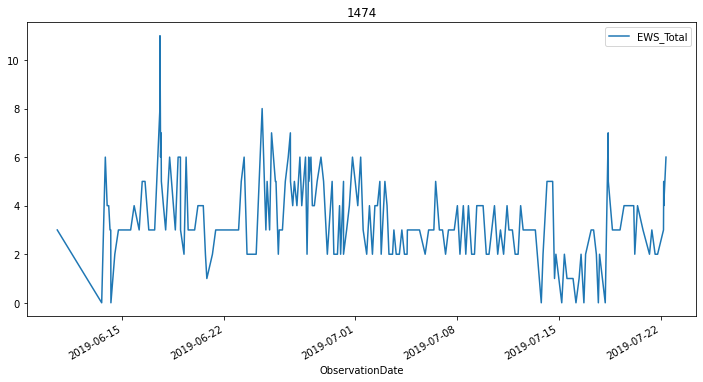

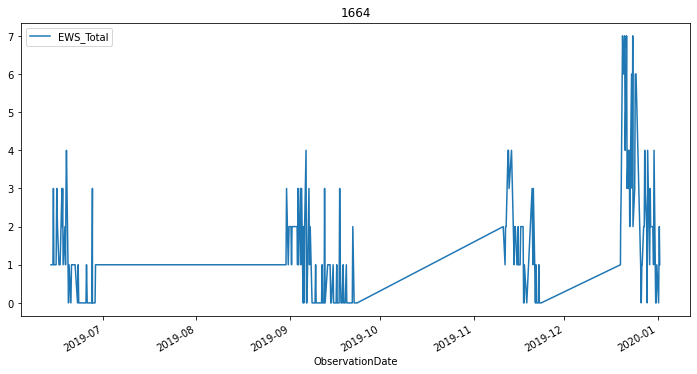

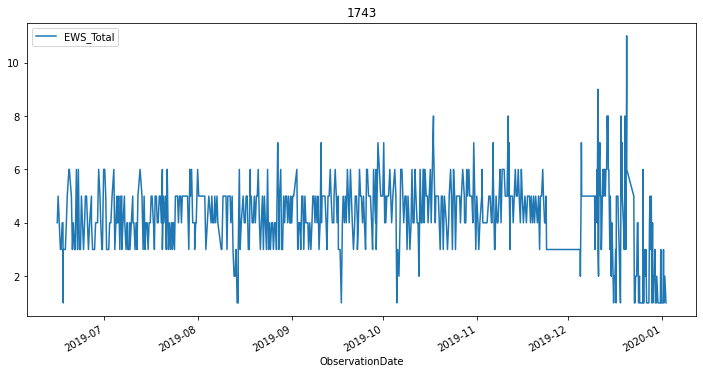

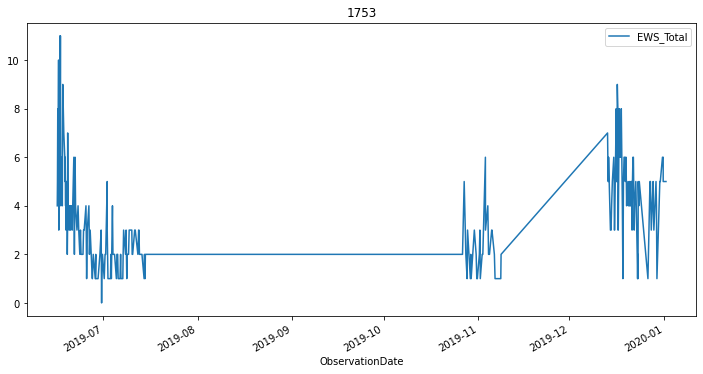

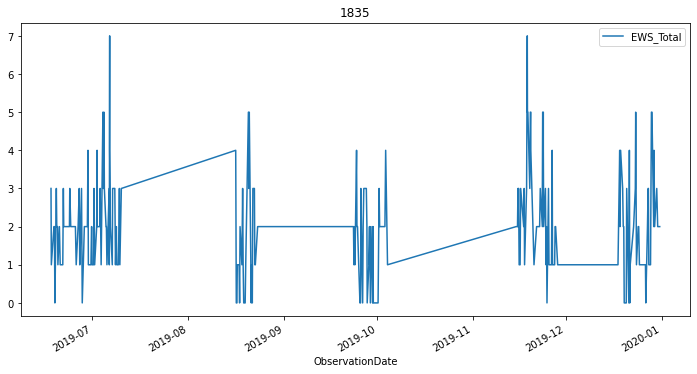

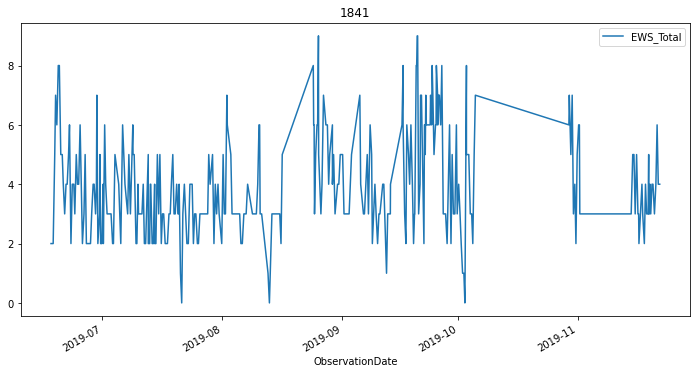

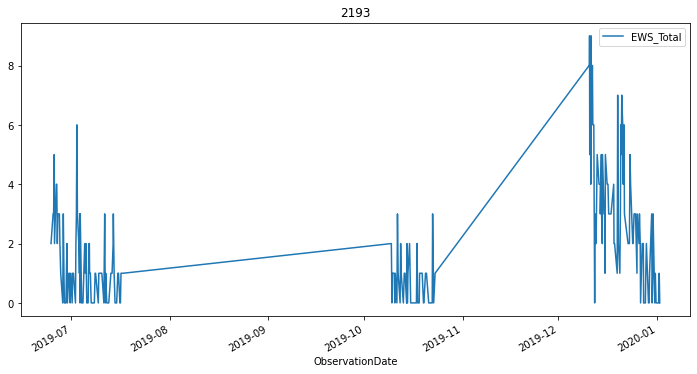

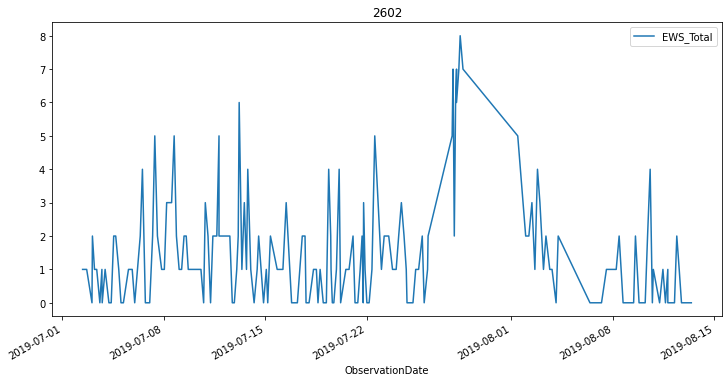

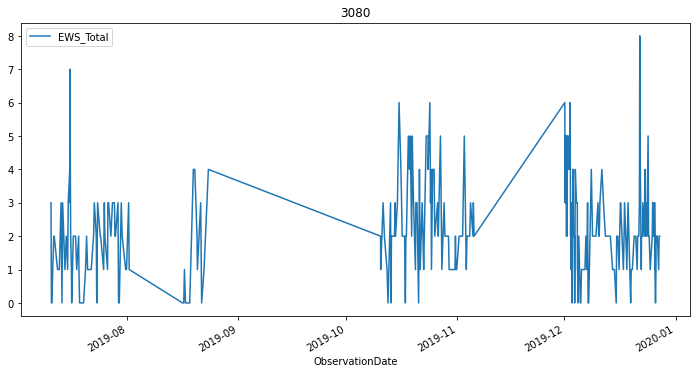

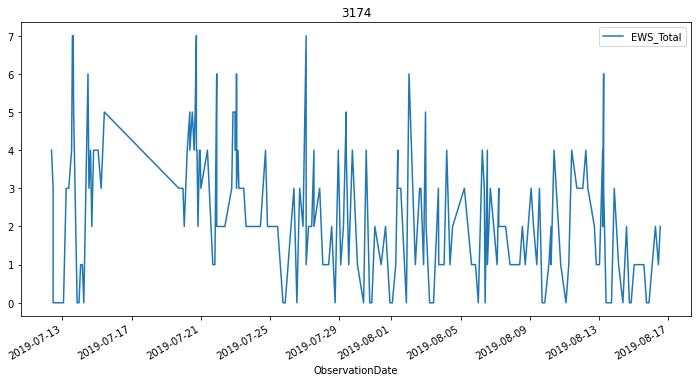

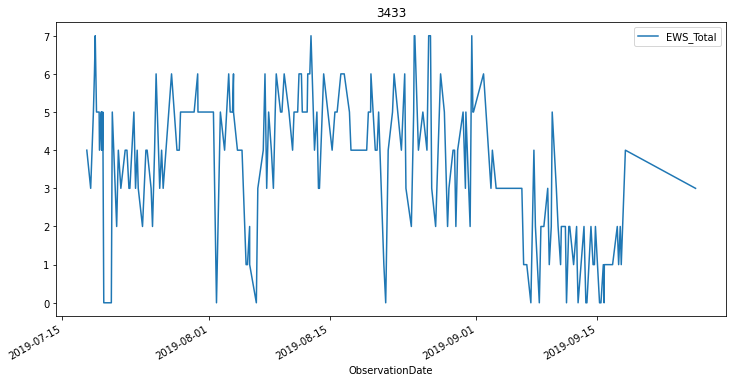

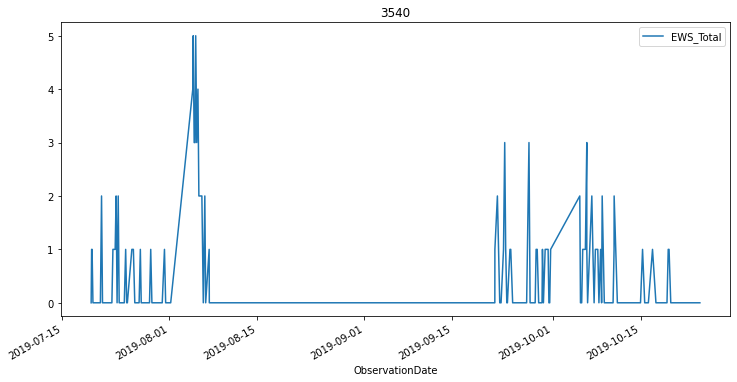

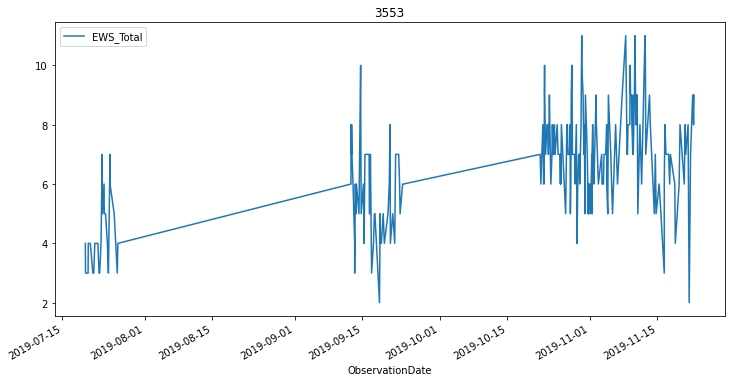

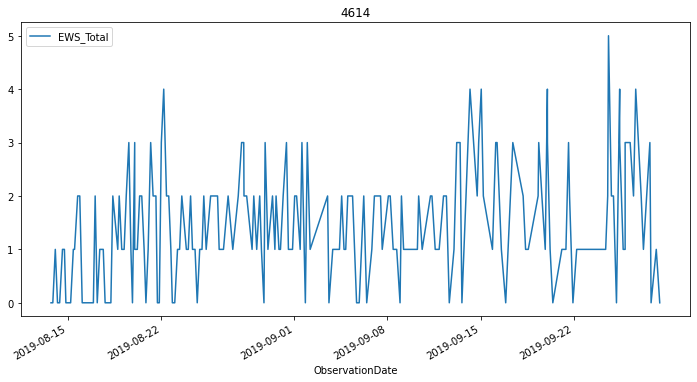

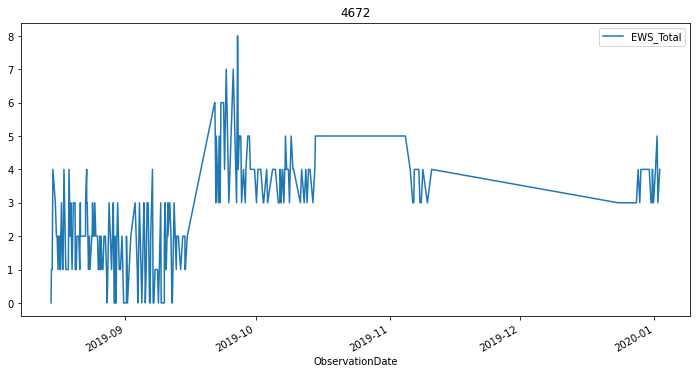

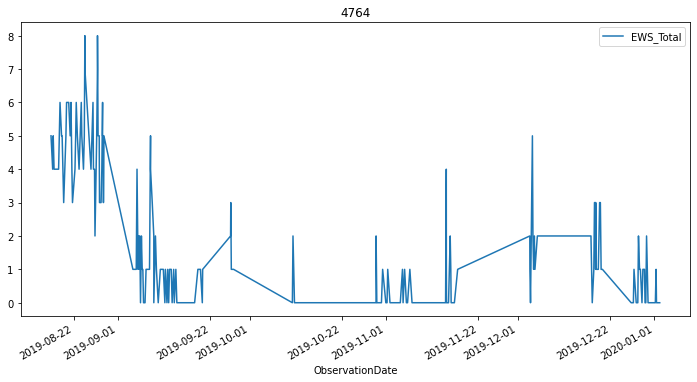

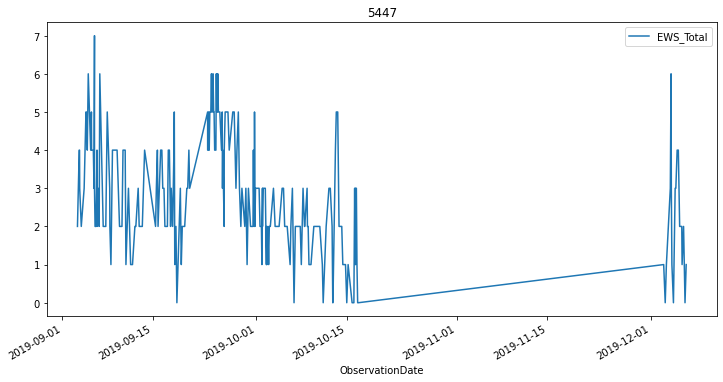

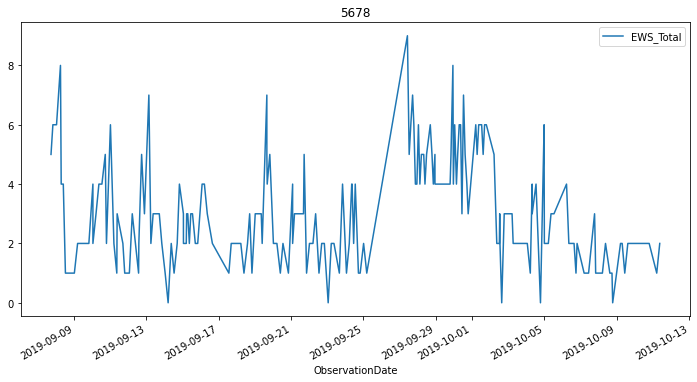

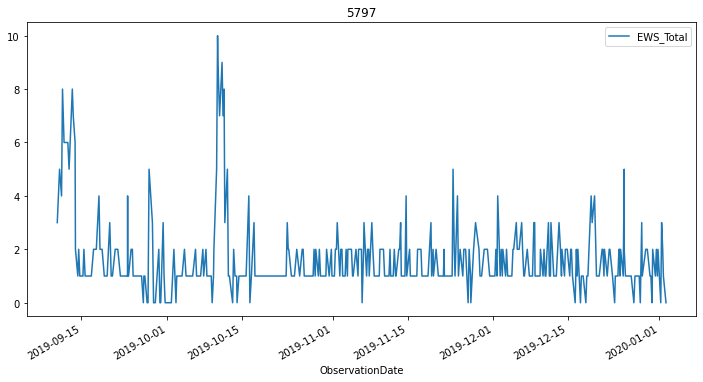

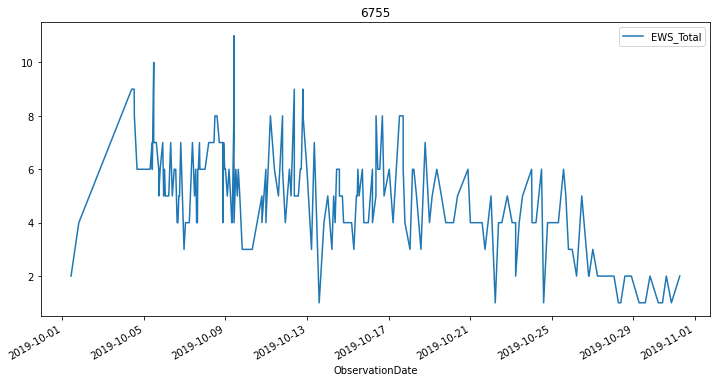

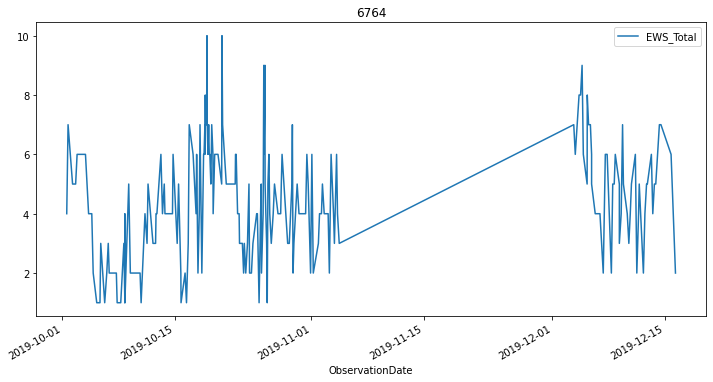

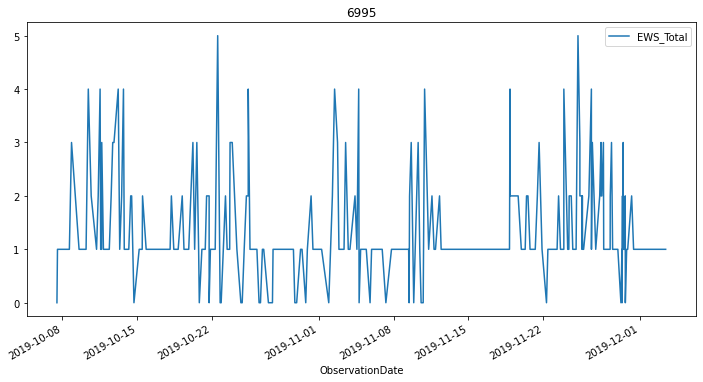

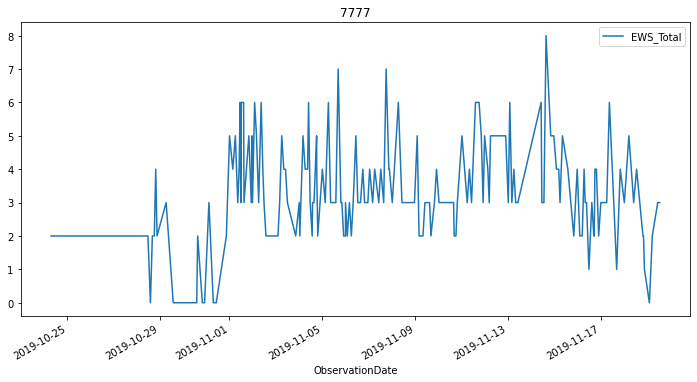

In [72]:
PatientSubset = NbrPatients[NbrPatients > 200]
PatientSubsetList = PatientSubset.index.tolist()
#print(PatientSubsetList)
#print(type(PatientSubsetList), type(PatientSubsetList[0]) )
PatientSubsetList.sort()
print(PatientSubsetList)

for patient in PatientSubsetList:
    OnePatient = df[df.PatientId == patient]
    #display(OnePatient)
    OnePatient = OnePatient[['ObservationDate', 'EWS_Total']]
    #display(OnePatient)
    OnePatient = OnePatient.set_index('ObservationDate')
    OnePatient.plot(title = patient, figsize=(12,6))
    

###### Observation
Measurements were made at different intervals: some are days, weeks or months apart 

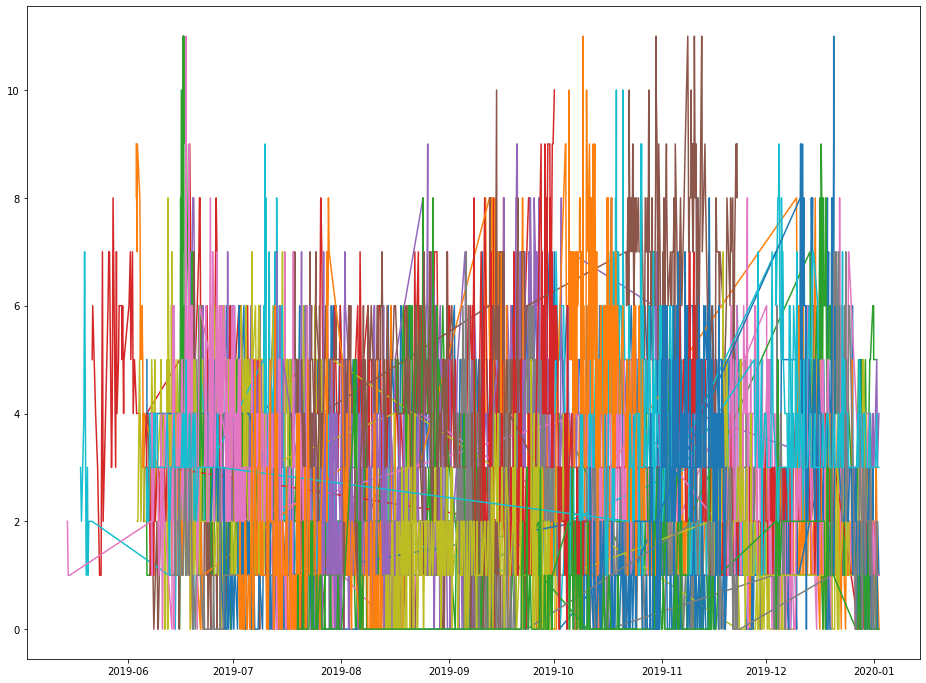

In [73]:
import matplotlib.pyplot as plt

PatientSubset = NbrPatients[NbrPatients > 200]
PatientSubsetList = PatientSubset.index.tolist()

figure = plt.figure(1, figsize = (16, 12))

for patient in PatientSubsetList:
    OnePatient = df[df.PatientId == patient]
    #display(OnePatient)
    OnePatient = OnePatient[['ObservationDate', 'EWS_Total']]
    #display(OnePatient)
    OnePatient = OnePatient.set_index('ObservationDate')
    plt.plot(OnePatient)    

###### Measurement frequency per patient

In [111]:
for patient in PatientSubsetList:
    OnePatient = df[df.PatientId == patient][['ObservationDate', 'EWS_Total']]
    NbrDaily = OnePatient.resample('D', on='ObservationDate').count()
    
    OnePatient = OnePatient.set_index('ObservationDate')    
    print("PatientId = ", patient, "   (Index unique? ", OnePatient.index.is_unique, ") :")
    res = (pd.Series(OnePatient.index[1:]) - pd.Series(OnePatient.index[:-1])).value_counts()
    display(res)
    print("Number of measurements = ", OnePatient.count() )
    print("Average duration between measurements = ", res.mean(), "\n" )
    print("number of measurements per day = ")
    display(NbrDaily)
    # average of only days with measurements (actual - non-zero - measurements)
    print("average number of measurements per day = ", NbrDaily.replace(0, np.NaN).mean(), "\n\n" )


PatientId =  362    (Index unique?  True ) :


0 days 09:46:11    1
0 days 01:12:33    1
0 days 16:16:42    1
0 days 17:16:54    1
0 days 04:03:03    1
                  ..
0 days 06:48:18    1
0 days 03:08:13    1
0 days 09:14:29    1
0 days 09:14:19    1
0 days 00:00:13    1
Name: ObservationDate, Length: 246, dtype: int64

Number of measurements =  EWS_Total    247
dtype: int64
Average duration between measurements =  1.0 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-05-14                     2          2
2019-05-15                     1          1
2019-05-16                     0          0
2019-05-17                     0          0
2019-05-18                     0          0
...                          ...        ...
2019-12-29                     3          3
2019-12-30                     3          3
2019-12-31                     3          3
2020-01-01                     3          3
2020-01-02                     1          1

[234 rows x 2 columns]

average number of measurements per day =  ObservationDate    3.049383
EWS_Total          3.049383
dtype: float64 


PatientId =  523    (Index unique?  True ) :


0 days 03:30:12     2
0 days 02:56:36     2
0 days 03:39:38     1
0 days 07:42:39     1
0 days 10:39:22     1
                   ..
34 days 11:49:17    1
0 days 11:44:08     1
0 days 05:37:32     1
0 days 05:37:22     1
0 days 14:41:46     1
Name: ObservationDate, Length: 258, dtype: int64

Number of measurements =  EWS_Total    261
dtype: int64
Average duration between measurements =  1.0077519379844961 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-05-18                     2          2
2019-05-19                     3          3
2019-05-20                     3          3
2019-05-21                     2          2
2019-05-22                     0          0
...                          ...        ...
2019-12-01                     3          3
2019-12-02                     3          3
2019-12-03                     2          2
2019-12-04                     3          3
2019-12-05                     3          3

[202 rows x 2 columns]

average number of measurements per day =  ObservationDate    3.107143
EWS_Total          3.107143
dtype: float64 


PatientId =  630    (Index unique?  True ) :


0 days 07:19:06    2
0 days 09:13:54    2
0 days 03:49:24    2
0 days 04:52:53    1
0 days 06:30:25    1
                  ..
0 days 09:21:18    1
0 days 03:58:16    1
0 days 09:21:38    1
0 days 03:15:16    1
0 days 00:00:16    1
Name: ObservationDate, Length: 311, dtype: int64

Number of measurements =  EWS_Total    315
dtype: int64
Average duration between measurements =  1.0096463022508038 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-05-21                     3          3
2019-05-22                     2          2
2019-05-23                     2          2
2019-05-24                     3          3
2019-05-25                     0          0
...                          ...        ...
2019-09-27                     1          1
2019-09-28                     7          7
2019-09-29                     6          6
2019-09-30                     3          3
2019-10-01                     1          1

[134 rows x 2 columns]

average number of measurements per day =  ObservationDate    2.837838
EWS_Total          2.837838
dtype: float64 


PatientId =  1068    (Index unique?  True ) :


0 days 04:53:06    1
0 days 04:03:15    1
0 days 02:55:20    1
0 days 03:13:13    1
0 days 02:55:04    1
                  ..
0 days 16:38:56    1
0 days 08:44:33    1
0 days 05:50:56    1
0 days 20:18:16    1
0 days 00:00:20    1
Name: ObservationDate, Length: 255, dtype: int64

Number of measurements =  EWS_Total    256
dtype: int64
Average duration between measurements =  1.0 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-06-03                     5          5
2019-06-04                     6          6
2019-06-05                     3          3
2019-06-06                     0          0
2019-06-07                     0          0
...                          ...        ...
2019-12-19                     1          1
2019-12-20                     2          2
2019-12-21                     2          2
2019-12-22                     3          3
2019-12-23                     1          1

[204 rows x 2 columns]

average number of measurements per day =  ObservationDate    3.160494
EWS_Total          3.160494
dtype: float64 


PatientId =  1092    (Index unique?  True ) :


0 days 04:36:04    2
0 days 01:13:05    1
0 days 02:52:58    1
0 days 07:45:06    1
0 days 01:38:43    1
                  ..
0 days 06:55:53    1
0 days 05:42:13    1
0 days 03:22:17    1
0 days 03:15:16    1
0 days 00:00:26    1
Name: ObservationDate, Length: 270, dtype: int64

Number of measurements =  EWS_Total    272
dtype: int64
Average duration between measurements =  1.0037037037037038 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-06-03                     2          2
2019-06-04                     2          2
2019-06-05                     3          3
2019-06-06                     2          2
2019-06-07                     3          3
...                          ...        ...
2019-12-05                     4          4
2019-12-06                     4          4
2019-12-07                     3          3
2019-12-08                     3          3
2019-12-09                     1          1

[190 rows x 2 columns]

average number of measurements per day =  ObservationDate    3.626667
EWS_Total          3.626667
dtype: float64 


PatientId =  1199    (Index unique?  True ) :


0 days 13:57:10    2
0 days 00:00:17    2
0 days 03:28:01    2
0 days 04:53:00    1
0 days 04:01:49    1
                  ..
0 days 15:32:06    1
0 days 23:17:41    1
0 days 15:27:22    1
0 days 05:41:08    1
0 days 04:53:18    1
Name: ObservationDate, Length: 293, dtype: int64

Number of measurements =  EWS_Total    297
dtype: int64
Average duration between measurements =  1.0102389078498293 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-06-05                     2          2
2019-06-06                     3          3
2019-06-07                     4          4
2019-06-08                     1          1
2019-06-09                     3          3
...                          ...        ...
2019-09-20                     0          0
2019-09-21                     0          0
2019-09-22                     3          3
2019-09-23                     3          3
2019-09-24                     1          1

[112 rows x 2 columns]

average number of measurements per day =  ObservationDate    3.193548
EWS_Total          3.193548
dtype: float64 


PatientId =  1257    (Index unique?  True ) :


0 days 04:03:26    2
0 days 02:26:23    1
0 days 05:38:54    1
0 days 03:51:44    1
0 days 02:51:20    1
                  ..
0 days 09:14:04    1
0 days 05:39:33    1
0 days 05:38:53    1
0 days 05:38:47    1
0 days 00:02:14    1
Name: ObservationDate, Length: 252, dtype: int64

Number of measurements =  EWS_Total    254
dtype: int64
Average duration between measurements =  1.003968253968254 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-06-06                     5          5
2019-06-07                     3          3
2019-06-08                     3          3
2019-06-09                     3          3
2019-06-10                     3          3
...                          ...        ...
2019-12-29                     5          5
2019-12-30                     4          4
2019-12-31                     6          6
2020-01-01                     2          2
2020-01-02                     1          1

[211 rows x 2 columns]

average number of measurements per day =  ObservationDate    3.681159
EWS_Total          3.681159
dtype: float64 


PatientId =  1261    (Index unique?  True ) :


0 days 04:55:04    2
0 days 05:21:53    2
0 days 23:52:02    2
0 days 09:16:03    2
0 days 03:39:53    1
                  ..
0 days 04:05:36    1
0 days 04:06:04    1
0 days 04:06:18    1
0 days 02:53:13    1
0 days 00:00:20    1
Name: ObservationDate, Length: 426, dtype: int64

Number of measurements =  EWS_Total    431
dtype: int64
Average duration between measurements =  1.0093896713615023 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-06-06                     3          3
2019-06-07                     2          2
2019-06-08                     2          2
2019-06-09                     0          0
2019-06-10                     0          0
...                          ...        ...
2019-12-15                     1          1
2019-12-16                     1          1
2019-12-17                     2          2
2019-12-18                     0          0
2019-12-19                     2          2

[197 rows x 2 columns]

average number of measurements per day =  ObservationDate    2.993056
EWS_Total          2.993056
dtype: float64 


PatientId =  1278    (Index unique?  True ) :


0 days 09:08:15    2
0 days 04:17:40    2
0 days 01:49:49    1
0 days 04:17:25    1
0 days 04:29:09    1
                  ..
0 days 09:33:37    1
0 days 08:56:46    1
0 days 00:23:37    1
0 days 05:52:44    1
0 days 07:56:43    1
Name: ObservationDate, Length: 197, dtype: int64

Number of measurements =  EWS_Total    200
dtype: int64
Average duration between measurements =  1.0101522842639594 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-06-06                     4          4
2019-06-07                     2          2
2019-06-08                     4          4
2019-06-09                     3          3
2019-06-10                     1          1
...                          ...        ...
2019-12-29                     3          3
2019-12-30                     3          3
2019-12-31                     3          3
2020-01-01                     3          3
2020-01-02                     1          1

[211 rows x 2 columns]

average number of measurements per day =  ObservationDate    2.739726
EWS_Total          2.739726
dtype: float64 


PatientId =  1285    (Index unique?  True ) :


0 days 00:00:18    2
0 days 05:01:27    2
0 days 08:33:05    1
0 days 05:17:18    1
0 days 00:38:09    1
                  ..
0 days 08:06:08    1
0 days 04:26:01    1
0 days 06:52:20    1
0 days 08:05:35    1
0 days 05:10:33    1
Name: ObservationDate, Length: 264, dtype: int64

Number of measurements =  EWS_Total    267
dtype: int64
Average duration between measurements =  1.0075757575757576 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-06-06                     2          2
2019-06-07                     0          0
2019-06-08                     0          0
2019-06-09                     0          0
2019-06-10                     0          0
...                          ...        ...
2019-12-15                     0          0
2019-12-16                     1          1
2019-12-17                     4          4
2019-12-18                     4          4
2019-12-19                     2          2

[197 rows x 2 columns]

average number of measurements per day =  ObservationDate    3.423077
EWS_Total          3.423077
dtype: float64 


PatientId =  1474    (Index unique?  True ) :


0 days 04:36:15    2
3 days 01:17:55    1
0 days 02:52:45    1
0 days 05:43:17    1
0 days 09:59:38    1
                  ..
0 days 02:14:03    1
0 days 03:27:17    1
0 days 00:23:52    1
0 days 04:03:38    1
0 days 03:40:00    1
Name: ObservationDate, Length: 194, dtype: int64

Number of measurements =  EWS_Total    196
dtype: int64
Average duration between measurements =  1.0051546391752577 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-06-10                     1          1
2019-06-11                     0          0
2019-06-12                     0          0
2019-06-13                     3          3
2019-06-14                     7          7
2019-06-15                     3          3
2019-06-16                     4          4
2019-06-17                    11         11
2019-06-18                     4          4
2019-06-19                     5          5
2019-06-20                     5          5
2019-06-21                     3          3
2019-06-22                     1          1
2019-06-23                     5          5
2019-06-24                     4          4
2019-06-25                     6          6
2019-06-26                     7          7
2019-06-27                     8          8
2019-06-28                     5          5
2019-06-29                     7          7
2019-06-30                     6          6
2019-07-01                     6          6
2019-07-02                     5          5
2019-07-03                     6          6
2019-07-04                     5          5
2019-07-05                     2          2
2019-07-06                     5          5
2019-07-07                     5          5
2019-07-08                     5          5
2019-07-09                     4          4
2019-07-10                     5          5
2019-07-11                     4          4
2019-07-12                     5          5
2019-07-13                     4          4
2019-07-14                     4          4
2019-07-15                     4          4
2019-07-16                     5          5
2019-07-17                     5          5
2019-07-18                     5          5
2019-07-19                     4          4
2019-07-20                     5          5
2019-07-21                     4          4
2019-07-22                     4          4

average number of measurements per day =  ObservationDate    4.780488
EWS_Total          4.780488
dtype: float64 


PatientId =  1664    (Index unique?  True ) :


0 days 02:26:23    1
0 days 02:48:23    1
0 days 02:53:43    1
0 days 04:06:45    1
0 days 04:06:24    1
                  ..
0 days 05:40:42    1
0 days 14:13:04    1
0 days 03:12:37    1
0 days 15:25:02    1
0 days 00:00:12    1
Name: ObservationDate, Length: 206, dtype: int64

Number of measurements =  EWS_Total    207
dtype: int64
Average duration between measurements =  1.0 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-06-13                     1          1
2019-06-14                     3          3
2019-06-15                     3          3
2019-06-16                     2          2
2019-06-17                     4          4
...                          ...        ...
2019-12-28                     3          3
2019-12-29                     3          3
2019-12-30                     3          3
2019-12-31                     3          3
2020-01-01                     3          3

[203 rows x 2 columns]

average number of measurements per day =  ObservationDate    3.089552
EWS_Total          3.089552
dtype: float64 


PatientId =  1743    (Index unique?  True ) :


0 days 00:00:24    3
0 days 11:34:09    2
0 days 00:01:40    2
0 days 07:11:06    2
0 days 00:01:59    2
                  ..
0 days 04:02:30    1
0 days 09:54:54    1
0 days 01:35:02    1
0 days 05:14:47    1
0 days 09:46:32    1
Name: ObservationDate, Length: 606, dtype: int64

Number of measurements =  EWS_Total    616
dtype: int64
Average duration between measurements =  1.0148514851485149 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-06-15                     2          2
2019-06-16                     2          2
2019-06-17                     5          5
2019-06-18                     3          3
2019-06-19                     2          2
...                          ...        ...
2019-12-29                     6          6
2019-12-30                     4          4
2019-12-31                     5          5
2020-01-01                     5          5
2020-01-02                     1          1

[202 rows x 2 columns]

average number of measurements per day =  ObservationDate    3.276596
EWS_Total          3.276596
dtype: float64 


PatientId =  1753    (Index unique?  True ) :


0 days 15:52:40    1
0 days 04:08:12    1
0 days 03:38:09    1
0 days 06:34:05    1
0 days 00:27:26    1
                  ..
0 days 02:02:08    1
0 days 04:28:40    1
0 days 04:28:26    1
0 days 05:41:21    1
0 days 14:39:43    1
Name: ObservationDate, Length: 244, dtype: int64

Number of measurements =  EWS_Total    245
dtype: int64
Average duration between measurements =  1.0 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-06-15                     2          2
2019-06-16                    16         16
2019-06-17                     7          7
2019-06-18                    10         10
2019-06-19                    10         10
...                          ...        ...
2019-12-28                     3          3
2019-12-29                     3          3
2019-12-30                     3          3
2019-12-31                     3          3
2020-01-01                     2          2

[201 rows x 2 columns]

average number of measurements per day =  ObservationDate    3.951613
EWS_Total          3.951613
dtype: float64 


PatientId =  1835    (Index unique?  True ) :


0 days 05:23:18    2
0 days 03:39:48    1
0 days 03:59:15    1
0 days 01:33:22    1
0 days 07:15:56    1
                  ..
0 days 03:48:00    1
0 days 01:58:57    1
0 days 04:25:19    1
0 days 05:38:28    1
0 days 00:00:15    1
Name: ObservationDate, Length: 230, dtype: int64

Number of measurements =  EWS_Total    232
dtype: int64
Average duration between measurements =  1.0043478260869565 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-06-17                     2          2
2019-06-18                     3          3
2019-06-19                     4          4
2019-06-20                     3          3
2019-06-21                     4          4
...                          ...        ...
2019-12-27                     4          4
2019-12-28                     4          4
2019-12-29                     3          3
2019-12-30                     3          3
2019-12-31                     1          1

[198 rows x 2 columns]

average number of measurements per day =  ObservationDate    3.222222
EWS_Total          3.222222
dtype: float64 


PatientId =  1841    (Index unique?  True ) :


0 days 02:35:21    2
0 days 09:08:22    2
0 days 07:25:48    2
0 days 07:19:37    1
0 days 07:42:46    1
                  ..
0 days 09:31:59    1
0 days 02:28:51    1
0 days 10:33:38    1
0 days 00:00:17    1
0 days 14:54:59    1
Name: ObservationDate, Length: 320, dtype: int64

Number of measurements =  EWS_Total    324
dtype: int64
Average duration between measurements =  1.009375 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-06-17                     2          2
2019-06-18                     3          3
2019-06-19                     3          3
2019-06-20                     3          3
2019-06-21                     3          3
...                          ...        ...
2019-11-18                     3          3
2019-11-19                     6          6
2019-11-20                     3          3
2019-11-21                     4          4
2019-11-22                     1          1

[159 rows x 2 columns]

average number of measurements per day =  ObservationDate    2.842105
EWS_Total          2.842105
dtype: float64 


PatientId =  2193    (Index unique?  True ) :


0 days 12:12:49    1
0 days 06:27:22    1
0 days 00:25:40    1
0 days 04:32:15    1
0 days 12:38:01    1
                  ..
0 days 04:25:00    1
0 days 11:44:48    1
0 days 00:44:37    1
0 days 03:10:50    1
0 days 00:00:17    1
Name: ObservationDate, Length: 217, dtype: int64

Number of measurements =  EWS_Total    218
dtype: int64
Average duration between measurements =  1.0 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-06-24                     1          1
2019-06-25                     4          4
2019-06-26                     4          4
2019-06-27                     3          3
2019-06-28                     4          4
...                          ...        ...
2019-12-28                     3          3
2019-12-29                     3          3
2019-12-30                     4          4
2019-12-31                     3          3
2020-01-01                     3          3

[192 rows x 2 columns]

average number of measurements per day =  ObservationDate    3.516129
EWS_Total          3.516129
dtype: float64 


PatientId =  2602    (Index unique?  True ) :


0 days 03:39:47    1
0 days 04:29:48    1
0 days 06:33:25    1
0 days 04:29:12    1
0 days 04:29:08    1
                  ..
0 days 04:03:37    1
0 days 04:25:55    1
0 days 01:36:30    1
0 days 09:32:56    1
0 days 07:19:56    1
Name: ObservationDate, Length: 180, dtype: int64

Number of measurements =  EWS_Total    181
dtype: int64
Average duration between measurements =  1.0 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-07-02                     3          3
2019-07-03                     8          8
2019-07-04                     5          5
2019-07-05                     5          5
2019-07-06                     3          3
2019-07-07                     5          5
2019-07-08                     5          5
2019-07-09                     6          6
2019-07-10                     6          6
2019-07-11                     6          6
2019-07-12                     4          4
2019-07-13                     7          7
2019-07-14                     5          5
2019-07-15                     4          4
2019-07-16                     4          4
2019-07-17                     4          4
2019-07-18                     5          5
2019-07-19                     8          8
2019-07-20                     4          4
2019-07-21                     8          8
2019-07-22                     4          4
2019-07-23                     5          5
2019-07-24                     6          6
2019-07-25                     5          5
2019-07-26                     2          2
2019-07-27                     2          2
2019-07-28                     8          8
2019-07-29                     0          0
2019-07-30                     0          0
2019-07-31                     0          0
2019-08-01                     2          2
2019-08-02                     5          5
2019-08-03                     4          4
2019-08-04                     2          2
2019-08-05                     0          0
2019-08-06                     3          3
2019-08-07                     3          3
2019-08-08                     4          4
2019-08-09                     4          4
2019-08-10                     5          5
2019-08-11                     5          5
2019-08-12                     5          5
2019-08-13                     2          2

average number of measurements per day =  ObservationDate    4.641026
EWS_Total          4.641026
dtype: float64 


PatientId =  3080    (Index unique?  True ) :


0 days 03:27:10    2
0 days 04:37:08    2
0 days 04:25:37    1
0 days 02:51:35    1
0 days 16:56:05    1
                  ..
0 days 00:50:05    1
0 days 00:50:10    1
0 days 04:20:37    1
0 days 03:17:01    1
0 days 02:26:53    1
Name: ObservationDate, Length: 289, dtype: int64

Number of measurements =  EWS_Total    292
dtype: int64
Average duration between measurements =  1.0069204152249136 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-07-10                     3          3
2019-07-11                     3          3
2019-07-12                     2          2
2019-07-13                     5          5
2019-07-14                     2          2
...                          ...        ...
2019-12-23                     5          5
2019-12-24                     6          6
2019-12-25                     3          3
2019-12-26                    13         13
2019-12-27                     3          3

[171 rows x 2 columns]

average number of measurements per day =  ObservationDate    3.47619
EWS_Total          3.47619
dtype: float64 


PatientId =  3174    (Index unique?  True ) :


0 days 00:00:18    2
0 days 04:53:04    1
0 days 03:14:27    1
0 days 00:26:50    1
0 days 03:52:24    1
                  ..
0 days 04:12:32    1
0 days 04:03:56    1
0 days 09:33:39    1
0 days 05:24:28    1
0 days 00:00:05    1
Name: ObservationDate, Length: 192, dtype: int64

Number of measurements =  EWS_Total    194
dtype: int64
Average duration between measurements =  1.0052083333333333 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-07-12                     5          5
2019-07-13                     9          9
2019-07-14                    10         10
2019-07-15                     3          3
2019-07-16                     0          0
2019-07-17                     0          0
2019-07-18                     0          0
2019-07-19                     3          3
2019-07-20                    14         14
2019-07-21                     7          7
2019-07-22                     6          6
2019-07-23                     9          9
2019-07-24                     5          5
2019-07-25                     5          5
2019-07-26                     4          4
2019-07-27                     8          8
2019-07-28                     6          6
2019-07-29                     6          6
2019-07-30                     5          5
2019-07-31                     4          4
2019-08-01                     6          6
2019-08-02                     7          7
2019-08-03                     6          6
2019-08-04                     4          4
2019-08-05                     3          3
2019-08-06                     7          7
2019-08-07                     5          5
2019-08-08                     5          5
2019-08-09                     6          6
2019-08-10                     5          5
2019-08-11                     4          4
2019-08-12                     5          5
2019-08-13                     9          9
2019-08-14                     5          5
2019-08-15                     5          5
2019-08-16                     3          3

average number of measurements per day =  ObservationDate    5.878788
EWS_Total          5.878788
dtype: float64 


PatientId =  3433    (Index unique?  True ) :


0 days 04:29:56    2
0 days 02:26:35    1
0 days 04:03:07    1
0 days 04:06:22    1
0 days 08:59:21    1
                  ..
0 days 11:46:38    1
0 days 10:33:08    1
0 days 04:26:27    1
0 days 04:26:07    1
0 days 01:07:59    1
Name: ObservationDate, Length: 203, dtype: int64

Number of measurements =  EWS_Total    205
dtype: int64
Average duration between measurements =  1.0049261083743843 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-07-17                     1          1
2019-07-18                     5          5
2019-07-19                    10         10
2019-07-20                     4          4
2019-07-21                     3          3
...                          ...        ...
2019-09-22                     0          0
2019-09-23                     0          0
2019-09-24                     0          0
2019-09-25                     0          0
2019-09-26                     1          1

[72 rows x 2 columns]

average number of measurements per day =  ObservationDate    3.306452
EWS_Total          3.306452
dtype: float64 


PatientId =  3540    (Index unique?  True ) :


0 days 03:53:33    2
0 days 04:29:59    1
0 days 02:03:10    1
0 days 02:02:54    1
0 days 03:52:45    1
                  ..
0 days 04:40:24    1
0 days 14:01:35    1
0 days 04:44:08    1
0 days 04:00:33    1
0 days 04:16:38    1
Name: ObservationDate, Length: 192, dtype: int64

Number of measurements =  EWS_Total    194
dtype: int64
Average duration between measurements =  1.0052083333333333 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-07-19                     4          4
2019-07-20                     6          6
2019-07-21                     5          5
2019-07-22                     6          6
2019-07-23                     6          6
...                          ...        ...
2019-10-20                     2          2
2019-10-21                     3          3
2019-10-22                     3          3
2019-10-23                     2          2
2019-10-24                     2          2

[98 rows x 2 columns]

average number of measurements per day =  ObservationDate    3.959184
EWS_Total          3.959184
dtype: float64 


PatientId =  3553    (Index unique?  True ) :


0 days 00:00:26    2
0 days 02:25:34    1
0 days 02:49:36    1
0 days 02:52:36    1
0 days 17:31:59    1
                  ..
0 days 03:10:52    1
0 days 08:05:44    1
0 days 01:58:35    1
0 days 10:29:37    1
0 days 00:00:05    1
Name: ObservationDate, Length: 227, dtype: int64

Number of measurements =  EWS_Total    229
dtype: int64
Average duration between measurements =  1.0044052863436124 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-07-19                     2          2
2019-07-20                     3          3
2019-07-21                     3          3
2019-07-22                     4          4
2019-07-23                     5          5
...                          ...        ...
2019-11-18                     2          2
2019-11-19                     2          2
2019-11-20                     3          3
2019-11-21                     3          3
2019-11-22                     3          3

[127 rows x 2 columns]

average number of measurements per day =  ObservationDate    4.320755
EWS_Total          4.320755
dtype: float64 


PatientId =  4614    (Index unique?  True ) :


0 days 04:33:55    2
0 days 03:39:50    1
0 days 04:02:00    1
0 days 04:36:30    1
0 days 05:18:55    1
                  ..
0 days 02:02:59    1
0 days 02:40:10    1
0 days 04:28:56    1
0 days 04:04:52    1
0 days 03:39:59    1
Name: ObservationDate, Length: 200, dtype: int64

Number of measurements =  EWS_Total    202
dtype: int64
Average duration between measurements =  1.005 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-08-13                     2          2
2019-08-14                     6          6
2019-08-15                     6          6
2019-08-16                     6          6
2019-08-17                     5          5
2019-08-18                     4          4
2019-08-19                     6          6
2019-08-20                     7          7
2019-08-21                     6          6
2019-08-22                     6          6
2019-08-23                     5          5
2019-08-24                     6          6
2019-08-25                     5          5
2019-08-26                     4          4
2019-08-27                     3          3
2019-08-28                     6          6
2019-08-29                     5          5
2019-08-30                     6          6
2019-08-31                     4          4
2019-09-01                     6          6
2019-09-02                     1          1
2019-09-03                     4          4
2019-09-04                     5          5
2019-09-05                     6          6
2019-09-06                     3          3
2019-09-07                     4          4
2019-09-08                     5          5
2019-09-09                     4          4
2019-09-10                     3          3
2019-09-11                     4          4
2019-09-12                     4          4
2019-09-13                     4          4
2019-09-14                     3          3
2019-09-15                     3          3
2019-09-16                     4          4
2019-09-17                     1          1
2019-09-18                     3          3
2019-09-19                     4          4
2019-09-20                     4          4
2019-09-21                     6          6
2019-09-22                     2          2
2019-09-23                     1          1
2019-09-24                     5          5
2019-09-25                     6          6
2019-09-26                     3          3
2019-09-27                     4          4
2019-09-28                     2          2

average number of measurements per day =  ObservationDate    4.297872
EWS_Total          4.297872
dtype: float64 


PatientId =  4672    (Index unique?  True ) :


0 days 09:45:50    1
6 days 07:45:22    1
0 days 10:10:26    1
0 days 08:56:45    1
0 days 07:42:55    1
                  ..
0 days 04:26:02    1
0 days 01:59:10    1
0 days 05:07:19    1
0 days 04:25:32    1
0 days 07:19:53    1
Name: ObservationDate, Length: 243, dtype: int64

Number of measurements =  EWS_Total    244
dtype: int64
Average duration between measurements =  1.0 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-08-14                     2          2
2019-08-15                     3          3
2019-08-16                     6          6
2019-08-17                     4          4
2019-08-18                     4          4
...                          ...        ...
2019-12-29                     3          3
2019-12-30                     3          3
2019-12-31                     6          6
2020-01-01                     3          3
2020-01-02                     1          1

[142 rows x 2 columns]

average number of measurements per day =  ObservationDate    3.388889
EWS_Total          3.388889
dtype: float64 


PatientId =  4764    (Index unique?  True ) :


0 days 03:39:37    1
0 days 02:54:36    1
0 days 00:27:14    1
0 days 00:27:10    1
0 days 04:06:48    1
                  ..
0 days 04:38:55    1
0 days 04:45:15    1
6 days 14:21:39    1
0 days 10:32:06    1
0 days 08:33:21    1
Name: ObservationDate, Length: 213, dtype: int64

Number of measurements =  EWS_Total    214
dtype: int64
Average duration between measurements =  1.0 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-08-16                     1          1
2019-08-17                     4          4
2019-08-18                     4          4
2019-08-19                     4          4
2019-08-20                     3          3
...                          ...        ...
2019-12-29                     4          4
2019-12-30                     4          4
2019-12-31                     3          3
2020-01-01                     4          4
2020-01-02                     1          1

[140 rows x 2 columns]

average number of measurements per day =  ObservationDate    3.451613
EWS_Total          3.451613
dtype: float64 


PatientId =  5447    (Index unique?  True ) :


0 days 03:20:34    2
0 days 05:21:52    1
0 days 05:21:35    1
0 days 01:41:04    1
0 days 05:20:44    1
                  ..
0 days 05:41:37    1
0 days 05:41:27    1
0 days 09:21:21    1
0 days 06:58:19    1
0 days 02:26:41    1
Name: ObservationDate, Length: 237, dtype: int64

Number of measurements =  EWS_Total    239
dtype: int64
Average duration between measurements =  1.0042194092827004 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-09-03                     6          6
2019-09-04                     4          4
2019-09-05                     8          8
2019-09-06                     7          7
2019-09-07                     3          3
...                          ...        ...
2019-12-02                     1          1
2019-12-03                     2          2
2019-12-04                     7          7
2019-12-05                     5          5
2019-12-06                     3          3

[95 rows x 2 columns]

average number of measurements per day =  ObservationDate    5.195652
EWS_Total          5.195652
dtype: float64 


PatientId =  5678    (Index unique?  True ) :


0 days 02:00:29    2
0 days 02:07:31    1
0 days 02:52:44    1
0 days 02:51:54    1
0 days 04:05:04    1
                  ..
0 days 04:26:01    1
0 days 01:59:07    1
0 days 16:38:14    1
0 days 03:11:43    1
0 days 02:26:47    1
Name: ObservationDate, Length: 211, dtype: int64

Number of measurements =  EWS_Total    213
dtype: int64
Average duration between measurements =  1.004739336492891 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-09-07                     2          2
2019-09-08                     8          8
2019-09-09                     6          6
2019-09-10                     7          7
2019-09-11                     6          6
2019-09-12                     6          6
2019-09-13                     5          5
2019-09-14                     6          6
2019-09-15                    10         10
2019-09-16                     4          4
2019-09-17                     3          3
2019-09-18                     6          6
2019-09-19                     8          8
2019-09-20                     5          5
2019-09-21                     8          8
2019-09-22                     6          6
2019-09-23                     5          5
2019-09-24                     8          8
2019-09-25                     2          2
2019-09-26                     0          0
2019-09-27                     7          7
2019-09-28                    12         12
2019-09-29                     9          9
2019-09-30                    11         11
2019-10-01                     9          9
2019-10-02                    10         10
2019-10-03                     4          4
2019-10-04                     8          8
2019-10-05                     4          4
2019-10-06                     6          6
2019-10-07                     5          5
2019-10-08                     5          5
2019-10-09                     5          5
2019-10-10                     5          5
2019-10-11                     2          2

average number of measurements per day =  ObservationDate    6.264706
EWS_Total          6.264706
dtype: float64 


PatientId =  5797    (Index unique?  True ) :


0 days 11:38:21    2
0 days 04:57:42    2
0 days 11:38:55    2
0 days 03:16:47    2
0 days 11:31:26    2
                  ..
0 days 05:15:55    1
0 days 02:50:03    1
0 days 05:16:45    1
0 days 05:17:07    1
0 days 08:33:19    1
Name: ObservationDate, Length: 417, dtype: int64

Number of measurements =  EWS_Total    423
dtype: int64
Average duration between measurements =  1.0119904076738608 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-09-10                     2          2
2019-09-11                     3          3
2019-09-12                     3          3
2019-09-13                     4          4
2019-09-14                     4          4
...                          ...        ...
2019-12-29                     3          3
2019-12-30                     4          4
2019-12-31                     4          4
2020-01-01                     4          4
2020-01-02                     1          1

[115 rows x 2 columns]

average number of measurements per day =  ObservationDate    3.678261
EWS_Total          3.678261
dtype: float64 


PatientId =  6755    (Index unique?  True ) :


0 days 00:00:25    2
0 days 00:00:39    2
0 days 00:00:21    2
0 days 00:01:35    2
0 days 02:25:42    1
                  ..
0 days 02:02:31    1
0 days 00:53:41    1
0 days 02:02:06    1
0 days 04:27:36    1
0 days 00:00:17    1
Name: ObservationDate, Length: 199, dtype: int64

Number of measurements =  EWS_Total    204
dtype: int64
Average duration between measurements =  1.020100502512563 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-10-01                     2          2
2019-10-02                     0          0
2019-10-03                     0          0
2019-10-04                     6          6
2019-10-05                    11         11
2019-10-06                    15         15
2019-10-07                    17         17
2019-10-08                    12         12
2019-10-09                    14         14
2019-10-10                     6          6
2019-10-11                     6          6
2019-10-12                    11         11
2019-10-13                     5          5
2019-10-14                    11         11
2019-10-15                     8          8
2019-10-16                     9          9
2019-10-17                     6          6
2019-10-18                     6          6
2019-10-19                     5          5
2019-10-20                     4          4
2019-10-21                     3          3
2019-10-22                     5          5
2019-10-23                     6          6
2019-10-24                     7          7
2019-10-25                     6          6
2019-10-26                     5          5
2019-10-27                     4          4
2019-10-28                     5          5
2019-10-29                     4          4
2019-10-30                     4          4
2019-10-31                     1          1

average number of measurements per day =  ObservationDate    7.034483
EWS_Total          7.034483
dtype: float64 


PatientId =  6764    (Index unique?  True ) :


0 days 05:10:00    2
0 days 03:55:59    1
0 days 04:04:43    1
0 days 02:55:00    1
0 days 16:45:29    1
                  ..
0 days 00:47:15    1
0 days 10:59:01    1
0 days 04:26:59    1
0 days 09:19:50    1
0 days 09:46:34    1
Name: ObservationDate, Length: 214, dtype: int64

Number of measurements =  EWS_Total    216
dtype: int64
Average duration between measurements =  1.0046728971962617 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-10-01                     2          2
2019-10-02                     4          4
2019-10-03                     3          3
2019-10-04                     3          3
2019-10-05                     3          3
...                          ...        ...
2019-12-12                     4          4
2019-12-13                     4          4
2019-12-14                     2          2
2019-12-15                     1          1
2019-12-16                     1          1

[77 rows x 2 columns]

average number of measurements per day =  ObservationDate    4.408163
EWS_Total          4.408163
dtype: float64 


PatientId =  6995    (Index unique?  True ) :


0 days 03:41:32    2
0 days 04:12:59    2
0 days 00:48:23    2
0 days 03:53:50    2
0 days 02:50:13    1
                  ..
0 days 04:56:02    1
0 days 00:28:45    1
0 days 09:16:03    1
0 days 03:09:04    1
0 days 00:00:13    1
Name: ObservationDate, Length: 271, dtype: int64

Number of measurements =  EWS_Total    276
dtype: int64
Average duration between measurements =  1.014760147601476 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-10-07                     6          6
2019-10-08                     4          4
2019-10-09                     1          1
2019-10-10                     4          4
2019-10-11                     8          8
2019-10-12                     5          5
2019-10-13                     5          5
2019-10-14                     4          4
2019-10-15                     5          5
2019-10-16                     4          4
2019-10-17                     5          5
2019-10-18                     5          5
2019-10-19                     3          3
2019-10-20                     5          5
2019-10-21                     7          7
2019-10-22                     4          4
2019-10-23                     7          7
2019-10-24                     3          3
2019-10-25                     7          7
2019-10-26                     5          5
2019-10-27                     4          4
2019-10-28                     2          2
2019-10-29                     4          4
2019-10-30                     4          4
2019-10-31                     5          5
2019-11-01                     2          2
2019-11-02                     4          4
2019-11-03                     4          4
2019-11-04                     5          5
2019-11-05                     4          4
2019-11-06                     2          2
2019-11-07                     3          3
2019-11-08                     4          4
2019-11-09                     7          7
2019-11-10                     5          5
2019-11-11                     4          4
2019-11-12                     6          6
2019-11-13                     1          1
2019-11-14                     0          0
2019-11-15                     0          0
2019-11-16                     0          0
2019-11-17                     0          0
2019-11-18                     3          3
2019-11-19                     5          5
2019-11-20                     5          5
2019-11-21                     4          4
2019-11-22                     9          9
2019-11-23                     6          6
2019-11-24                     5          5
2019-11-25                    10         10
2019-11-26                     5          5
2019-11-27                    12         12
2019-11-28                    14         14
2019-11-29                    24         24
2019-11-30                     3          3
2019-12-01                     0          0
2019-12-02                     2          2
2019-12-03                     2          2

average number of measurements per day =  ObservationDate    5.207547
EWS_Total          5.207547
dtype: float64 


PatientId =  7777    (Index unique?  True ) :


0 days 03:02:41    1
0 days 03:21:02    1
0 days 02:03:09    1
0 days 01:59:36    1
0 days 02:39:23    1
                  ..
0 days 00:15:19    1
0 days 01:33:59    1
0 days 04:03:13    1
0 days 02:13:02    1
0 days 00:58:34    1
Name: ObservationDate, Length: 193, dtype: int64

Number of measurements =  EWS_Total    194
dtype: int64
Average duration between measurements =  1.0 

number of measurements per day = 


ObservationDate  EWS_Total
ObservationDate                            
2019-10-24                     1          1
2019-10-25                     2          2
2019-10-26                     0          0
2019-10-27                     0          0
2019-10-28                     7          7
2019-10-29                     4          4
2019-10-30                     6          6
2019-10-31                     4          4
2019-11-01                    14         14
2019-11-02                    12         12
2019-11-03                     7          7
2019-11-04                    13         13
2019-11-05                    10         10
2019-11-06                    13         13
2019-11-07                     9          9
2019-11-08                     7          7
2019-11-09                    11         11
2019-11-10                    11         11
2019-11-11                     9          9
2019-11-12                     4          4
2019-11-13                     6          6
2019-11-14                     6          6
2019-11-15                     7          7
2019-11-16                    12         12
2019-11-17                     8          8
2019-11-18                     7          7
2019-11-19                     4          4

average number of measurements per day =  ObservationDate    7.76
EWS_Total          7.76
dtype: float64 




#### Lag scatter plots

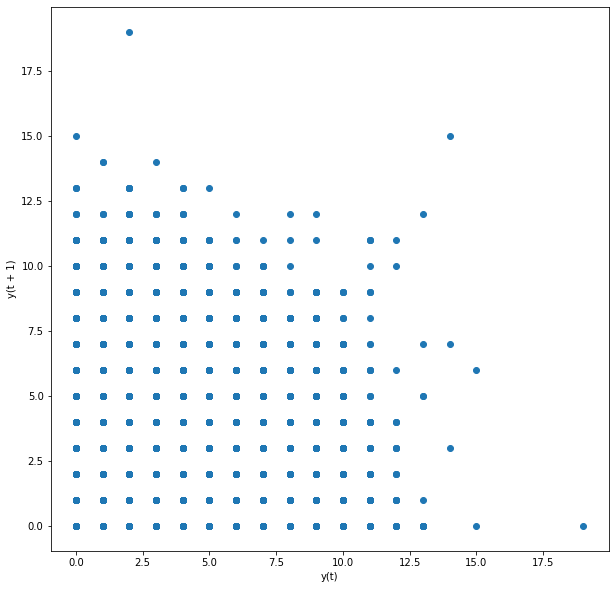

In [95]:
from pandas.plotting import lag_plot
figure = plt.figure(1, figsize = (10, 10))
lag_plot(TimeSeries)
plt.show()

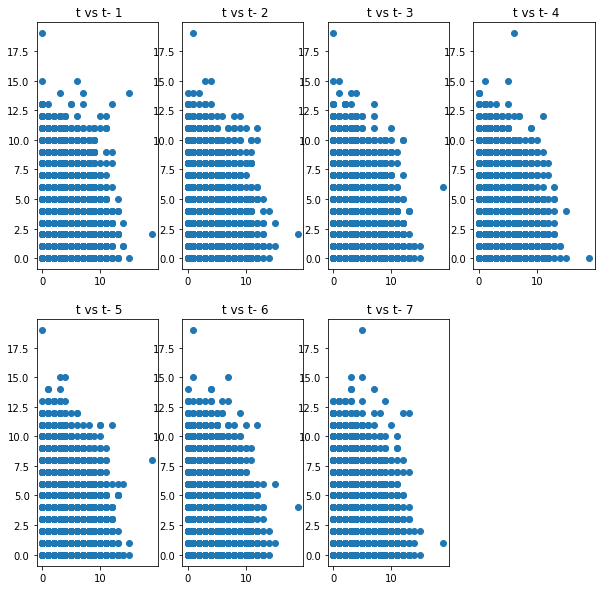

In [98]:
# See [1], §6.7, p.49

# create multiple scatter plots

values = pd.DataFrame(TimeSeries.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = [ ' t ' ]
for i in range(1,(lags + 1)):
    columns.append( ' t- ' + str(i))
dataframe.columns = columns

plt.figure(1, figsize = (10, 10))

for i in range(1,(lags + 1)):
    ax = pyplot.subplot(240 + i)
    ax.set_title( ' t vs t- ' + str(i))
    plt.scatter(x=dataframe[ ' t ' ].values, y=dataframe[ ' t- ' +str(i)].values)

plt.show()

#### Autocorrelation plots

##### Select subset of patients with sufficient date-time features (again)

In [74]:
PatientSubset = NbrPatients[NbrPatients > 200]
PatientSubsetList = PatientSubset.index.tolist()

PatientSubsetList.sort()
print(PatientSubsetList)
PatientDataSeries = df[df['PatientId'].isin(PatientSubsetList)]
display(PatientDataSeries)

PatientDataSeriesBase = PatientDataSeries[['PatientId','ObservationDate', 'EWS_Total']]
display(PatientDataSeriesBase)


[362, 523, 630, 1068, 1092, 1199, 1257, 1261, 1278, 1285, 1474, 1664, 1743, 1753, 1835, 1841, 2193, 2602, 3080, 3174, 3433, 3540, 3553, 4614, 4672, 4764, 5447, 5678, 5797, 6755, 6764, 6995, 7777]


PatientId     ObservationDate  EWS_Total    SBP  SBP_Score  LOC  \
3346          362 2019-05-14 14:53:04          2  102.0        1.0    1   
3451          362 2019-05-14 20:18:01          1  105.0        1.0    1   
3577          362 2019-05-15 06:33:37          1  121.0        0.0    1   
4871          523 2019-05-18 09:28:29          3  136.0        0.0    1   
4996          523 2019-05-18 15:44:03          2  122.0        0.0    1   
...           ...                 ...        ...    ...        ...  ...   
171671       1257 2020-01-02 06:25:14          1  124.0        0.0    1   
171672       4672 2020-01-02 06:28:00          4   70.0        3.0    1   
171685        362 2020-01-02 06:41:14          1  116.0        0.0    1   
171696       1743 2020-01-02 06:51:46          1  120.0        0.0    1   
171708       5797 2020-01-02 07:36:36          0  123.0        0.0    1   

        LOC_Score   SpO2  SpO2_Score  Add_O2  Add_O2_Score   HR  HR_Score  RR  \
3346            0   96.0         0.0       0           0.0   91         1  20   
3451            0   95.0         0.0       0           0.0   86         0  18   
3577            0   90.0         0.0       0           0.0  110         1  18   
4871            0   95.0         1.0       0           0.0  121         2  20   
4996            0   95.0         1.0       0           0.0  107         1  18   
...           ...    ...         ...     ...           ...  ...       ...  ..   
171671          0  100.0         0.0       0           0.0   71         0  18   
171672          0   97.0         0.0       0           0.0   86         0  14   
171685          0   91.0         0.0       0           0.0   97         1  16   
171696          0   95.0         0.0       0           0.0   93         1  18   
171708          0   98.0         0.0       0           0.0   88         0  18   

        RR_Score  TEMP  TEMP_Score  
3346           0  36.4           0  
3451           0  36.4           0  
3577           0  37.4           0  
4871           0  37.0           0  
4996           0  37.1           0  
...          ...   ...         ...  
171671         0  36.0           1  
171672         0  36.0           1  
171685         0  36.7           0  
171696         0  36.5           0  
171708         0  36.4           0  

[8558 rows x 17 columns]

PatientId     ObservationDate  EWS_Total
3346          362 2019-05-14 14:53:04          2
3451          362 2019-05-14 20:18:01          1
3577          362 2019-05-15 06:33:37          1
4871          523 2019-05-18 09:28:29          3
4996          523 2019-05-18 15:44:03          2
...           ...                 ...        ...
171671       1257 2020-01-02 06:25:14          1
171672       4672 2020-01-02 06:28:00          4
171685        362 2020-01-02 06:41:14          1
171696       1743 2020-01-02 06:51:46          1
171708       5797 2020-01-02 07:36:36          0

[8558 rows x 3 columns]

In [75]:
PatientSubset = NbrPatients[NbrPatients > 200]
PatientSubsetList = PatientSubset.index.tolist()

PatientSubsetList.sort()
print(PatientSubsetList)

Data = pd.DataFrame(index=PatientSubsetList, columns=['ObservationDate', 'EWS_Total'])

display(Data)

for patient in PatientSubsetList:
    OnePatient = df[df.PatientId == patient]
    OnePatient = OnePatient[['PatientId','ObservationDate', 'EWS_Total']]
    Data.append(OnePatient)
    display(OnePatient)
    #OnePatient = OnePatient[['PatientId', 'ObservationDate', 'EWS_Total']]
    #display(OnePatient)
    #OnePatient = OnePatient.set_index('ObservationDate')
    #display(OnePatient)
    #OnePatient.plot(title = patient, figsize=(12,6))

display(Data)

[362, 523, 630, 1068, 1092, 1199, 1257, 1261, 1278, 1285, 1474, 1664, 1743, 1753, 1835, 1841, 2193, 2602, 3080, 3174, 3433, 3540, 3553, 4614, 4672, 4764, 5447, 5678, 5797, 6755, 6764, 6995, 7777]


ObservationDate EWS_Total
362              NaN       NaN
523              NaN       NaN
630              NaN       NaN
1068             NaN       NaN
1092             NaN       NaN
1199             NaN       NaN
1257             NaN       NaN
1261             NaN       NaN
1278             NaN       NaN
1285             NaN       NaN
1474             NaN       NaN
1664             NaN       NaN
1743             NaN       NaN
1753             NaN       NaN
1835             NaN       NaN
1841             NaN       NaN
2193             NaN       NaN
2602             NaN       NaN
3080             NaN       NaN
3174             NaN       NaN
3433             NaN       NaN
3540             NaN       NaN
3553             NaN       NaN
4614             NaN       NaN
4672             NaN       NaN
4764             NaN       NaN
5447             NaN       NaN
5678             NaN       NaN
5797             NaN       NaN
6755             NaN       NaN
6764             NaN       NaN
6995             NaN       NaN
7777             NaN       NaN

PatientId     ObservationDate  EWS_Total
3346          362 2019-05-14 14:53:04          2
3451          362 2019-05-14 20:18:01          1
3577          362 2019-05-15 06:33:37          1
14861         362 2019-06-07 15:55:38          2
14997         362 2019-06-07 19:51:00          1
...           ...                 ...        ...
170877        362 2019-12-31 21:31:18          1
171059        362 2020-01-01 06:21:58          2
171256        362 2020-01-01 14:06:07          1
171471        362 2020-01-01 20:57:48          1
171685        362 2020-01-02 06:41:14          1

[247 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
4871          523 2019-05-18 09:28:29          3
4996          523 2019-05-18 15:44:03          2
5309          523 2019-05-19 08:44:21          4
5397          523 2019-05-19 13:06:54          7
5630          523 2019-05-19 23:56:11          1
...           ...                 ...        ...
150840        523 2019-12-04 13:31:10          2
151088        523 2019-12-04 18:23:49          1
151710        523 2019-12-05 12:24:25          2
151714        523 2019-12-05 12:25:21          2
151943        523 2019-12-05 18:02:32          1

[261 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
6448         630 2019-05-21 17:09:34          5
6555         630 2019-05-21 21:09:58          6
6556         630 2019-05-21 21:11:22          6
6731         630 2019-05-22 07:01:43          5
6951         630 2019-05-22 16:59:01          4
...          ...                 ...        ...
96503        630 2019-09-29 22:06:14          9
96613        630 2019-09-30 04:36:13          5
97038        630 2019-09-30 15:20:28          9
97255        630 2019-09-30 20:39:45          9
97464        630 2019-10-01 05:43:00         10

[315 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
12356        1068 2019-06-03 08:39:57          9
12357        1068 2019-06-03 08:40:32          8
12432        1068 2019-06-03 11:31:17          8
12497        1068 2019-06-03 14:03:53          7
12562        1068 2019-06-03 16:29:56          9
...           ...                 ...        ...
164424       1068 2019-12-21 13:54:38          3
164912       1068 2019-12-22 11:58:18          0
164997       1068 2019-12-22 14:44:40          2
165240       1068 2019-12-22 23:29:14          2
165466       1068 2019-12-23 09:26:59          3

[256 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
12529        1092 2019-06-03 15:04:00          2
12658        1092 2019-06-03 20:11:31          2
12826        1092 2019-06-04 07:07:14          5
13047        1092 2019-06-04 16:47:11          2
13313        1092 2019-06-05 07:23:21          4
...           ...                 ...        ...
153785       1092 2019-12-07 20:29:45          0
154099       1092 2019-12-08 08:23:28          0
154330       1092 2019-12-08 14:42:39          0
154495       1092 2019-12-08 20:06:08          0
154840       1092 2019-12-09 08:24:41          0

[272 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
13433       1199 2019-06-05 12:22:09          2
13600       1199 2019-06-05 17:41:18          3
13891       1199 2019-06-06 06:51:03          3
14056       1199 2019-06-06 11:43:05          4
14242       1199 2019-06-06 17:47:44          4
...          ...                 ...        ...
91119       1199 2019-09-22 19:46:24          0
91369       1199 2019-09-23 06:50:48          0
91564       1199 2019-09-23 12:15:25          1
91722       1199 2019-09-23 16:05:56          1
92192       1199 2019-09-24 08:14:24          1

[297 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
13860        1257 2019-06-06 05:20:20          4
14011        1257 2019-06-06 10:27:41          2
14144        1257 2019-06-06 13:56:08          3
14304        1257 2019-06-06 19:13:56          2
14413        1257 2019-06-06 23:25:02          3
...           ...                 ...        ...
170667       1257 2019-12-31 15:07:20          1
170910       1257 2019-12-31 22:16:51          1
171080       1257 2020-01-01 06:42:04          2
171416       1257 2020-01-01 20:16:49          1
171671       1257 2020-01-02 06:25:14          1

[254 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
13868        1261 2019-06-06 05:42:27          3
14006        1261 2019-06-06 10:14:27          1
14311        1261 2019-06-06 19:19:15          1
14585        1261 2019-06-07 06:06:13          1
14963        1261 2019-06-07 19:21:28          2
...           ...                 ...        ...
160790       1261 2019-12-16 19:43:14          1
161018       1261 2019-12-17 06:02:54          0
161239       1261 2019-12-17 11:02:21          1
162817       1261 2019-12-19 10:55:46          2
163242       1261 2019-12-19 21:26:04          2

[431 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
13945        1278 2019-06-06 09:10:09          2
13962        1278 2019-06-06 09:24:19          3
14320        1278 2019-06-06 19:26:51          2
14396        1278 2019-06-06 21:59:04          2
14584        1278 2019-06-07 05:59:16          4
...           ...                 ...        ...
170811       1278 2019-12-31 20:02:57          3
171088       1278 2020-01-01 07:08:28          3
171291       1278 2020-01-01 15:01:39          4
171457       1278 2020-01-01 20:41:04          3
171638       1278 2020-01-02 05:46:01          3

[200 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
13994        1285 2019-06-06 09:57:10          5
13997        1285 2019-06-06 09:58:36          4
34683        1285 2019-07-05 15:26:35          4
38522        1285 2019-07-10 16:43:44          3
38588        1285 2019-07-10 18:44:30          1
...           ...                 ...        ...
161834       1285 2019-12-18 06:34:03          0
162235       1285 2019-12-18 17:05:12          0
162367       1285 2019-12-18 20:14:43          1
162603       1285 2019-12-19 06:00:42          0
162816       1285 2019-12-19 10:55:34          0

[267 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
16675       1474 2019-06-10 12:39:37          3
18648       1474 2019-06-13 13:57:32          0
18842       1474 2019-06-13 19:56:45          6
18901       1474 2019-06-13 22:59:19          4
18958       1474 2019-06-14 01:33:06          4
...          ...                 ...        ...
46940       1474 2019-07-21 19:05:02          2
47150       1474 2019-07-22 04:48:40          3
47186       1474 2019-07-22 05:10:00          5
47193       1474 2019-07-22 05:13:38          4
47313       1474 2019-07-22 08:55:38          6

[196 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
18756        1664 2019-06-13 17:39:49          1
19127        1664 2019-06-14 08:54:49          1
19262        1664 2019-06-14 12:45:43          3
19362        1664 2019-06-14 16:32:16          1
19757        1664 2019-06-15 10:16:16          1
...           ...                 ...        ...
170575       1664 2019-12-31 13:08:00          0
170773       1664 2019-12-31 18:29:15          1
171105       1664 2020-01-01 08:29:47          0
171261       1664 2020-01-01 14:07:27          2
171335       1664 2020-01-01 17:35:33          1

[207 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
19840        1743 2019-06-15 13:32:39          4
20025        1743 2019-06-15 20:22:36          5
20471        1743 2019-06-16 14:23:34          3
20617        1743 2019-06-16 19:49:24          3
20794        1743 2019-06-17 04:39:15          4
...           ...                 ...        ...
171085       1743 2020-01-01 06:54:48          1
171182       1743 2020-01-01 11:10:28          3
171290       1743 2020-01-01 14:56:00          1
171496       1743 2020-01-01 21:30:12          2
171696       1743 2020-01-02 06:51:46          1

[616 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
20063        1753 2019-06-15 21:58:25          4
20090        1753 2019-06-15 23:37:13          5
20139        1753 2019-06-16 02:00:07          8
20172        1753 2019-06-16 04:33:21          6
20272        1753 2019-06-16 07:48:03         10
...           ...                 ...        ...
170565       1753 2019-12-31 12:56:48          6
170789       1753 2019-12-31 18:38:09          6
170791       1753 2019-12-31 18:39:13          5
171202       1753 2020-01-01 11:55:47          5
171325       1753 2020-01-01 16:40:18          5

[245 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
21204        1835 2019-06-17 14:51:19          3
21307        1835 2019-06-17 17:22:36          1
21939        1835 2019-06-18 13:36:07          2
22071        1835 2019-06-18 17:18:50          2
22222        1835 2019-06-18 21:00:11          0
...           ...                 ...        ...
169334       1835 2019-12-29 17:55:27          2
169774       1835 2019-12-30 10:25:12          3
170030       1835 2019-12-30 17:41:08          2
170117       1835 2019-12-30 20:14:43          2
170447       1835 2019-12-31 09:37:01          2

[232 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
21261        1841 2019-06-17 16:32:29          2
21439        1841 2019-06-17 20:43:50          2
21676        1841 2019-06-18 05:58:18          2
22024        1841 2019-06-18 15:43:12          5
22224        1841 2019-06-18 21:01:19          7
...           ...                 ...        ...
139594       1841 2019-11-21 06:18:22          4
139943       1841 2019-11-21 13:52:10          6
140106       1841 2019-11-21 17:28:35          5
140278       1841 2019-11-21 21:08:49          4
140523       1841 2019-11-22 06:14:39          4

[324 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
26554        2193 2019-06-24 17:02:52          2
27064        2193 2019-06-25 08:45:05          3
27228        2193 2019-06-25 12:41:33          3
27431        2193 2019-06-25 17:29:31          5
27505        2193 2019-06-25 19:25:30          2
...           ...                 ...        ...
170574       2193 2019-12-31 13:03:17          1
170779       2193 2019-12-31 18:33:26          0
171283       2193 2020-01-01 14:35:59          0
171376       2193 2020-01-01 18:32:21          1
171514       2193 2020-01-01 22:22:32          0

[218 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
32146       2602 2019-07-02 09:35:29          1
32321       2602 2019-07-02 13:44:43          1
32392       2602 2019-07-02 16:21:12          1
32644       2602 2019-07-03 01:08:34          0
32652       2602 2019-07-03 01:51:55          2
...          ...                 ...        ...
62050       2602 2019-08-12 13:51:02          1
62171       2602 2019-08-12 17:38:14          0
62307       2602 2019-08-12 20:54:33          0
62527       2602 2019-08-13 05:39:09          0
62625       2602 2019-08-13 09:55:28          0

[181 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
38511        3080 2019-07-10 16:22:08          3
38604        3080 2019-07-10 19:03:57          0
38734        3080 2019-07-10 22:13:57          0
38829        3080 2019-07-11 03:56:29          1
39086        3080 2019-07-11 10:52:18          2
...           ...                 ...        ...
167421       3080 2019-12-26 16:15:32          2
167586       3080 2019-12-26 22:04:30          2
167754       3080 2019-12-27 06:43:48          1
167822       3080 2019-12-27 09:59:09          2
167971       3080 2019-12-27 13:59:32          2

[292 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
39807       3174 2019-07-12 08:59:18          4
39942       3174 2019-07-12 11:14:59          3
39943       3174 2019-07-12 11:15:04          0
40064       3174 2019-07-12 13:51:59          0
40228       3174 2019-07-12 19:41:42          0
...          ...                 ...        ...
64215       3174 2019-08-15 17:53:51          0
64344       3174 2019-08-15 21:19:05          0
64588       3174 2019-08-16 06:11:58          2
64706       3174 2019-08-16 10:23:08          1
64770       3174 2019-08-16 12:51:57          2

[194 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
43945       3433 2019-07-17 19:51:16          4
44226       3433 2019-07-18 06:37:42          3
44517       3433 2019-07-18 14:13:27          5
44617       3433 2019-07-18 17:03:12          6
44697       3433 2019-07-18 19:17:25          7
...          ...                 ...        ...
87159       3433 2019-09-17 11:58:26          1
87349       3433 2019-09-17 16:28:22          2
87471       3433 2019-09-17 19:14:24          1
87779       3433 2019-09-18 06:45:39          4
93891       3433 2019-09-26 09:59:30          3

[205 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
45337        3540 2019-07-19 13:43:32          0
45406        3540 2019-07-19 15:27:33          1
45466        3540 2019-07-19 17:14:41          1
45622        3540 2019-07-19 20:32:11          0
45716        3540 2019-07-20 00:32:43          0
...           ...                 ...        ...
114822       3540 2019-10-22 19:22:50          0
115061       3540 2019-10-23 05:10:47          0
115452       3540 2019-10-23 14:50:15          0
115861       3540 2019-10-24 05:03:05          0
116097       3540 2019-10-24 10:30:52          0

[194 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
45487        3553 2019-07-19 17:43:27          4
45510        3553 2019-07-19 18:36:24          3
45900        3553 2019-07-20 07:21:07          3
45910        3553 2019-07-20 08:15:54          4
46227        3553 2019-07-20 18:22:40          4
...           ...                 ...        ...
140017       3553 2019-11-21 14:42:03          2
140299       3553 2019-11-21 21:24:20          7
140613       3553 2019-11-22 08:06:10          9
140810       3553 2019-11-22 12:32:48          8
140936       3553 2019-11-22 14:56:22          9

[229 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
62869       4614 2019-08-13 17:40:45          0
62998       4614 2019-08-13 20:56:50          0
63087       4614 2019-08-14 01:24:03          1
63179       4614 2019-08-14 05:23:25          0
63289       4614 2019-08-14 09:15:56          0
...          ...                 ...        ...
94532       4614 2019-09-27 05:22:16          1
94988       4614 2019-09-27 17:00:04          3
95081       4614 2019-09-27 19:09:37          0
95287       4614 2019-09-28 04:30:56          1
95511       4614 2019-09-28 10:46:03          0

[202 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
63616        4672 2019-08-14 19:32:42          0
63713        4672 2019-08-14 21:55:08          1
63795        4672 2019-08-15 02:04:15          1
63906        4672 2019-08-15 05:55:28          4
64270        4672 2019-08-15 19:31:49          3
...           ...                 ...        ...
170807       4672 2019-12-31 19:54:41          3
171087       4672 2020-01-01 07:01:01          4
171309       4672 2020-01-01 15:54:32          5
171418       4672 2020-01-01 20:17:34          3
171672       4672 2020-01-02 06:28:00          4

[244 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
65014        4764 2019-08-16 20:10:57          5
65238        4764 2019-08-17 05:15:05          4
65332        4764 2019-08-17 08:14:26          5
65466        4764 2019-08-17 12:51:30          4
65753        4764 2019-08-17 21:13:22          4
...           ...                 ...        ...
171056       4764 2020-01-01 06:18:57          0
171158       4764 2020-01-01 10:24:00          1
171214       4764 2020-01-01 12:31:00          0
171510       4764 2020-01-01 22:05:42          0
171660       4764 2020-01-02 06:16:00          0

[214 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
76960        5447 2019-09-03 08:11:06          2
77210        5447 2019-09-03 14:41:51          4
77229        5447 2019-09-03 15:12:40          4
77246        5447 2019-09-03 15:49:49          4
77257        5447 2019-09-03 16:28:51          3
...           ...                 ...        ...
151990       5447 2019-12-05 18:41:18          2
152021       5447 2019-12-05 19:51:38          1
152218       5447 2019-12-06 01:21:23          2
152402       5447 2019-12-06 06:43:15          0
152595       5447 2019-12-06 11:04:47          1

[239 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
80261        5678 2019-09-07 17:27:58          5
80334        5678 2019-09-07 19:56:38          6
80452        5678 2019-09-08 00:47:55          6
80581        5678 2019-09-08 06:01:13          8
80596        5678 2019-09-08 06:58:51          4
...           ...                 ...        ...
104880       5678 2019-10-10 16:19:15          2
104969       5678 2019-10-10 18:44:22          2
105022       5678 2019-10-10 19:19:19          2
105320       5678 2019-10-11 05:20:31          1
105485       5678 2019-10-11 09:19:50          2

[213 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
82121        5797 2019-09-10 11:39:49          3
82451        5797 2019-09-10 22:02:29          5
82607        5797 2019-09-11 06:53:24          4
82741        5797 2019-09-11 11:11:30          8
82980        5797 2019-09-11 18:10:32          6
...           ...                 ...        ...
171099       5797 2020-01-01 08:08:24          0
171204       5797 2020-01-01 11:59:47          3
171326       5797 2020-01-01 16:46:48          2
171404       5797 2020-01-01 19:58:15          1
171708       5797 2020-01-02 07:36:36          0

[423 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
97643        6755 2019-10-01 10:14:46          2
97976        6755 2019-10-01 19:25:30          4
99912        6755 2019-10-04 09:39:44          9
100002       6755 2019-10-04 12:32:23          9
100010       6755 2019-10-04 12:47:08          8
...           ...                 ...        ...
120655       6755 2019-10-30 05:25:32          1
120874       6755 2019-10-30 10:19:19          1
121081       6755 2019-10-30 14:49:55          2
121316       6755 2019-10-30 20:49:53          1
121603       6755 2019-10-31 06:38:29          2

[204 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
97743        6764 2019-10-01 13:11:53          4
97890        6764 2019-10-01 17:08:38          7
98299        6764 2019-10-02 06:36:16          5
98484        6764 2019-10-02 11:12:20          5
98676        6764 2019-10-02 15:47:07          5
...           ...                 ...        ...
158752       6764 2019-12-13 20:45:01          5
159015       6764 2019-12-14 07:36:18          7
159135       6764 2019-12-14 12:15:01          7
159950       6764 2019-12-15 18:29:03          6
160305       6764 2019-12-16 07:36:55          2

[216 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
102118       6995 2019-10-07 12:09:55          0
102173       6995 2019-10-07 13:22:50          1
102243       6995 2019-10-07 14:49:18          1
102280       6995 2019-10-07 15:59:52          1
102480       6995 2019-10-07 20:00:54          1
...           ...                 ...        ...
147731       6995 2019-11-30 17:26:12          1
149310       6995 2019-12-02 18:47:21          1
149447       6995 2019-12-02 21:45:55          1
149655       6995 2019-12-03 06:22:52          1
149822       6995 2019-12-03 10:36:07          1

[276 rows x 3 columns]

PatientId     ObservationDate  EWS_Total
115962       7777 2019-10-24 07:21:42          2
117281       7777 2019-10-25 18:22:22          2
117431       7777 2019-10-25 22:25:35          2
119202       7777 2019-10-28 11:03:41          2
119225       7777 2019-10-28 11:37:30          2
...           ...                 ...        ...
137503       7777 2019-11-18 21:17:41          1
137622       7777 2019-11-19 02:24:17          0
137680       7777 2019-11-19 05:24:47          2
137954       7777 2019-11-19 11:00:26          3
138044       7777 2019-11-19 13:06:43          3

[194 rows x 3 columns]

ObservationDate EWS_Total
362              NaN       NaN
523              NaN       NaN
630              NaN       NaN
1068             NaN       NaN
1092             NaN       NaN
1199             NaN       NaN
1257             NaN       NaN
1261             NaN       NaN
1278             NaN       NaN
1285             NaN       NaN
1474             NaN       NaN
1664             NaN       NaN
1743             NaN       NaN
1753             NaN       NaN
1835             NaN       NaN
1841             NaN       NaN
2193             NaN       NaN
2602             NaN       NaN
3080             NaN       NaN
3174             NaN       NaN
3433             NaN       NaN
3540             NaN       NaN
3553             NaN       NaN
4614             NaN       NaN
4672             NaN       NaN
4764             NaN       NaN
5447             NaN       NaN
5678             NaN       NaN
5797             NaN       NaN
6755             NaN       NaN
6764             NaN       NaN
6995             NaN       NaN
7777             NaN       NaN

EWS_Total
ObservationDate               
2019-05-14 14:53:04          2
2019-05-14 20:18:01          1
2019-05-15 06:33:37          1
2019-06-07 15:55:38          2
2019-06-07 19:51:00          1
...                        ...
2019-12-31 21:31:18          1
2020-01-01 06:21:58          2
2020-01-01 14:06:07          1
2020-01-01 20:57:48          1
2020-01-02 06:41:14          1

[247 rows x 1 columns]

Index unique?  True


<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

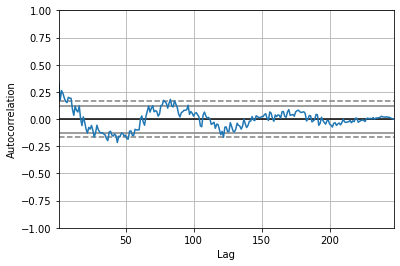

In [83]:
from pandas.plotting import autocorrelation_plot

OnePatient = df[df.PatientId == 362][['ObservationDate', 'EWS_Total']].set_index('ObservationDate')
display(OnePatient)
print("Index unique? ", OnePatient.index.is_unique)
autocorrelation_plot(OnePatient)

In [81]:
OnePatient.index.is_unique

True

[362, 523, 630, 1068, 1092, 1199, 1257, 1261, 1278, 1285, 1474, 1664, 1743, 1753, 1835, 1841, 2193, 2602, 3080, 3174, 3433, 3540, 3553, 4614, 4672, 4764, 5447, 5678, 5797, 6755, 6764, 6995, 7777]



PatientId =  362    (Index unique?  True ) :


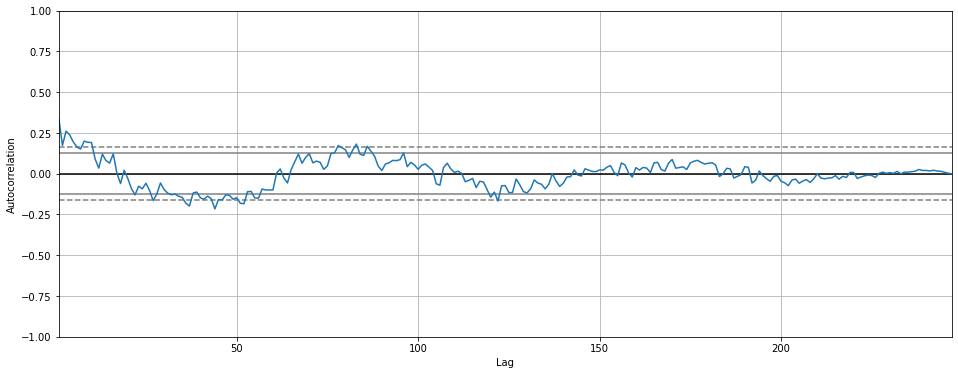

PatientId =  523    (Index unique?  True ) :


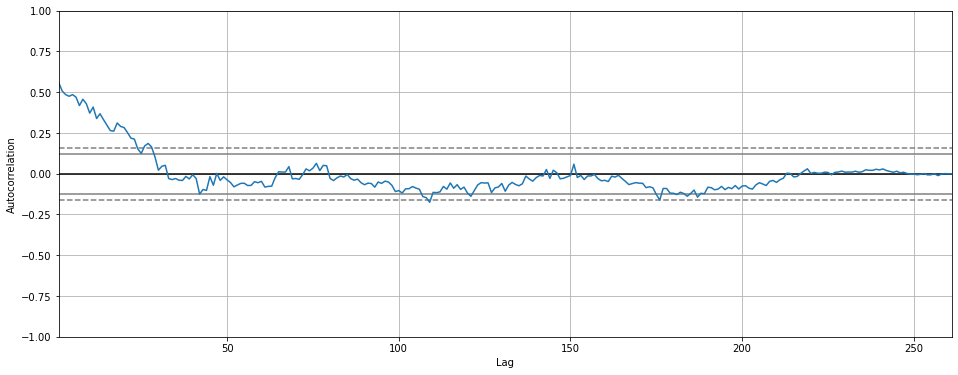

PatientId =  630    (Index unique?  True ) :


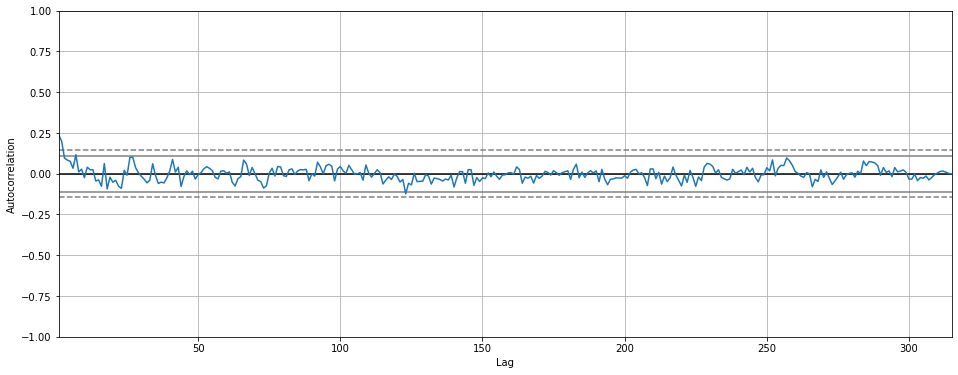

PatientId =  1068    (Index unique?  True ) :


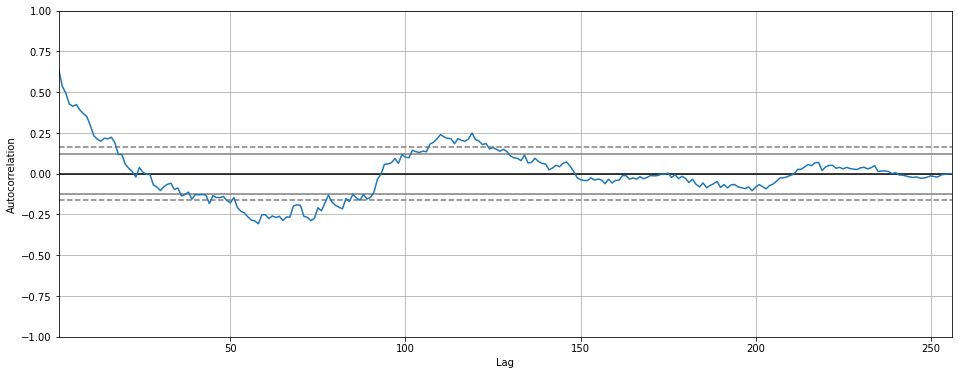

PatientId =  1092    (Index unique?  True ) :


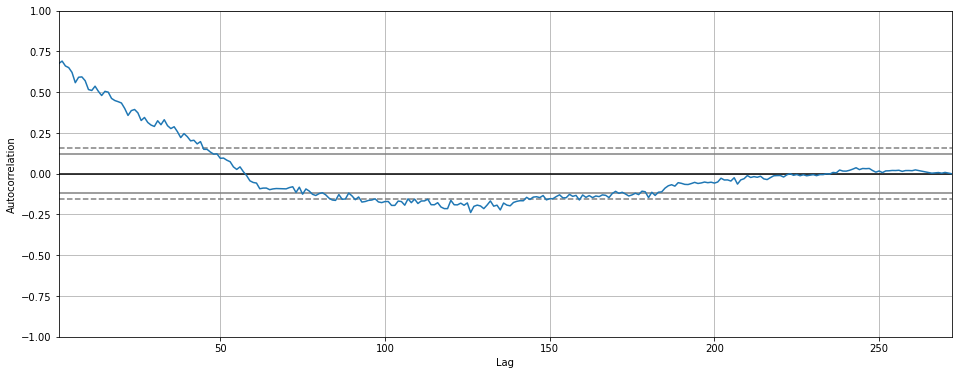

PatientId =  1199    (Index unique?  True ) :


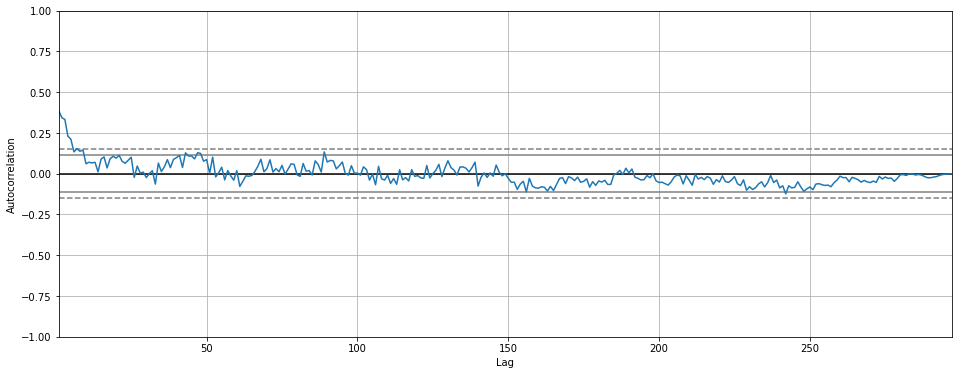

PatientId =  1257    (Index unique?  True ) :


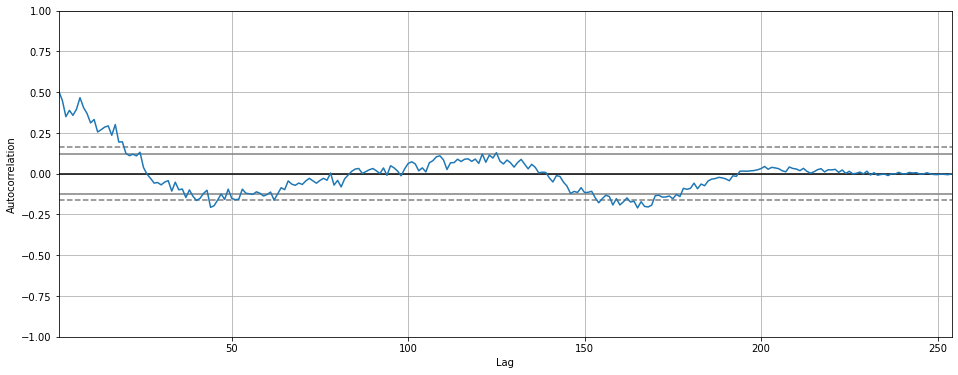

PatientId =  1261    (Index unique?  True ) :


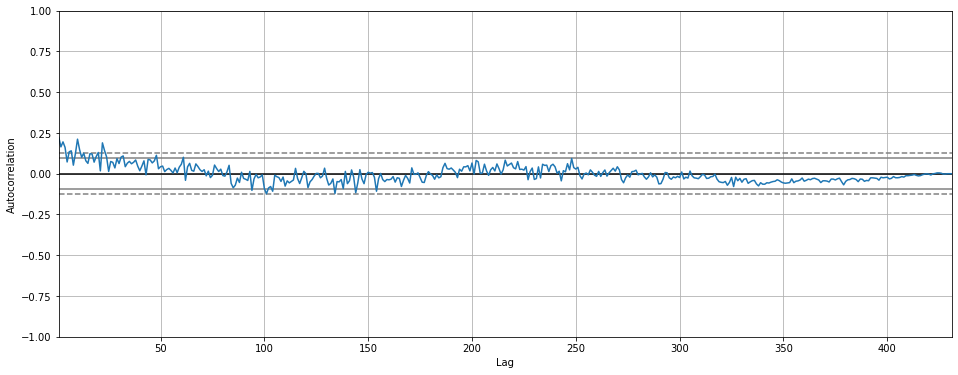

PatientId =  1278    (Index unique?  True ) :


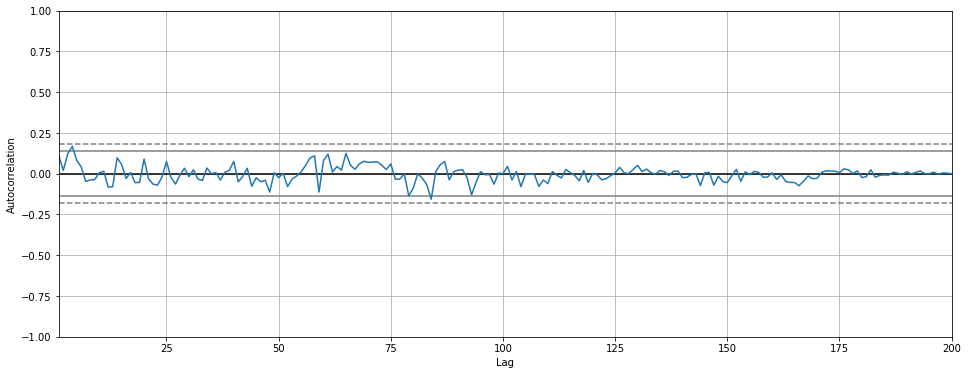

PatientId =  1285    (Index unique?  True ) :


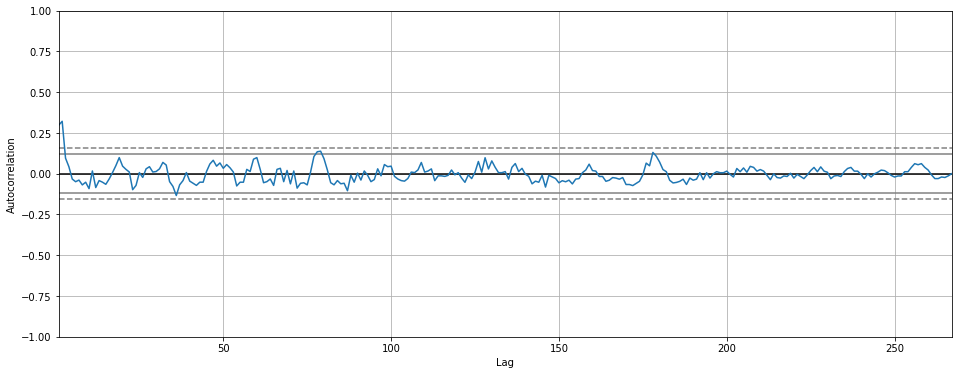

PatientId =  1474    (Index unique?  True ) :


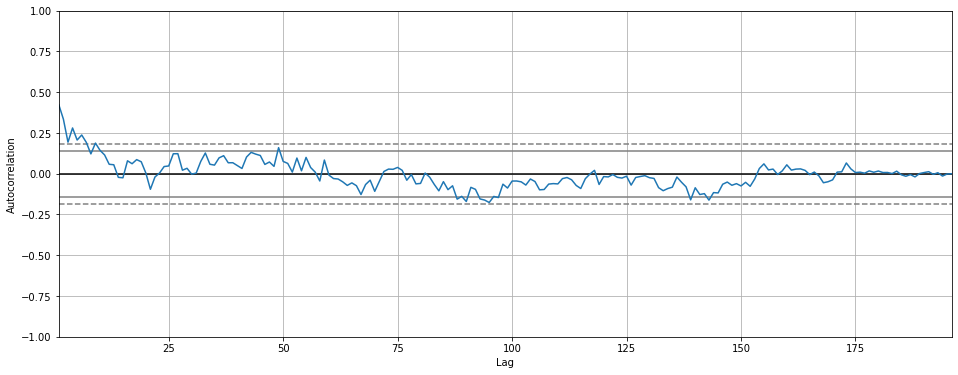

PatientId =  1664    (Index unique?  True ) :


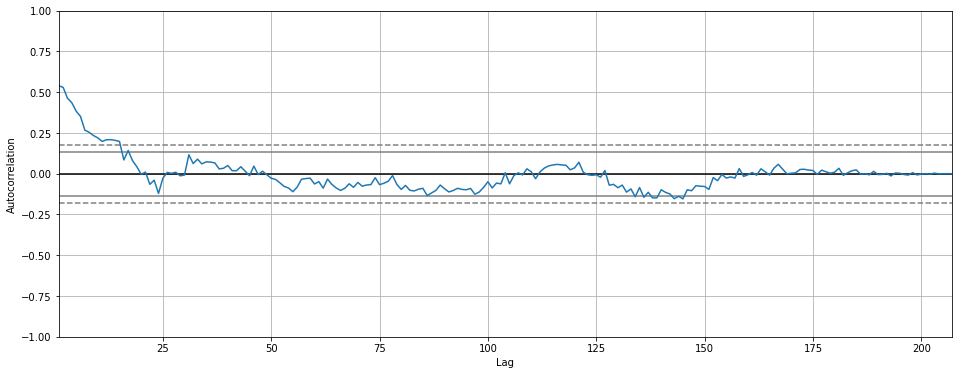

PatientId =  1743    (Index unique?  True ) :


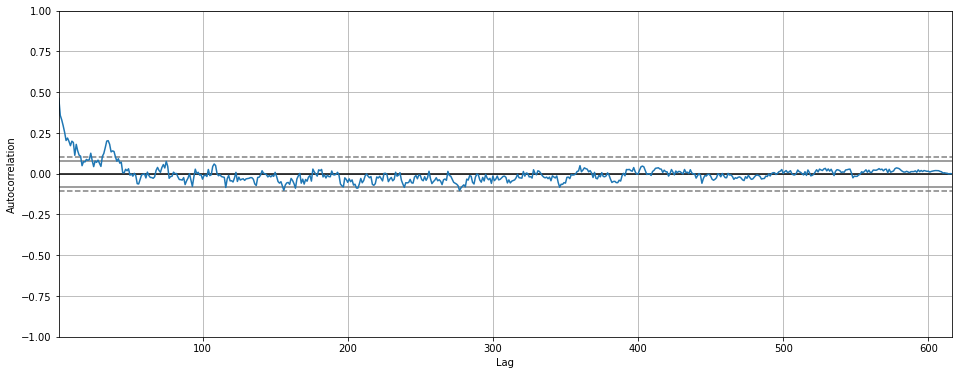

PatientId =  1753    (Index unique?  True ) :


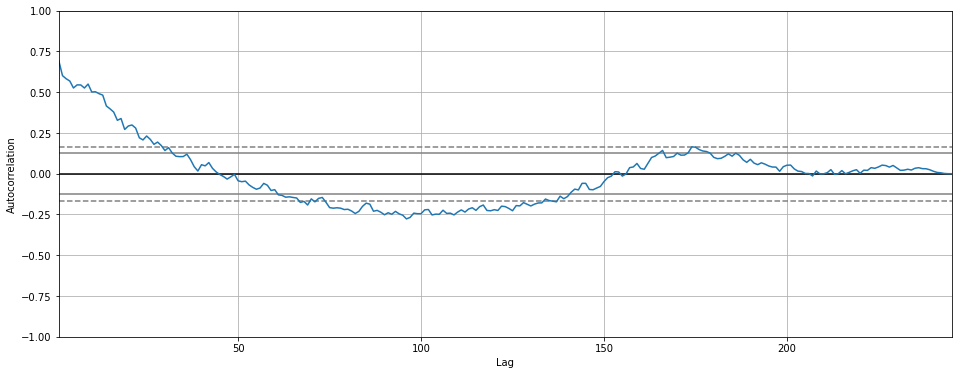

PatientId =  1835    (Index unique?  True ) :


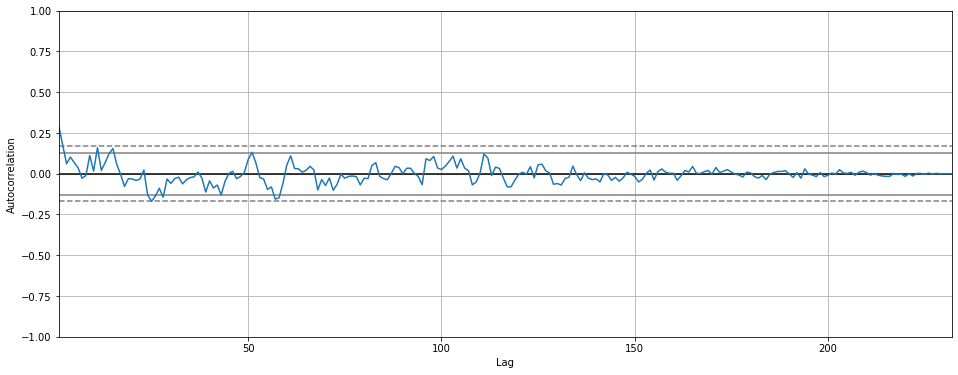

PatientId =  1841    (Index unique?  True ) :


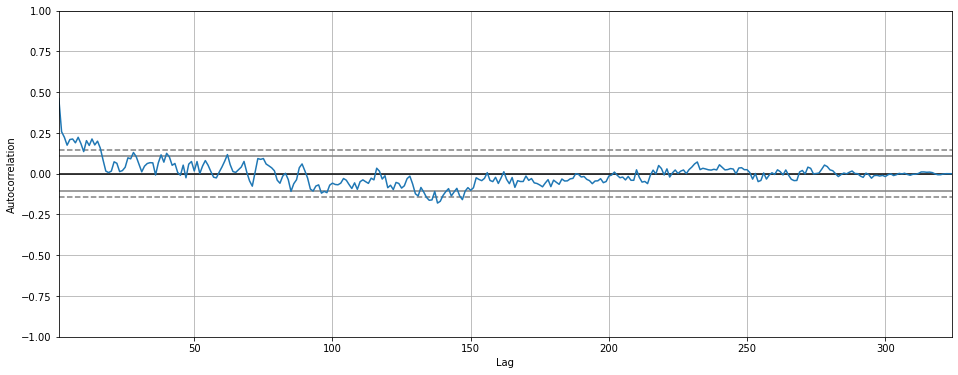

PatientId =  2193    (Index unique?  True ) :


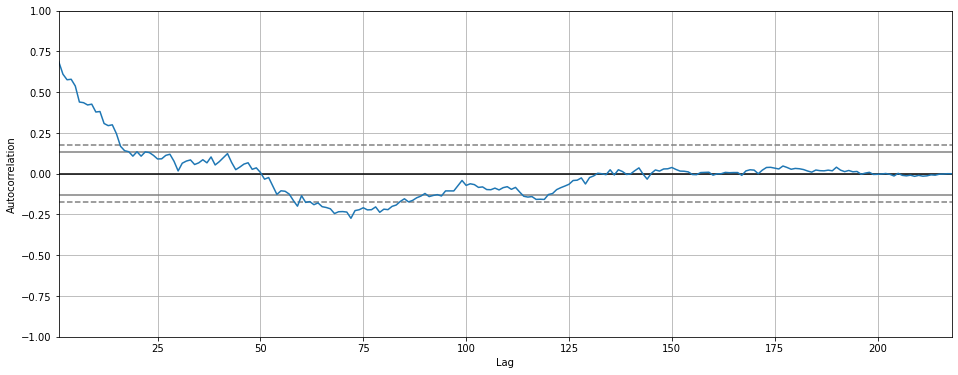

PatientId =  2602    (Index unique?  True ) :


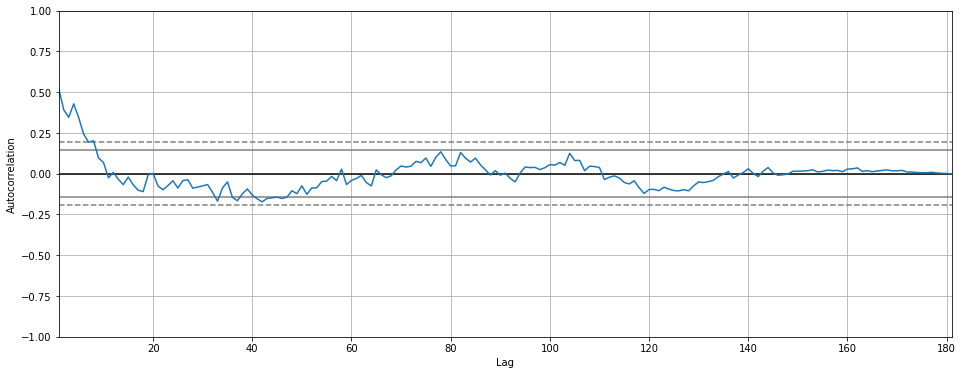

PatientId =  3080    (Index unique?  True ) :


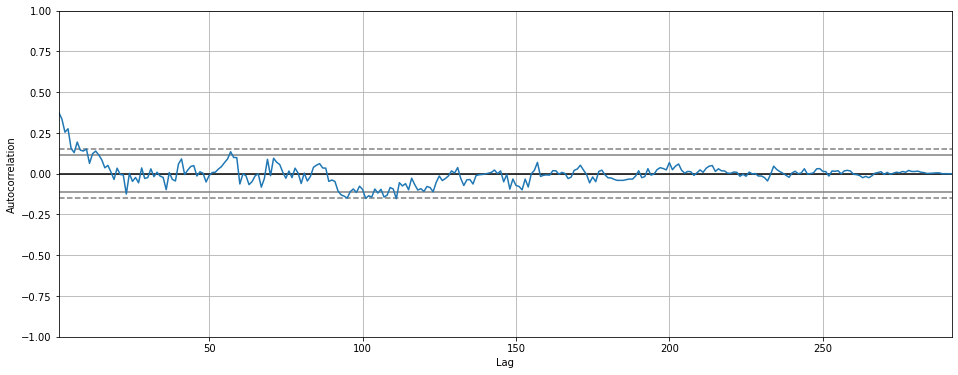

PatientId =  3174    (Index unique?  True ) :


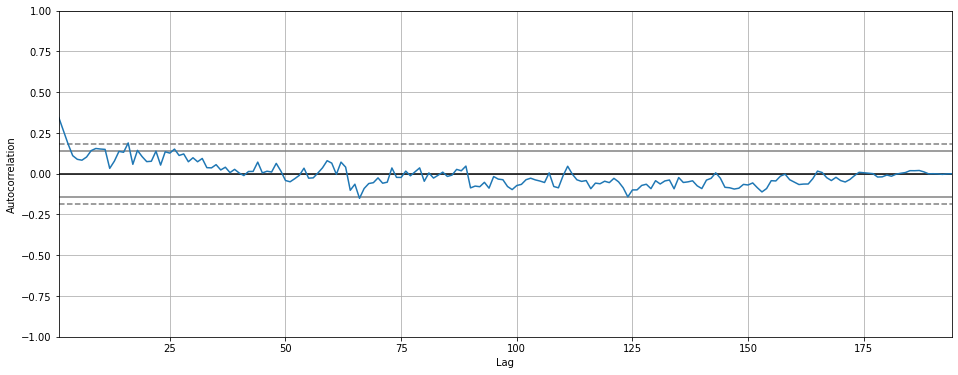

PatientId =  3433    (Index unique?  True ) :


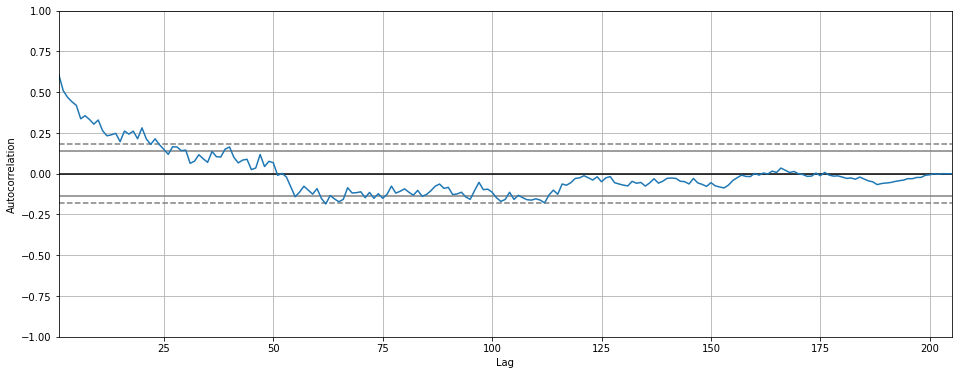

PatientId =  3540    (Index unique?  True ) :


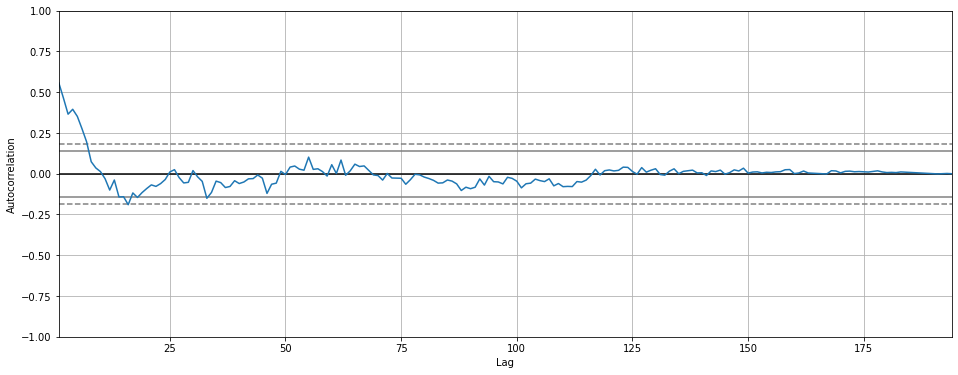

PatientId =  3553    (Index unique?  True ) :


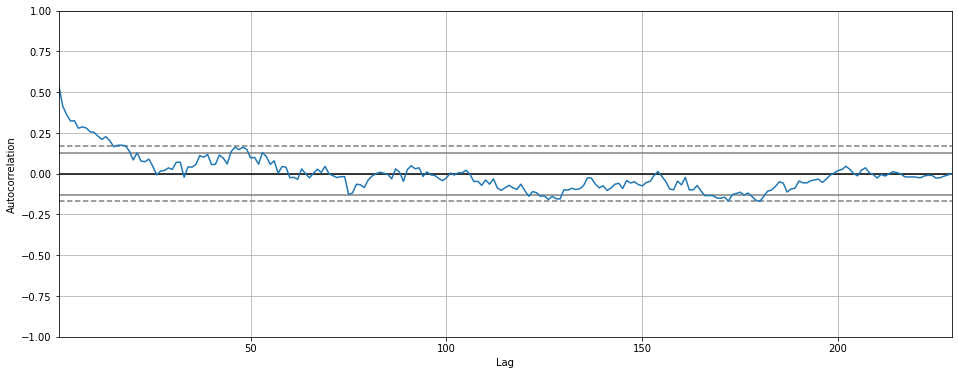

PatientId =  4614    (Index unique?  True ) :


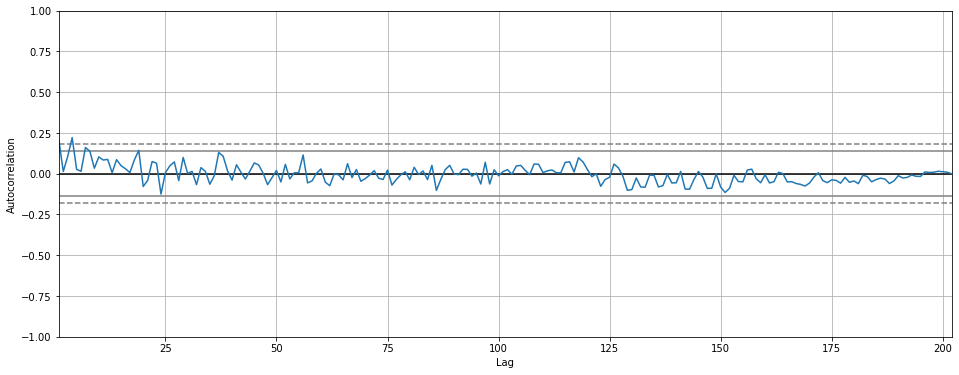

PatientId =  4672    (Index unique?  True ) :


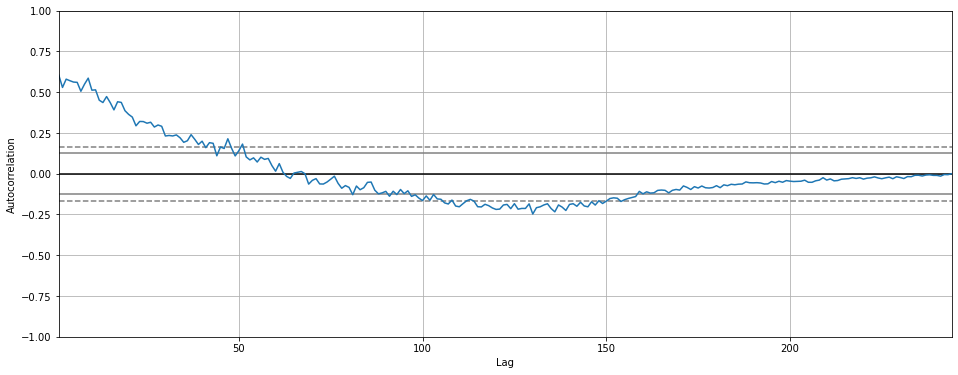

PatientId =  4764    (Index unique?  True ) :


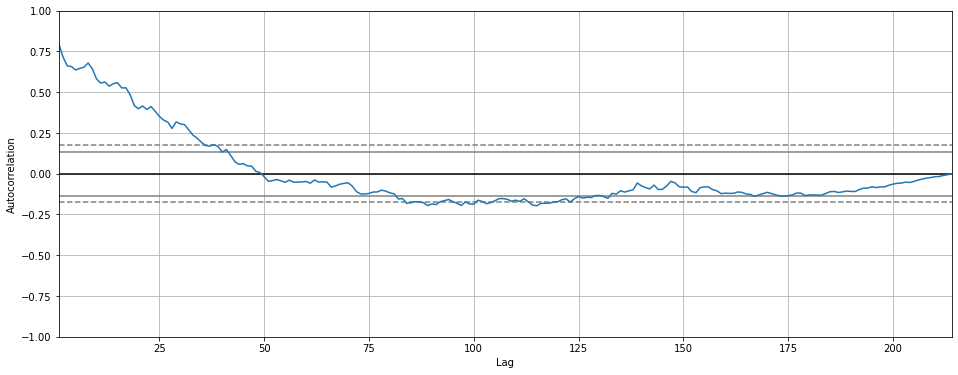

PatientId =  5447    (Index unique?  True ) :


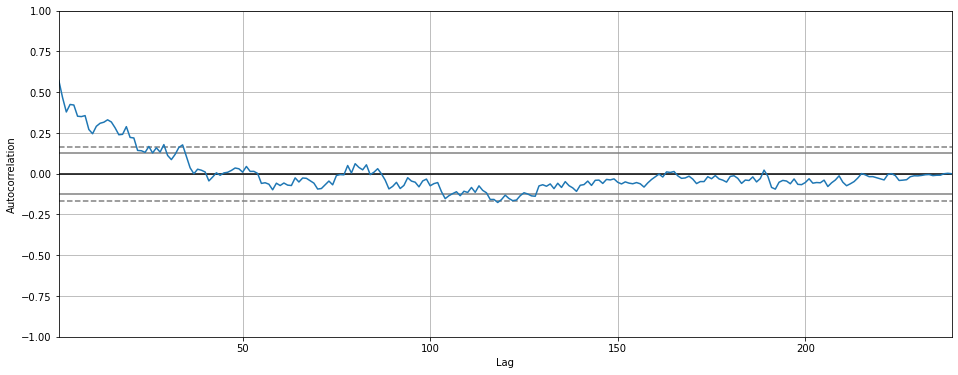

PatientId =  5678    (Index unique?  True ) :


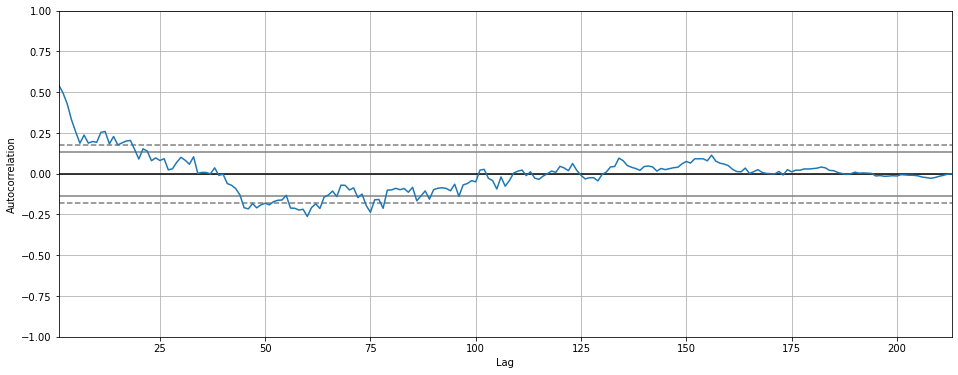

PatientId =  5797    (Index unique?  True ) :


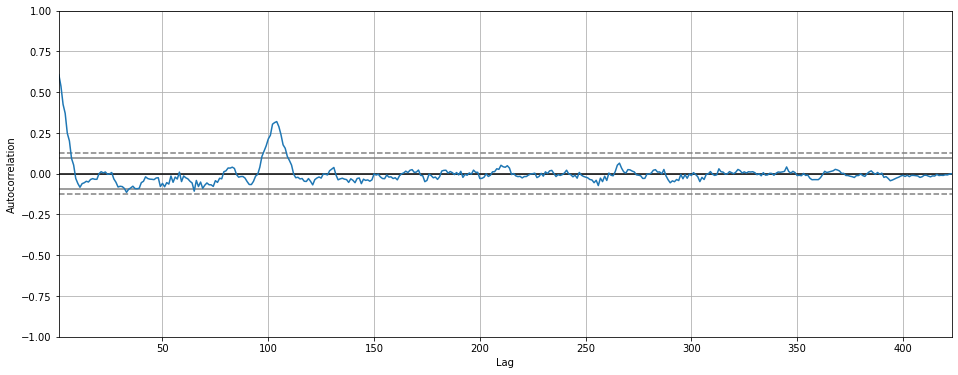

PatientId =  6755    (Index unique?  True ) :


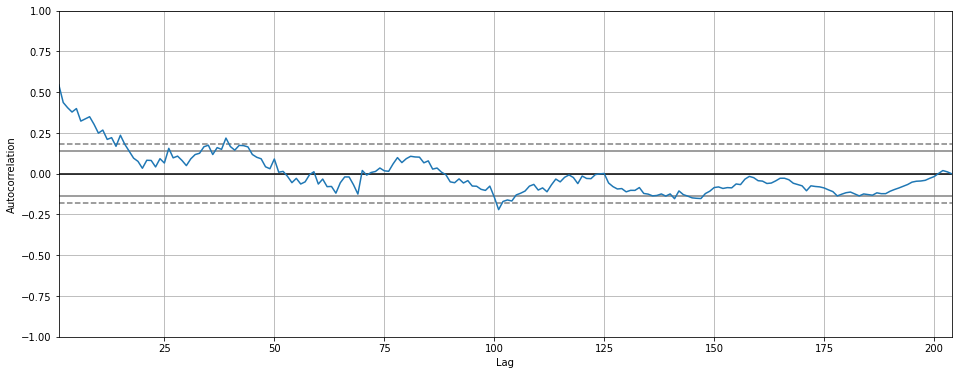

PatientId =  6764    (Index unique?  True ) :


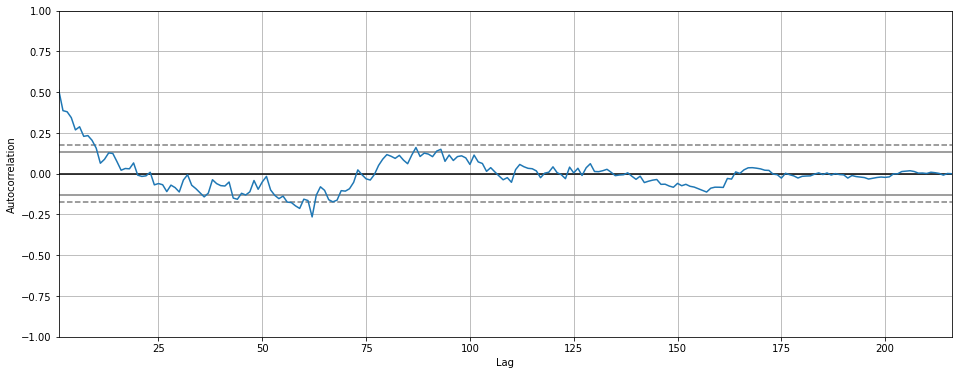

PatientId =  6995    (Index unique?  True ) :


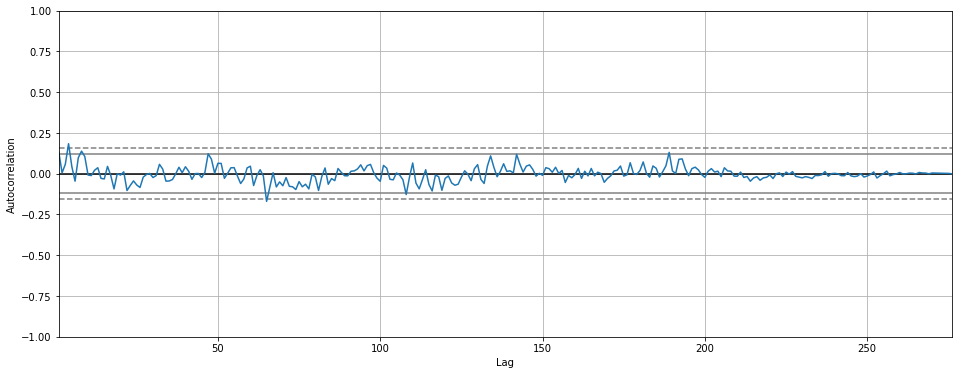

PatientId =  7777    (Index unique?  True ) :


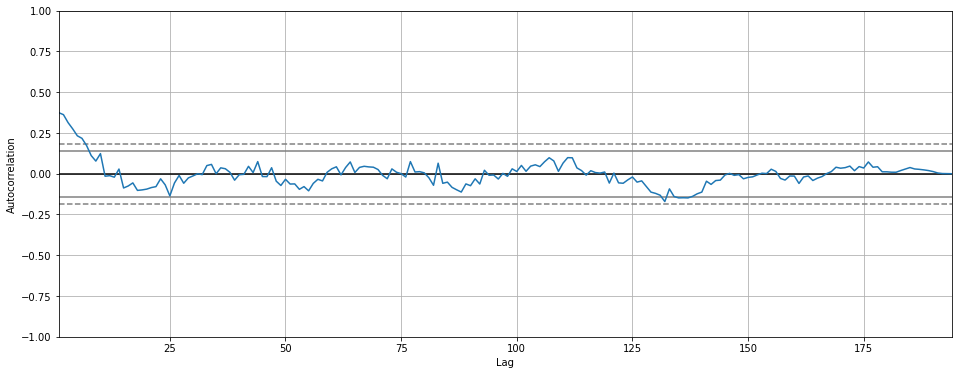

In [86]:
PatientSubset = NbrPatients[NbrPatients > 200]
PatientSubsetList = PatientSubset.index.tolist()

PatientSubsetList.sort()
print(PatientSubsetList)
print("\n\n")

# autocorrelation_plot(PatientDataSeriesBase)

for patient in PatientSubsetList:
    OnePatient = df[df.PatientId == patient][['ObservationDate', 'EWS_Total']].set_index('ObservationDate')
    print("PatientId = ", patient, "   (Index unique? ", OnePatient.index.is_unique, ") :")
    #display(OnePatient)
    figure = plt.figure(1, figsize = (16, 6))
    autocorrelation_plot(OnePatient)
    plt.show()

###### Observation

In the autocorrelation graphs dotted lines are provided that indicate any correlation values above those lines are statistically significant (meaningful).

If we look at the graphs above, we see that the significant values are the ones with low lag numbers.

[362, 523, 630, 1068, 1092, 1199, 1257, 1261, 1278, 1285, 1474, 1664, 1743, 1753, 1835, 1841, 2193, 2602, 3080, 3174, 3433, 3540, 3553, 4614, 4672, 4764, 5447, 5678, 5797, 6755, 6764, 6995, 7777]


/usr/lib64/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:411: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))
/usr/lib64/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:411: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))
/usr/lib64/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:411: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))
/usr/lib64/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:411: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))
/usr/lib64/python3.6/sit

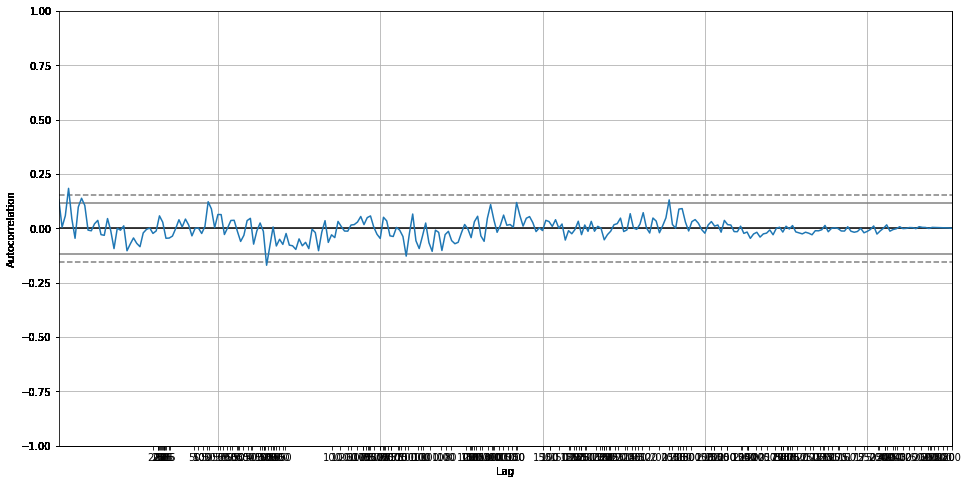

In [79]:
PatientSubset = NbrPatients[NbrPatients > 200]
PatientSubsetList = PatientSubset.index.tolist()

PatientSubsetList.sort()
print(PatientSubsetList)

figure = plt.figure(1, figsize = (16, 8))

# autocorrelation_plot(PatientDataSeriesBase)

for patient in PatientSubsetList:
    OnePatient = df[df.PatientId == patient][['ObservationDate', 'EWS_Total']].set_index('ObservationDate')
    autocorrelation_plot(OnePatient)
    
plt.show()

[362, 523, 630, 1068, 1092, 1199, 1257, 1261, 1278, 1285, 1474, 1664, 1743, 1753, 1835, 1841, 2193, 2602, 3080, 3174, 3433, 3540, 3553, 4614, 4672, 4764, 5447, 5678, 5797, 6755, 6764, 6995, 7777]


/usr/lib64/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:411: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))
/usr/lib64/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:411: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))
/usr/lib64/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:411: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))
/usr/lib64/python3.6/site-packages/pandas/plotting/_matplotlib/misc.py:411: UserWarning: Requested projection is different from current axis projection, creating new axis with requested projection.
  ax = plt.gca(xlim=(1, n), ylim=(-1.0, 1.0))
/usr/lib64/python3.6/sit

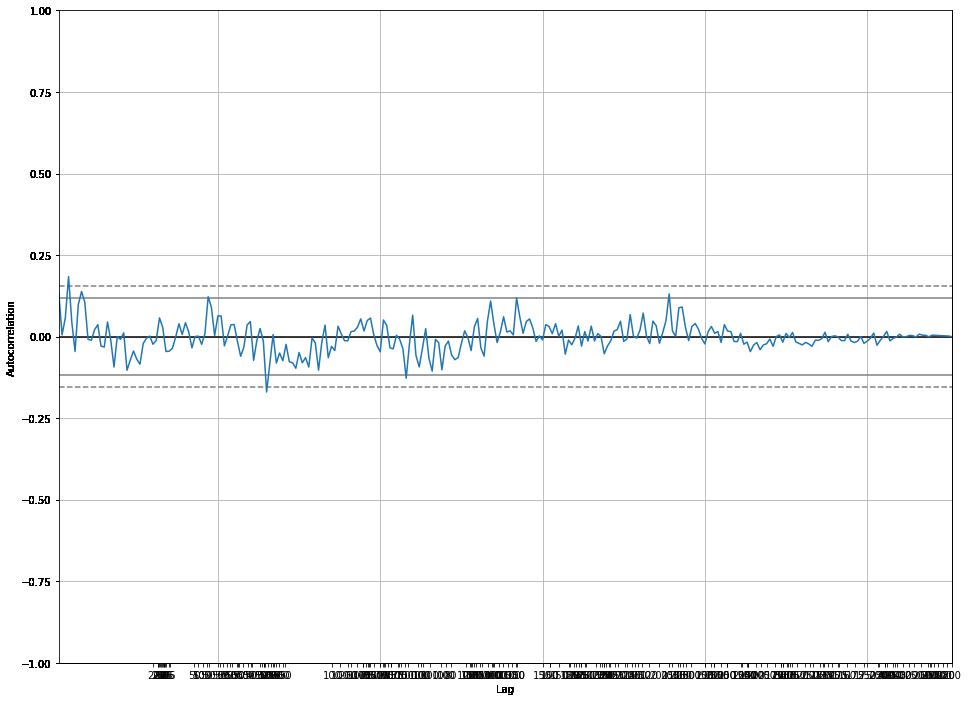

In [80]:
from pandas.plotting import autocorrelation_plot

PatientSubset = NbrPatients[NbrPatients > 200]
PatientSubsetList = PatientSubset.index.tolist()

PatientSubsetList.sort()
print(PatientSubsetList)

figure = plt.figure(1, figsize = (16, 12))

# autocorrelation_plot(PatientDataSeriesBase)

for patient in PatientSubsetList:
    OnePatient = df[df.PatientId == patient]
    #display(OnePatient)
    OnePatient = OnePatient[['ObservationDate', 'EWS_Total']]
    #display(OnePatient)
    OnePatient = OnePatient.set_index('ObservationDate')
    autocorrelation_plot(OnePatient)
    